# READ AND SUMMARIZE DATA

In [1]:
''' Import libraries '''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
### Apply the default default seaborn theme, scaling, and color palette
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
''' Set Pandas display options ("None" parameter shows all) '''

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
''' Display all numerical outputs to 5 decimal places '''

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
''' Read data into Pandas data frame master_df '''

master_df = pd.read_csv(r"C:\\Users\\mohrj\\Documents\\MSPA\\MSDS 498 Capstone\\Boston\\Cluster\\Condensed2022.csv")

In [5]:
master_df.shape

(20108, 157)

In [6]:
master_df.head()

,Unnamed: 0,PID,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIPCODE,LU_DESC,BLDG_TYPE,OWN_OCC,OWNER,MAIL_ADDRESSEE,MAIL_ADDRESS,MAIL_CITY,MAIL_STATE,MAIL_ZIPCODE,RES_FLOOR,LAND_SF,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,YR_BUILT,YR_REMODEL,STRUCTURE_CLASS,ROOF_STRUCTURE,INT_WALL,EXT_FINISHED,INT_COND,EXT_COND,OVERALL_COND,BED_RMS,FULL_BTH,HLF_BTH,KITCHEN,TT_RMS,BTHRM_STYLE1,BTHRM_STYLE2,BTHRM_STYLE3,KITCHEN_STYLE1,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,AC_TYPE,FIRE_PLACE,bi_pid_long,bi_st_name,bi_num_bldgs,bi_flood,bi_stormwater,bi_census_tract_number,inc_Census Tract,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_lt_10000,inc_pct_fam_married_couple_inc_10000_14999,inc_pct_fam_married_couple_inc_15000_24999,inc_pct_fam_married_couple_inc_25000_34999,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,inc_pct_fam_married_couple_inc_100000_149999,inc_pct_fam_married_couple_inc_150000_199999,inc_pct_fam_married_couple_inc_gt_200000,inc_othr_fam_married_couple_inc_median,inc_cnt_hh_non_fam_total,inc_pct_hh_non_fam_inc_lt_10000,inc_pct_hh_non_fam_inc_10000_14999,inc_pct_hh_non_fam_inc_15000_24999,inc_pct_hh_non_fam_inc_25000_34999,inc_pct_hh_non_fam_inc_35000_49999,inc_pct_hh_non_fam_inc_50000_74999,inc_pct_hh_non_fam_inc_75000_99999,inc_pct_hh_non_fam_inc_100000_149999,inc_pct_hh_non_fam_inc_150000_199999,inc_pct_hh_non_fam_inc_gt_200000,inc_othr_hh_non_fam_inc_median,as_Census Tract,as_Cnt_Total_Population,as_Othr_Median_age_(years),as_Ratio_Sex_ratio_(males_per_100_females),as_Ratio_Age_dependency_ratio,as_Ratio_Old-age_dependency_ratio,as_Ratio_Child_dependency_ratio,as_Pct_Age_Under_5_years,as_Pct_Age_5_to_9_years,as_Pct_Age_10_to_14_years,as_Pct_Age_15_to_19_years,as_Pct_Age_20_to_24_years,as_Pct_Age_25_to_29_years,as_Pct_Age_30_to_34_years,as_Pct_Age_35_to_39_years,as_Pct_Age_40_to_44_years,as_Pct_Age_45_to_49_years,as_Pct_Age_50_to_54_years,as_Pct_Age_55_to_59_years,as_Pct_Age_60_to_64_years,as_Pct_Age_65_to_69_years,as_Pct_Age_70_to_74_years,as_Pct_Age_75_to_79_years,as_Pct_Age_80_to_84_years,as_Pct_Age_85_years_and_over,as_Pct_Age_5_to_14_years,as_Pct_Age_15_to_17_years,as_Pct_Age_Under_18_years,as_Pct_Age_18_to_24_years,as_Pct_Age_15_to_44_years,as_Pct_Age_16_years_and_over,as_Pct_Age_18_years_and_over,as_Pct_Age_21_years_and_over,as_Pct_Age_60_years_and_over,as_Pct_Age_62_years_and_over,as_Pct_Age_65_years_and_over,as_Pct_Age_75_years_and_over,as_Cnt_Male_Total_Population,as_Othr_Male_Age_Median_age_(years),as_Cnt_Female_Total_Population,as_Othr_Female_Age_Median_age_(years),as_Pct_Female_Age_21_years_and_over,edu_Census Tract,edu_Pct_Age_18to24_lt_high_school,edu_Pct_Age_18to24_high_school,edu_Pct_Age_18to24_some_college,edu_Pct_Age_18to24_bachelors,edu_Pct_Age_25_plus_lt_9th,edu_Pct_Age_25_plus_some_high_school,edu_Pct_Age_25_plus_high_school,edu_Pct_Age_25_plus_some_college,edu_Pct_Age_25_plus_associates,edu_Pct_Age_25_plus_bachelors,edu_Pct_Age_25_plus_grad_professional,edu_Pct_Age_25_plus_high_school_plus,edu_Pct_Age_25_plus_bachelors_plus,edu_Pct_Age_25to34_high_school_plus,edu_Pct_Age_25to34_bachelors_plus,edu_Pct_Age_35to44_high_school_plus,edu_Pct_Age_35to44_bachelors_plus,edu_Pct_Age_45to64_high_school_plus,edu_Pct_Age_45to64_bachelors_plus,edu_Pct_Age_65_plus_high_school_plus,edu_Pct_Age_65_plus_bachelors_plus,MAP_PAR_ID,LOC_ID,Shape_STAr,Shape_STLe,Shape_ST_1,Shape_ST_2,Shape__Area,Shape__Length,loc_id,owner1,own_addr,own_city,own_zip,sale_date,sale_price
0,0,1000019000,1000019000,3,WORTHINGTON ST,NaN,ROXBURY CROSSIN,2120,SINGLE FAM DWELLING,RM - Row Middle,Y,OBRIEN MARY V,NaN,3 WORTHINGTON ST,ROXBURY,MA,2120,3.000,1440.000,2688.000,2016.000,380500,533700,914200,1900.000,NaN,R -,M - Mansard,N - Normal,B - Brick/Stone,A - Average,A - Average,A - Average,5,1,0,1,8,M - Modern,NaN,NaN,S - Semi-Modern,NaN,NaN,W - Ht Water/Steam,N - None,0,1000019000,WORTHINGTON,1,f,f,25025080900,25025080900,91,0.000,0.000,9.900

In [7]:
''' Read data into Pandas data frame ts_df (Target_Spend) '''

ts_df = pd.read_csv(r"C:\\Users\\mohrj\\Documents\\MSPA\\MSDS 498 Capstone\\Boston\\Cluster\\Target_Spend.csv")

In [8]:
master_df = pd.merge(master_df, ts_df, how='inner', on = 'PID')

In [9]:
master_df["TARGET_SPEND"].unique()

array(['None', 'Low', 'Medium', 'High'], dtype=object)

In [10]:
master_df.shape

(20108, 158)

In [11]:
master_df.head()

,Unnamed: 0,PID,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIPCODE,LU_DESC,BLDG_TYPE,OWN_OCC,OWNER,MAIL_ADDRESSEE,MAIL_ADDRESS,MAIL_CITY,MAIL_STATE,MAIL_ZIPCODE,RES_FLOOR,LAND_SF,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,YR_BUILT,YR_REMODEL,STRUCTURE_CLASS,ROOF_STRUCTURE,INT_WALL,EXT_FINISHED,INT_COND,EXT_COND,OVERALL_COND,BED_RMS,FULL_BTH,HLF_BTH,KITCHEN,TT_RMS,BTHRM_STYLE1,BTHRM_STYLE2,BTHRM_STYLE3,KITCHEN_STYLE1,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,AC_TYPE,FIRE_PLACE,bi_pid_long,bi_st_name,bi_num_bldgs,bi_flood,bi_stormwater,bi_census_tract_number,inc_Census Tract,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_lt_10000,inc_pct_fam_married_couple_inc_10000_14999,inc_pct_fam_married_couple_inc_15000_24999,inc_pct_fam_married_couple_inc_25000_34999,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,inc_pct_fam_married_couple_inc_100000_149999,inc_pct_fam_married_couple_inc_150000_199999,inc_pct_fam_married_couple_inc_gt_200000,inc_othr_fam_married_couple_inc_median,inc_cnt_hh_non_fam_total,inc_pct_hh_non_fam_inc_lt_10000,inc_pct_hh_non_fam_inc_10000_14999,inc_pct_hh_non_fam_inc_15000_24999,inc_pct_hh_non_fam_inc_25000_34999,inc_pct_hh_non_fam_inc_35000_49999,inc_pct_hh_non_fam_inc_50000_74999,inc_pct_hh_non_fam_inc_75000_99999,inc_pct_hh_non_fam_inc_100000_149999,inc_pct_hh_non_fam_inc_150000_199999,inc_pct_hh_non_fam_inc_gt_200000,inc_othr_hh_non_fam_inc_median,as_Census Tract,as_Cnt_Total_Population,as_Othr_Median_age_(years),as_Ratio_Sex_ratio_(males_per_100_females),as_Ratio_Age_dependency_ratio,as_Ratio_Old-age_dependency_ratio,as_Ratio_Child_dependency_ratio,as_Pct_Age_Under_5_years,as_Pct_Age_5_to_9_years,as_Pct_Age_10_to_14_years,as_Pct_Age_15_to_19_years,as_Pct_Age_20_to_24_years,as_Pct_Age_25_to_29_years,as_Pct_Age_30_to_34_years,as_Pct_Age_35_to_39_years,as_Pct_Age_40_to_44_years,as_Pct_Age_45_to_49_years,as_Pct_Age_50_to_54_years,as_Pct_Age_55_to_59_years,as_Pct_Age_60_to_64_years,as_Pct_Age_65_to_69_years,as_Pct_Age_70_to_74_years,as_Pct_Age_75_to_79_years,as_Pct_Age_80_to_84_years,as_Pct_Age_85_years_and_over,as_Pct_Age_5_to_14_years,as_Pct_Age_15_to_17_years,as_Pct_Age_Under_18_years,as_Pct_Age_18_to_24_years,as_Pct_Age_15_to_44_years,as_Pct_Age_16_years_and_over,as_Pct_Age_18_years_and_over,as_Pct_Age_21_years_and_over,as_Pct_Age_60_years_and_over,as_Pct_Age_62_years_and_over,as_Pct_Age_65_years_and_over,as_Pct_Age_75_years_and_over,as_Cnt_Male_Total_Population,as_Othr_Male_Age_Median_age_(years),as_Cnt_Female_Total_Population,as_Othr_Female_Age_Median_age_(years),as_Pct_Female_Age_21_years_and_over,edu_Census Tract,edu_Pct_Age_18to24_lt_high_school,edu_Pct_Age_18to24_high_school,edu_Pct_Age_18to24_some_college,edu_Pct_Age_18to24_bachelors,edu_Pct_Age_25_plus_lt_9th,edu_Pct_Age_25_plus_some_high_school,edu_Pct_Age_25_plus_high_school,edu_Pct_Age_25_plus_some_college,edu_Pct_Age_25_plus_associates,edu_Pct_Age_25_plus_bachelors,edu_Pct_Age_25_plus_grad_professional,edu_Pct_Age_25_plus_high_school_plus,edu_Pct_Age_25_plus_bachelors_plus,edu_Pct_Age_25to34_high_school_plus,edu_Pct_Age_25to34_bachelors_plus,edu_Pct_Age_35to44_high_school_plus,edu_Pct_Age_35to44_bachelors_plus,edu_Pct_Age_45to64_high_school_plus,edu_Pct_Age_45to64_bachelors_plus,edu_Pct_Age_65_plus_high_school_plus,edu_Pct_Age_65_plus_bachelors_plus,MAP_PAR_ID,LOC_ID,Shape_STAr,Shape_STLe,Shape_ST_1,Shape_ST_2,Shape__Area,Shape__Length,loc_id,owner1,own_addr,own_city,own_zip,sale_date,sale_price,TARGET_SPEND
0,0,1000019000,1000019000,3,WORTHINGTON ST,NaN,ROXBURY CROSSIN,2120,SINGLE FAM DWELLING,RM - Row Middle,Y,OBRIEN MARY V,NaN,3 WORTHINGTON ST,ROXBURY,MA,2120,3.000,1440.000,2688.000,2016.000,380500,533700,914200,1900.000,NaN,R -,M - Mansard,N - Normal,B - Brick/Stone,A - Average,A - Average,A - Average,5,1,0,1,8,M - Modern,NaN,NaN,S - Semi-Modern,NaN,NaN,W - Ht Water/Steam,N - None,0,1000019000,WORTHINGTON,1,f,f,25025080900,25025080900,91,0.00

In [12]:
''' Display all column names for df '''

master_df.columns.tolist()

['Unnamed: 0',
 'PID',
 'GIS_ID',
 'ST_NUM',
 'ST_NAME',
 'UNIT_NUM',
 'CITY',
 'ZIPCODE',
 'LU_DESC',
 'BLDG_TYPE',
 'OWN_OCC',
 'OWNER',
 'MAIL_ADDRESSEE',
 'MAIL_ADDRESS',
 'MAIL_CITY',
 'MAIL_STATE',
 'MAIL_ZIPCODE',
 'RES_FLOOR',
 'LAND_SF',
 'GROSS_AREA',
 'LIVING_AREA',
 'LAND_VALUE',
 'BLDG_VALUE',
 'TOTAL_VALUE',
 'YR_BUILT',
 'YR_REMODEL',
 'STRUCTURE_CLASS',
 'ROOF_STRUCTURE',
 'INT_WALL',
 'EXT_FINISHED',
 'INT_COND',
 'EXT_COND',
 'OVERALL_COND',
 'BED_RMS',
 'FULL_BTH',
 'HLF_BTH',
 'KITCHEN',
 'TT_RMS',
 'BTHRM_STYLE1',
 'BTHRM_STYLE2',
 'BTHRM_STYLE3',
 'KITCHEN_STYLE1',
 'KITCHEN_STYLE2',
 'KITCHEN_STYLE3',
 'HEAT_TYPE',
 'AC_TYPE',
 'FIRE_PLACE',
 'bi_pid_long',
 'bi_st_name',
 'bi_num_bldgs',
 'bi_flood',
 'bi_stormwater',
 'bi_census_tract_number',
 'inc_Census Tract',
 'inc_cnt_fam_married_couple_total',
 'inc_pct_fam_married_couple_inc_lt_10000',
 'inc_pct_fam_married_couple_inc_10000_14999',
 'inc_pct_fam_married_couple_inc_15000_24999',
 'inc_pct_fam_married_cou

In [13]:
''' Rename Unnamed column '''

master_df.rename(columns={'Unnamed: 0':'Variable Index'}, inplace=True)

In [14]:
''' Display all column names for df '''

master_df.columns.tolist()

['Variable Index',
 'PID',
 'GIS_ID',
 'ST_NUM',
 'ST_NAME',
 'UNIT_NUM',
 'CITY',
 'ZIPCODE',
 'LU_DESC',
 'BLDG_TYPE',
 'OWN_OCC',
 'OWNER',
 'MAIL_ADDRESSEE',
 'MAIL_ADDRESS',
 'MAIL_CITY',
 'MAIL_STATE',
 'MAIL_ZIPCODE',
 'RES_FLOOR',
 'LAND_SF',
 'GROSS_AREA',
 'LIVING_AREA',
 'LAND_VALUE',
 'BLDG_VALUE',
 'TOTAL_VALUE',
 'YR_BUILT',
 'YR_REMODEL',
 'STRUCTURE_CLASS',
 'ROOF_STRUCTURE',
 'INT_WALL',
 'EXT_FINISHED',
 'INT_COND',
 'EXT_COND',
 'OVERALL_COND',
 'BED_RMS',
 'FULL_BTH',
 'HLF_BTH',
 'KITCHEN',
 'TT_RMS',
 'BTHRM_STYLE1',
 'BTHRM_STYLE2',
 'BTHRM_STYLE3',
 'KITCHEN_STYLE1',
 'KITCHEN_STYLE2',
 'KITCHEN_STYLE3',
 'HEAT_TYPE',
 'AC_TYPE',
 'FIRE_PLACE',
 'bi_pid_long',
 'bi_st_name',
 'bi_num_bldgs',
 'bi_flood',
 'bi_stormwater',
 'bi_census_tract_number',
 'inc_Census Tract',
 'inc_cnt_fam_married_couple_total',
 'inc_pct_fam_married_couple_inc_lt_10000',
 'inc_pct_fam_married_couple_inc_10000_14999',
 'inc_pct_fam_married_couple_inc_15000_24999',
 'inc_pct_fam_married

In [15]:
''' Display first 5 observations '''

master_df.head()

,Variable Index,PID,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIPCODE,LU_DESC,BLDG_TYPE,OWN_OCC,OWNER,MAIL_ADDRESSEE,MAIL_ADDRESS,MAIL_CITY,MAIL_STATE,MAIL_ZIPCODE,RES_FLOOR,LAND_SF,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,YR_BUILT,YR_REMODEL,STRUCTURE_CLASS,ROOF_STRUCTURE,INT_WALL,EXT_FINISHED,INT_COND,EXT_COND,OVERALL_COND,BED_RMS,FULL_BTH,HLF_BTH,KITCHEN,TT_RMS,BTHRM_STYLE1,BTHRM_STYLE2,BTHRM_STYLE3,KITCHEN_STYLE1,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,AC_TYPE,FIRE_PLACE,bi_pid_long,bi_st_name,bi_num_bldgs,bi_flood,bi_stormwater,bi_census_tract_number,inc_Census Tract,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_lt_10000,inc_pct_fam_married_couple_inc_10000_14999,inc_pct_fam_married_couple_inc_15000_24999,inc_pct_fam_married_couple_inc_25000_34999,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,inc_pct_fam_married_couple_inc_100000_149999,inc_pct_fam_married_couple_inc_150000_199999,inc_pct_fam_married_couple_inc_gt_200000,inc_othr_fam_married_couple_inc_median,inc_cnt_hh_non_fam_total,inc_pct_hh_non_fam_inc_lt_10000,inc_pct_hh_non_fam_inc_10000_14999,inc_pct_hh_non_fam_inc_15000_24999,inc_pct_hh_non_fam_inc_25000_34999,inc_pct_hh_non_fam_inc_35000_49999,inc_pct_hh_non_fam_inc_50000_74999,inc_pct_hh_non_fam_inc_75000_99999,inc_pct_hh_non_fam_inc_100000_149999,inc_pct_hh_non_fam_inc_150000_199999,inc_pct_hh_non_fam_inc_gt_200000,inc_othr_hh_non_fam_inc_median,as_Census Tract,as_Cnt_Total_Population,as_Othr_Median_age_(years),as_Ratio_Sex_ratio_(males_per_100_females),as_Ratio_Age_dependency_ratio,as_Ratio_Old-age_dependency_ratio,as_Ratio_Child_dependency_ratio,as_Pct_Age_Under_5_years,as_Pct_Age_5_to_9_years,as_Pct_Age_10_to_14_years,as_Pct_Age_15_to_19_years,as_Pct_Age_20_to_24_years,as_Pct_Age_25_to_29_years,as_Pct_Age_30_to_34_years,as_Pct_Age_35_to_39_years,as_Pct_Age_40_to_44_years,as_Pct_Age_45_to_49_years,as_Pct_Age_50_to_54_years,as_Pct_Age_55_to_59_years,as_Pct_Age_60_to_64_years,as_Pct_Age_65_to_69_years,as_Pct_Age_70_to_74_years,as_Pct_Age_75_to_79_years,as_Pct_Age_80_to_84_years,as_Pct_Age_85_years_and_over,as_Pct_Age_5_to_14_years,as_Pct_Age_15_to_17_years,as_Pct_Age_Under_18_years,as_Pct_Age_18_to_24_years,as_Pct_Age_15_to_44_years,as_Pct_Age_16_years_and_over,as_Pct_Age_18_years_and_over,as_Pct_Age_21_years_and_over,as_Pct_Age_60_years_and_over,as_Pct_Age_62_years_and_over,as_Pct_Age_65_years_and_over,as_Pct_Age_75_years_and_over,as_Cnt_Male_Total_Population,as_Othr_Male_Age_Median_age_(years),as_Cnt_Female_Total_Population,as_Othr_Female_Age_Median_age_(years),as_Pct_Female_Age_21_years_and_over,edu_Census Tract,edu_Pct_Age_18to24_lt_high_school,edu_Pct_Age_18to24_high_school,edu_Pct_Age_18to24_some_college,edu_Pct_Age_18to24_bachelors,edu_Pct_Age_25_plus_lt_9th,edu_Pct_Age_25_plus_some_high_school,edu_Pct_Age_25_plus_high_school,edu_Pct_Age_25_plus_some_college,edu_Pct_Age_25_plus_associates,edu_Pct_Age_25_plus_bachelors,edu_Pct_Age_25_plus_grad_professional,edu_Pct_Age_25_plus_high_school_plus,edu_Pct_Age_25_plus_bachelors_plus,edu_Pct_Age_25to34_high_school_plus,edu_Pct_Age_25to34_bachelors_plus,edu_Pct_Age_35to44_high_school_plus,edu_Pct_Age_35to44_bachelors_plus,edu_Pct_Age_45to64_high_school_plus,edu_Pct_Age_45to64_bachelors_plus,edu_Pct_Age_65_plus_high_school_plus,edu_Pct_Age_65_plus_bachelors_plus,MAP_PAR_ID,LOC_ID,Shape_STAr,Shape_STLe,Shape_ST_1,Shape_ST_2,Shape__Area,Shape__Length,loc_id,owner1,own_addr,own_city,own_zip,sale_date,sale_price,TARGET_SPEND
0,0,1000019000,1000019000,3,WORTHINGTON ST,NaN,ROXBURY CROSSIN,2120,SINGLE FAM DWELLING,RM - Row Middle,Y,OBRIEN MARY V,NaN,3 WORTHINGTON ST,ROXBURY,MA,2120,3.000,1440.000,2688.000,2016.000,380500,533700,914200,1900.000,NaN,R -,M - Mansard,N - Normal,B - Brick/Stone,A - Average,A - Average,A - Average,5,1,0,1,8,M - Modern,NaN,NaN,S - Semi-Modern,NaN,NaN,W - Ht Water/Steam,N - None,0,1000019000,WORTHINGTON,1,f,f,25025080900,25025080900,91,

In [16]:
''' Display the dimensions of the data frame '''

master_df.shape

(20108, 158)

# PREPARE DATA

In [17]:
''' Identify data type index names '''

dt = master_df.dtypes
dt

Variable Index                                    int64
PID                                               int64
GIS_ID                                            int64
ST_NUM                                           object
ST_NAME                                          object
UNIT_NUM                                         object
CITY                                             object
ZIPCODE                                           int64
LU_DESC                                          object
BLDG_TYPE                                        object
OWN_OCC                                          object
OWNER                                            object
MAIL_ADDRESSEE                                   object
MAIL_ADDRESS                                     object
MAIL_CITY                                        object
MAIL_STATE                                       object
MAIL_ZIPCODE                                     object
RES_FLOOR                                       

In [18]:
''' Create 2 lists to separate variables into strings (objects) and numbers (integers and floats) '''

strList = []
numList = []
for i in dt.index:
    print(i, ":", dt[i])
    if dt[i] in (["object"]) : strList.append(i)
    if dt[i] in (["int64","float64"]): numList.append(i)

Variable Index : int64
PID : int64
GIS_ID : int64
ST_NUM : object
ST_NAME : object
UNIT_NUM : object
CITY : object
ZIPCODE : int64
LU_DESC : object
BLDG_TYPE : object
OWN_OCC : object
OWNER : object
MAIL_ADDRESSEE : object
MAIL_ADDRESS : object
MAIL_CITY : object
MAIL_STATE : object
MAIL_ZIPCODE : object
RES_FLOOR : float64
LAND_SF : float64
GROSS_AREA : float64
LIVING_AREA : float64
LAND_VALUE : int64
BLDG_VALUE : int64
TOTAL_VALUE : int64
YR_BUILT : float64
YR_REMODEL : float64
STRUCTURE_CLASS : object
ROOF_STRUCTURE : object
INT_WALL : object
EXT_FINISHED : object
INT_COND : object
EXT_COND : object
OVERALL_COND : object
BED_RMS : int64
FULL_BTH : int64
HLF_BTH : int64
KITCHEN : int64
TT_RMS : int64
BTHRM_STYLE1 : object
BTHRM_STYLE2 : object
BTHRM_STYLE3 : object
KITCHEN_STYLE1 : object
KITCHEN_STYLE2 : object
KITCHEN_STYLE3 : object
HEAT_TYPE : object
AC_TYPE : object
FIRE_PLACE : int64
bi_pid_long : int64
bi_st_name : object
bi_num_bldgs : int64
bi_flood : object
bi_stormwater : 

In [19]:
''' Display 2 new lists '''

print("Strings:\n--------")
for i in strList:
    print(i)
print("\nNumbers:\n--------")
for i in numList:
   print(i)

Strings:
--------
ST_NUM
ST_NAME
UNIT_NUM
CITY
LU_DESC
BLDG_TYPE
OWN_OCC
OWNER
MAIL_ADDRESSEE
MAIL_ADDRESS
MAIL_CITY
MAIL_STATE
MAIL_ZIPCODE
STRUCTURE_CLASS
ROOF_STRUCTURE
INT_WALL
EXT_FINISHED
INT_COND
EXT_COND
OVERALL_COND
BTHRM_STYLE1
BTHRM_STYLE2
BTHRM_STYLE3
KITCHEN_STYLE1
KITCHEN_STYLE2
KITCHEN_STYLE3
HEAT_TYPE
AC_TYPE
bi_st_name
bi_flood
bi_stormwater
LOC_ID
loc_id
owner1
own_addr
own_city
TARGET_SPEND

Numbers:
--------
Variable Index
PID
GIS_ID
ZIPCODE
RES_FLOOR
LAND_SF
GROSS_AREA
LIVING_AREA
LAND_VALUE
BLDG_VALUE
TOTAL_VALUE
YR_BUILT
YR_REMODEL
BED_RMS
FULL_BTH
HLF_BTH
KITCHEN
TT_RMS
FIRE_PLACE
bi_pid_long
bi_num_bldgs
bi_census_tract_number
inc_Census Tract
inc_cnt_fam_married_couple_total
inc_pct_fam_married_couple_inc_lt_10000
inc_pct_fam_married_couple_inc_10000_14999
inc_pct_fam_married_couple_inc_15000_24999
inc_pct_fam_married_couple_inc_25000_34999
inc_pct_fam_married_couple_inc_35000_49999
inc_pct_fam_married_couple_inc_50000_74999
inc_pct_fam_married_couple_inc_7500

In [20]:
len(strList)

37

In [21]:
''' Drop strList columns '''

master_df = master_df.drop(strList, axis=1)

In [22]:
master_df.shape

(20108, 121)

In [23]:
''' Drop 21 irrelevant (to clustering) columns '''

master_df = master_df.drop(["Variable Index", "GIS_ID", "ZIPCODE", "bi_pid_long", "bi_num_bldgs", \
              "bi_census_tract_number", "inc_Census Tract", "as_Census Tract", "edu_Census Tract", "MAP_PAR_ID", \
              "Shape_STAr", "Shape_STLe", "Shape_ST_1", "Shape_ST_2", "Shape__Area" , "Shape__Length", \
              "own_zip", "sale_date", "inc_othr_fam_married_couple_inc_median","inc_othr_hh_non_fam_inc_median", \
              "YR_REMODEL"], axis=1)

In [24]:
master_df.shape

(20108, 100)

In [25]:
''' Display first 5 observations '''

master_df.head()

,PID,RES_FLOOR,LAND_SF,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,YR_BUILT,BED_RMS,FULL_BTH,HLF_BTH,KITCHEN,TT_RMS,FIRE_PLACE,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_lt_10000,inc_pct_fam_married_couple_inc_10000_14999,inc_pct_fam_married_couple_inc_15000_24999,inc_pct_fam_married_couple_inc_25000_34999,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,inc_pct_fam_married_couple_inc_100000_149999,inc_pct_fam_married_couple_inc_150000_199999,inc_pct_fam_married_couple_inc_gt_200000,inc_cnt_hh_non_fam_total,inc_pct_hh_non_fam_inc_lt_10000,inc_pct_hh_non_fam_inc_10000_14999,inc_pct_hh_non_fam_inc_15000_24999,inc_pct_hh_non_fam_inc_25000_34999,inc_pct_hh_non_fam_inc_35000_49999,inc_pct_hh_non_fam_inc_50000_74999,inc_pct_hh_non_fam_inc_75000_99999,inc_pct_hh_non_fam_inc_100000_149999,inc_pct_hh_non_fam_inc_150000_199999,inc_pct_hh_non_fam_inc_gt_200000,as_Cnt_Total_Population,as_Othr_Median_age_(years),as_Ratio_Sex_ratio_(males_per_100_females),as_Ratio_Age_dependency_ratio,as_Ratio_Old-age_dependency_ratio,as_Ratio_Child_dependency_ratio,as_Pct_Age_Under_5_years,as_Pct_Age_5_to_9_years,as_Pct_Age_10_to_14_years,as_Pct_Age_15_to_19_years,as_Pct_Age_20_to_24_years,as_Pct_Age_25_to_29_years,as_Pct_Age_30_to_34_years,as_Pct_Age_35_to_39_years,as_Pct_Age_40_to_44_years,as_Pct_Age_45_to_49_years,as_Pct_Age_50_to_54_years,as_Pct_Age_55_to_59_years,as_Pct_Age_60_to_64_years,as_Pct_Age_65_to_69_years,as_Pct_Age_70_to_74_years,as_Pct_Age_75_to_79_years,as_Pct_Age_80_to_84_years,as_Pct_Age_85_years_and_over,as_Pct_Age_5_to_14_years,as_Pct_Age_15_to_17_years,as_Pct_Age_Under_18_years,as_Pct_Age_18_to_24_years,as_Pct_Age_15_to_44_years,as_Pct_Age_16_years_and_over,as_Pct_Age_18_years_and_over,as_Pct_Age_21_years_and_over,as_Pct_Age_60_years_and_over,as_Pct_Age_62_years_and_over,as_Pct_Age_65_years_and_over,as_Pct_Age_75_years_and_over,as_Cnt_Male_Total_Population,as_Othr_Male_Age_Median_age_(years),as_Cnt_Female_Total_Population,as_Othr_Female_Age_Median_age_(years),as_Pct_Female_Age_21_years_and_over,edu_Pct_Age_18to24_lt_high_school,edu_Pct_Age_18to24_high_school,edu_Pct_Age_18to24_some_college,edu_Pct_Age_18to24_bachelors,edu_Pct_Age_25_plus_lt_9th,edu_Pct_Age_25_plus_some_high_school,edu_Pct_Age_25_plus_high_school,edu_Pct_Age_25_plus_some_college,edu_Pct_Age_25_plus_associates,edu_Pct_Age_25_plus_bachelors,edu_Pct_Age_25_plus_grad_professional,edu_Pct_Age_25_plus_high_school_plus,edu_Pct_Age_25_plus_bachelors_plus,edu_Pct_Age_25to34_high_school_plus,edu_Pct_Age_25to34_bachelors_plus,edu_Pct_Age_35to44_high_school_plus,edu_Pct_Age_35to44_bachelors_plus,edu_Pct_Age_45to64_high_school_plus,edu_Pct_Age_45to64_bachelors_plus,edu_Pct_Age_65_plus_high_school_plus,edu_Pct_Age_65_plus_bachelors_plus,sale_price
0,1000019000,3.000,1440.000,2688.000,2016.000,380500,533700,914200,1900.000,5,1,0,1,8,0,91,0.000,0.000,9.900,0.000,15.400,0.000,23.100,7.700,35.200,8.800,1336,8.200,4.900,5.200,4.900,15.600,17.100,13.500,16.400,11.200,3.100,3432,26.200,128.200,14.300,12.300,2.100,0.500,0.400,0.000,0.900,40.900,24.400,7.300,3.800,2.600,1.200,5.000,1.500,0.800,2.900,1.800,1.500,2.600,2.000,0.400,0.900,1.800,40.900,79.900,99.100,98.200,91.100,11.500,11.500,10.700,6.100,1928,24.000,1504,28.100,90.200,0.000,10.800,59.900,29.200,3.400,0.000,5.400,8.400,8.200,39.700,35.000,96.600,74.600,100.000,93.300,100.000,21.400,88.000,56.400,91.600,65.800,9
1,1000024000,3.000,1440.000,2712.000,2026.000,363400,656500,1019900,1900.000,4,2,1,1,6,1,91,0.000,0.000,9.900,0.000,15.400,0.000,23.100,7.700,35.200,8.800,1336,8.200,4.900,5.200,4.900,15.600,17.100,13.500,16.400,11.200,3.100,3432,26.200,128.200,14.300,12.300,2.100,0.500,0.400,0.000,0.900,40.900,24.400,7.300,3.800,2.600,1.200,5.000,1.500,0.800,2.900,1.800,1.500,2.600,2.000,0.400,0.900,1.800,40.900,79.900,99.100,98.200,91.100,11.500,11.500,10.700,6.100,1928,24.000,1504,28.100,90.200,0.000,10.800,59.900,29.200,3.

In [26]:
''' Display the dimensions of the data frame '''

master_df.shape

(20108, 100)

In [27]:
''' Statistically describe data - displays data for numeric variables only'''

master_df.describe()

,PID,RES_FLOOR,LAND_SF,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,YR_BUILT,BED_RMS,FULL_BTH,HLF_BTH,KITCHEN,TT_RMS,FIRE_PLACE,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_lt_10000,inc_pct_fam_married_couple_inc_10000_14999,inc_pct_fam_married_couple_inc_15000_24999,inc_pct_fam_married_couple_inc_25000_34999,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,inc_pct_fam_married_couple_inc_100000_149999,inc_pct_fam_married_couple_inc_150000_199999,inc_pct_fam_married_couple_inc_gt_200000,inc_cnt_hh_non_fam_total,inc_pct_hh_non_fam_inc_lt_10000,inc_pct_hh_non_fam_inc_10000_14999,inc_pct_hh_non_fam_inc_15000_24999,inc_pct_hh_non_fam_inc_25000_34999,inc_pct_hh_non_fam_inc_35000_49999,inc_pct_hh_non_fam_inc_50000_74999,inc_pct_hh_non_fam_inc_75000_99999,inc_pct_hh_non_fam_inc_100000_149999,inc_pct_hh_non_fam_inc_150000_199999,inc_pct_hh_non_fam_inc_gt_200000,as_Cnt_Total_Population,as_Othr_Median_age_(years),as_Ratio_Sex_ratio_(males_per_100_females),as_Ratio_Age_dependency_ratio,as_Ratio_Old-age_dependency_ratio,as_Ratio_Child_dependency_ratio,as_Pct_Age_Under_5_years,as_Pct_Age_5_to_9_years,as_Pct_Age_10_to_14_years,as_Pct_Age_15_to_19_years,as_Pct_Age_20_to_24_years,as_Pct_Age_25_to_29_years,as_Pct_Age_30_to_34_years,as_Pct_Age_35_to_39_years,as_Pct_Age_40_to_44_years,as_Pct_Age_45_to_49_years,as_Pct_Age_50_to_54_years,as_Pct_Age_55_to_59_years,as_Pct_Age_60_to_64_years,as_Pct_Age_65_to_69_years,as_Pct_Age_70_to_74_years,as_Pct_Age_75_to_79_years,as_Pct_Age_80_to_84_years,as_Pct_Age_85_years_and_over,as_Pct_Age_5_to_14_years,as_Pct_Age_15_to_17_years,as_Pct_Age_Under_18_years,as_Pct_Age_18_to_24_years,as_Pct_Age_15_to_44_years,as_Pct_Age_16_years_and_over,as_Pct_Age_18_years_and_over,as_Pct_Age_21_years_and_over,as_Pct_Age_60_years_and_over,as_Pct_Age_62_years_and_over,as_Pct_Age_65_years_and_over,as_Pct_Age_75_years_and_over,as_Cnt_Male_Total_Population,as_Othr_Male_Age_Median_age_(years),as_Cnt_Female_Total_Population,as_Othr_Female_Age_Median_age_(years),as_Pct_Female_Age_21_years_and_over,edu_Pct_Age_18to24_lt_high_school,edu_Pct_Age_18to24_high_school,edu_Pct_Age_18to24_some_college,edu_Pct_Age_18to24_bachelors,edu_Pct_Age_25_plus_lt_9th,edu_Pct_Age_25_plus_some_high_school,edu_Pct_Age_25_plus_high_school,edu_Pct_Age_25_plus_some_college,edu_Pct_Age_25_plus_associates,edu_Pct_Age_25_plus_bachelors,edu_Pct_Age_25_plus_grad_professional,edu_Pct_Age_25_plus_high_school_plus,edu_Pct_Age_25_plus_bachelors_plus,edu_Pct_Age_25to34_high_school_plus,edu_Pct_Age_25to34_bachelors_plus,edu_Pct_Age_35to44_high_school_plus,edu_Pct_Age_35to44_bachelors_plus,edu_Pct_Age_45to64_high_school_plus,edu_Pct_Age_45to64_bachelors_plus,edu_Pct_Age_65_plus_high_school_plus,edu_Pct_Age_65_plus_bachelors_plus,sale_price
count,20108.000,20108.000,20105.000,20108.000,20108.000,20108.000,20108.000,20108.000,20107.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20107.000,20107.000,20107.000,20107.000,20107.000,20107.000,20107.000,20107.000,20107.000,20107.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20107.000,20107.000,20107.000,20103.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20107.000,20107.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20108.000,20107.000,20107.000,20108.000
mean,1809856677.280,1.773,5796.869,2806.191,1726.512,200828.633,398635.179,599463.811,1933.171,3.425,1.414,0.577,1.022,7.257,0.576,728.050,

In [28]:
master_df = pd.merge(master_df, ts_df, how='inner', on = 'PID')

In [29]:
master_df["TARGET_SPEND"].unique()

array(['None', 'Low', 'Medium', 'High'], dtype=object)

In [30]:
master_df.head()

,PID,RES_FLOOR,LAND_SF,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,YR_BUILT,BED_RMS,FULL_BTH,HLF_BTH,KITCHEN,TT_RMS,FIRE_PLACE,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_lt_10000,inc_pct_fam_married_couple_inc_10000_14999,inc_pct_fam_married_couple_inc_15000_24999,inc_pct_fam_married_couple_inc_25000_34999,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,inc_pct_fam_married_couple_inc_100000_149999,inc_pct_fam_married_couple_inc_150000_199999,inc_pct_fam_married_couple_inc_gt_200000,inc_cnt_hh_non_fam_total,inc_pct_hh_non_fam_inc_lt_10000,inc_pct_hh_non_fam_inc_10000_14999,inc_pct_hh_non_fam_inc_15000_24999,inc_pct_hh_non_fam_inc_25000_34999,inc_pct_hh_non_fam_inc_35000_49999,inc_pct_hh_non_fam_inc_50000_74999,inc_pct_hh_non_fam_inc_75000_99999,inc_pct_hh_non_fam_inc_100000_149999,inc_pct_hh_non_fam_inc_150000_199999,inc_pct_hh_non_fam_inc_gt_200000,as_Cnt_Total_Population,as_Othr_Median_age_(years),as_Ratio_Sex_ratio_(males_per_100_females),as_Ratio_Age_dependency_ratio,as_Ratio_Old-age_dependency_ratio,as_Ratio_Child_dependency_ratio,as_Pct_Age_Under_5_years,as_Pct_Age_5_to_9_years,as_Pct_Age_10_to_14_years,as_Pct_Age_15_to_19_years,as_Pct_Age_20_to_24_years,as_Pct_Age_25_to_29_years,as_Pct_Age_30_to_34_years,as_Pct_Age_35_to_39_years,as_Pct_Age_40_to_44_years,as_Pct_Age_45_to_49_years,as_Pct_Age_50_to_54_years,as_Pct_Age_55_to_59_years,as_Pct_Age_60_to_64_years,as_Pct_Age_65_to_69_years,as_Pct_Age_70_to_74_years,as_Pct_Age_75_to_79_years,as_Pct_Age_80_to_84_years,as_Pct_Age_85_years_and_over,as_Pct_Age_5_to_14_years,as_Pct_Age_15_to_17_years,as_Pct_Age_Under_18_years,as_Pct_Age_18_to_24_years,as_Pct_Age_15_to_44_years,as_Pct_Age_16_years_and_over,as_Pct_Age_18_years_and_over,as_Pct_Age_21_years_and_over,as_Pct_Age_60_years_and_over,as_Pct_Age_62_years_and_over,as_Pct_Age_65_years_and_over,as_Pct_Age_75_years_and_over,as_Cnt_Male_Total_Population,as_Othr_Male_Age_Median_age_(years),as_Cnt_Female_Total_Population,as_Othr_Female_Age_Median_age_(years),as_Pct_Female_Age_21_years_and_over,edu_Pct_Age_18to24_lt_high_school,edu_Pct_Age_18to24_high_school,edu_Pct_Age_18to24_some_college,edu_Pct_Age_18to24_bachelors,edu_Pct_Age_25_plus_lt_9th,edu_Pct_Age_25_plus_some_high_school,edu_Pct_Age_25_plus_high_school,edu_Pct_Age_25_plus_some_college,edu_Pct_Age_25_plus_associates,edu_Pct_Age_25_plus_bachelors,edu_Pct_Age_25_plus_grad_professional,edu_Pct_Age_25_plus_high_school_plus,edu_Pct_Age_25_plus_bachelors_plus,edu_Pct_Age_25to34_high_school_plus,edu_Pct_Age_25to34_bachelors_plus,edu_Pct_Age_35to44_high_school_plus,edu_Pct_Age_35to44_bachelors_plus,edu_Pct_Age_45to64_high_school_plus,edu_Pct_Age_45to64_bachelors_plus,edu_Pct_Age_65_plus_high_school_plus,edu_Pct_Age_65_plus_bachelors_plus,sale_price,TARGET_SPEND
0,1000019000,3.000,1440.000,2688.000,2016.000,380500,533700,914200,1900.000,5,1,0,1,8,0,91,0.000,0.000,9.900,0.000,15.400,0.000,23.100,7.700,35.200,8.800,1336,8.200,4.900,5.200,4.900,15.600,17.100,13.500,16.400,11.200,3.100,3432,26.200,128.200,14.300,12.300,2.100,0.500,0.400,0.000,0.900,40.900,24.400,7.300,3.800,2.600,1.200,5.000,1.500,0.800,2.900,1.800,1.500,2.600,2.000,0.400,0.900,1.800,40.900,79.900,99.100,98.200,91.100,11.500,11.500,10.700,6.100,1928,24.000,1504,28.100,90.200,0.000,10.800,59.900,29.200,3.400,0.000,5.400,8.400,8.200,39.700,35.000,96.600,74.600,100.000,93.300,100.000,21.400,88.000,56.400,91.600,65.800,9,None
1,1000024000,3.000,1440.000,2712.000,2026.000,363400,656500,1019900,1900.000,4,2,1,1,6,1,91,0.000,0.000,9.900,0.000,15.400,0.000,23.100,7.700,35.200,8.800,1336,8.200,4.900,5.200,4.900,15.600,17.100,13.500,16.400,11.200,3.100,3432,26.200,128.200,14.300,12.300,2.100,0.500,0.400,0.000,0.900,40.900,24.400,7.300,3.800,2.600,1.200,5.000,1.500,0.800,2.900,1.800,1.500,2.600,2.000,0.400,0.900,1.800,40.900,79.900,99.100,98.200,91.100,11.500,11.500,10.700,6.100,1928,24.000,1504,28.100,90.200,0.000,10.80

In [31]:
master_df.shape

(20108, 101)

## *MISSING VALUES*

In [32]:
''' Display missing values '''

print("Missing Observations:\n---------------------")
for i in master_df.columns :
    print(i, "=", master_df[i].isna().sum())

Missing Observations:
---------------------
PID = 0
RES_FLOOR = 0
LAND_SF = 3
GROSS_AREA = 0
LIVING_AREA = 0
LAND_VALUE = 0
BLDG_VALUE = 0
TOTAL_VALUE = 0
YR_BUILT = 1
BED_RMS = 0
FULL_BTH = 0
HLF_BTH = 0
KITCHEN = 0
TT_RMS = 0
FIRE_PLACE = 0
inc_cnt_fam_married_couple_total = 0
inc_pct_fam_married_couple_inc_lt_10000 = 1
inc_pct_fam_married_couple_inc_10000_14999 = 1
inc_pct_fam_married_couple_inc_15000_24999 = 1
inc_pct_fam_married_couple_inc_25000_34999 = 1
inc_pct_fam_married_couple_inc_35000_49999 = 1
inc_pct_fam_married_couple_inc_50000_74999 = 1
inc_pct_fam_married_couple_inc_75000_99999 = 1
inc_pct_fam_married_couple_inc_100000_149999 = 1
inc_pct_fam_married_couple_inc_150000_199999 = 1
inc_pct_fam_married_couple_inc_gt_200000 = 1
inc_cnt_hh_non_fam_total = 0
inc_pct_hh_non_fam_inc_lt_10000 = 0
inc_pct_hh_non_fam_inc_10000_14999 = 0
inc_pct_hh_non_fam_inc_15000_24999 = 0
inc_pct_hh_non_fam_inc_25000_34999 = 0
inc_pct_hh_non_fam_inc_35000_49999 = 0
inc_pct_hh_non_fam_inc_50000_7

In [33]:
''' Drop all rows with missing values (not enough missing values to apply imputation techniques)'''

master_df.dropna(axis=0, inplace=True)

In [34]:
''' Display missing values '''

print("Missing Observations:\n---------------------")
for i in master_df.columns :
    print(i, "=", master_df[i].isna().sum())

Missing Observations:
---------------------
PID = 0
RES_FLOOR = 0
LAND_SF = 0
GROSS_AREA = 0
LIVING_AREA = 0
LAND_VALUE = 0
BLDG_VALUE = 0
TOTAL_VALUE = 0
YR_BUILT = 0
BED_RMS = 0
FULL_BTH = 0
HLF_BTH = 0
KITCHEN = 0
TT_RMS = 0
FIRE_PLACE = 0
inc_cnt_fam_married_couple_total = 0
inc_pct_fam_married_couple_inc_lt_10000 = 0
inc_pct_fam_married_couple_inc_10000_14999 = 0
inc_pct_fam_married_couple_inc_15000_24999 = 0
inc_pct_fam_married_couple_inc_25000_34999 = 0
inc_pct_fam_married_couple_inc_35000_49999 = 0
inc_pct_fam_married_couple_inc_50000_74999 = 0
inc_pct_fam_married_couple_inc_75000_99999 = 0
inc_pct_fam_married_couple_inc_100000_149999 = 0
inc_pct_fam_married_couple_inc_150000_199999 = 0
inc_pct_fam_married_couple_inc_gt_200000 = 0
inc_cnt_hh_non_fam_total = 0
inc_pct_hh_non_fam_inc_lt_10000 = 0
inc_pct_hh_non_fam_inc_10000_14999 = 0
inc_pct_hh_non_fam_inc_15000_24999 = 0
inc_pct_hh_non_fam_inc_25000_34999 = 0
inc_pct_hh_non_fam_inc_35000_49999 = 0
inc_pct_hh_non_fam_inc_50000_7

In [35]:
master_df.shape

(20099, 101)

In [36]:
len(master_df.columns.tolist())

101

In [37]:
master_df.head()

,PID,RES_FLOOR,LAND_SF,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,YR_BUILT,BED_RMS,FULL_BTH,HLF_BTH,KITCHEN,TT_RMS,FIRE_PLACE,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_lt_10000,inc_pct_fam_married_couple_inc_10000_14999,inc_pct_fam_married_couple_inc_15000_24999,inc_pct_fam_married_couple_inc_25000_34999,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,inc_pct_fam_married_couple_inc_100000_149999,inc_pct_fam_married_couple_inc_150000_199999,inc_pct_fam_married_couple_inc_gt_200000,inc_cnt_hh_non_fam_total,inc_pct_hh_non_fam_inc_lt_10000,inc_pct_hh_non_fam_inc_10000_14999,inc_pct_hh_non_fam_inc_15000_24999,inc_pct_hh_non_fam_inc_25000_34999,inc_pct_hh_non_fam_inc_35000_49999,inc_pct_hh_non_fam_inc_50000_74999,inc_pct_hh_non_fam_inc_75000_99999,inc_pct_hh_non_fam_inc_100000_149999,inc_pct_hh_non_fam_inc_150000_199999,inc_pct_hh_non_fam_inc_gt_200000,as_Cnt_Total_Population,as_Othr_Median_age_(years),as_Ratio_Sex_ratio_(males_per_100_females),as_Ratio_Age_dependency_ratio,as_Ratio_Old-age_dependency_ratio,as_Ratio_Child_dependency_ratio,as_Pct_Age_Under_5_years,as_Pct_Age_5_to_9_years,as_Pct_Age_10_to_14_years,as_Pct_Age_15_to_19_years,as_Pct_Age_20_to_24_years,as_Pct_Age_25_to_29_years,as_Pct_Age_30_to_34_years,as_Pct_Age_35_to_39_years,as_Pct_Age_40_to_44_years,as_Pct_Age_45_to_49_years,as_Pct_Age_50_to_54_years,as_Pct_Age_55_to_59_years,as_Pct_Age_60_to_64_years,as_Pct_Age_65_to_69_years,as_Pct_Age_70_to_74_years,as_Pct_Age_75_to_79_years,as_Pct_Age_80_to_84_years,as_Pct_Age_85_years_and_over,as_Pct_Age_5_to_14_years,as_Pct_Age_15_to_17_years,as_Pct_Age_Under_18_years,as_Pct_Age_18_to_24_years,as_Pct_Age_15_to_44_years,as_Pct_Age_16_years_and_over,as_Pct_Age_18_years_and_over,as_Pct_Age_21_years_and_over,as_Pct_Age_60_years_and_over,as_Pct_Age_62_years_and_over,as_Pct_Age_65_years_and_over,as_Pct_Age_75_years_and_over,as_Cnt_Male_Total_Population,as_Othr_Male_Age_Median_age_(years),as_Cnt_Female_Total_Population,as_Othr_Female_Age_Median_age_(years),as_Pct_Female_Age_21_years_and_over,edu_Pct_Age_18to24_lt_high_school,edu_Pct_Age_18to24_high_school,edu_Pct_Age_18to24_some_college,edu_Pct_Age_18to24_bachelors,edu_Pct_Age_25_plus_lt_9th,edu_Pct_Age_25_plus_some_high_school,edu_Pct_Age_25_plus_high_school,edu_Pct_Age_25_plus_some_college,edu_Pct_Age_25_plus_associates,edu_Pct_Age_25_plus_bachelors,edu_Pct_Age_25_plus_grad_professional,edu_Pct_Age_25_plus_high_school_plus,edu_Pct_Age_25_plus_bachelors_plus,edu_Pct_Age_25to34_high_school_plus,edu_Pct_Age_25to34_bachelors_plus,edu_Pct_Age_35to44_high_school_plus,edu_Pct_Age_35to44_bachelors_plus,edu_Pct_Age_45to64_high_school_plus,edu_Pct_Age_45to64_bachelors_plus,edu_Pct_Age_65_plus_high_school_plus,edu_Pct_Age_65_plus_bachelors_plus,sale_price,TARGET_SPEND
0,1000019000,3.000,1440.000,2688.000,2016.000,380500,533700,914200,1900.000,5,1,0,1,8,0,91,0.000,0.000,9.900,0.000,15.400,0.000,23.100,7.700,35.200,8.800,1336,8.200,4.900,5.200,4.900,15.600,17.100,13.500,16.400,11.200,3.100,3432,26.200,128.200,14.300,12.300,2.100,0.500,0.400,0.000,0.900,40.900,24.400,7.300,3.800,2.600,1.200,5.000,1.500,0.800,2.900,1.800,1.500,2.600,2.000,0.400,0.900,1.800,40.900,79.900,99.100,98.200,91.100,11.500,11.500,10.700,6.100,1928,24.000,1504,28.100,90.200,0.000,10.800,59.900,29.200,3.400,0.000,5.400,8.400,8.200,39.700,35.000,96.600,74.600,100.000,93.300,100.000,21.400,88.000,56.400,91.600,65.800,9,None
1,1000024000,3.000,1440.000,2712.000,2026.000,363400,656500,1019900,1900.000,4,2,1,1,6,1,91,0.000,0.000,9.900,0.000,15.400,0.000,23.100,7.700,35.200,8.800,1336,8.200,4.900,5.200,4.900,15.600,17.100,13.500,16.400,11.200,3.100,3432,26.200,128.200,14.300,12.300,2.100,0.500,0.400,0.000,0.900,40.900,24.400,7.300,3.800,2.600,1.200,5.000,1.500,0.800,2.900,1.800,1.500,2.600,2.000,0.400,0.900,1.800,40.900,79.900,99.100,98.200,91.100,11.500,11.500,10.700,6.100,1928,24.000,1504,28.100,90.200,0.000,10.80

In [38]:
master_df.describe()

,PID,RES_FLOOR,LAND_SF,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,YR_BUILT,BED_RMS,FULL_BTH,HLF_BTH,KITCHEN,TT_RMS,FIRE_PLACE,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_lt_10000,inc_pct_fam_married_couple_inc_10000_14999,inc_pct_fam_married_couple_inc_15000_24999,inc_pct_fam_married_couple_inc_25000_34999,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,inc_pct_fam_married_couple_inc_100000_149999,inc_pct_fam_married_couple_inc_150000_199999,inc_pct_fam_married_couple_inc_gt_200000,inc_cnt_hh_non_fam_total,inc_pct_hh_non_fam_inc_lt_10000,inc_pct_hh_non_fam_inc_10000_14999,inc_pct_hh_non_fam_inc_15000_24999,inc_pct_hh_non_fam_inc_25000_34999,inc_pct_hh_non_fam_inc_35000_49999,inc_pct_hh_non_fam_inc_50000_74999,inc_pct_hh_non_fam_inc_75000_99999,inc_pct_hh_non_fam_inc_100000_149999,inc_pct_hh_non_fam_inc_150000_199999,inc_pct_hh_non_fam_inc_gt_200000,as_Cnt_Total_Population,as_Othr_Median_age_(years),as_Ratio_Sex_ratio_(males_per_100_females),as_Ratio_Age_dependency_ratio,as_Ratio_Old-age_dependency_ratio,as_Ratio_Child_dependency_ratio,as_Pct_Age_Under_5_years,as_Pct_Age_5_to_9_years,as_Pct_Age_10_to_14_years,as_Pct_Age_15_to_19_years,as_Pct_Age_20_to_24_years,as_Pct_Age_25_to_29_years,as_Pct_Age_30_to_34_years,as_Pct_Age_35_to_39_years,as_Pct_Age_40_to_44_years,as_Pct_Age_45_to_49_years,as_Pct_Age_50_to_54_years,as_Pct_Age_55_to_59_years,as_Pct_Age_60_to_64_years,as_Pct_Age_65_to_69_years,as_Pct_Age_70_to_74_years,as_Pct_Age_75_to_79_years,as_Pct_Age_80_to_84_years,as_Pct_Age_85_years_and_over,as_Pct_Age_5_to_14_years,as_Pct_Age_15_to_17_years,as_Pct_Age_Under_18_years,as_Pct_Age_18_to_24_years,as_Pct_Age_15_to_44_years,as_Pct_Age_16_years_and_over,as_Pct_Age_18_years_and_over,as_Pct_Age_21_years_and_over,as_Pct_Age_60_years_and_over,as_Pct_Age_62_years_and_over,as_Pct_Age_65_years_and_over,as_Pct_Age_75_years_and_over,as_Cnt_Male_Total_Population,as_Othr_Male_Age_Median_age_(years),as_Cnt_Female_Total_Population,as_Othr_Female_Age_Median_age_(years),as_Pct_Female_Age_21_years_and_over,edu_Pct_Age_18to24_lt_high_school,edu_Pct_Age_18to24_high_school,edu_Pct_Age_18to24_some_college,edu_Pct_Age_18to24_bachelors,edu_Pct_Age_25_plus_lt_9th,edu_Pct_Age_25_plus_some_high_school,edu_Pct_Age_25_plus_high_school,edu_Pct_Age_25_plus_some_college,edu_Pct_Age_25_plus_associates,edu_Pct_Age_25_plus_bachelors,edu_Pct_Age_25_plus_grad_professional,edu_Pct_Age_25_plus_high_school_plus,edu_Pct_Age_25_plus_bachelors_plus,edu_Pct_Age_25to34_high_school_plus,edu_Pct_Age_25to34_bachelors_plus,edu_Pct_Age_35to44_high_school_plus,edu_Pct_Age_35to44_bachelors_plus,edu_Pct_Age_45to64_high_school_plus,edu_Pct_Age_45to64_bachelors_plus,edu_Pct_Age_65_plus_high_school_plus,edu_Pct_Age_65_plus_bachelors_plus,sale_price
count,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000
mean,1809785136.511,1.772,5797.211,2806.145,1726.455,200805.943,398598.148,599404.091,1933.176,3.425,1.414,0.577,1.022,7.257,0.576,728.239,

In [39]:
''' Display select fields '''

df_select = master_df[['LIVING_AREA', 'TT_RMS', 'as_Pct_Age_85_years_and_over', 'sale_price']]
df_select.describe()

,LIVING_AREA,TT_RMS,as_Pct_Age_85_years_and_over,sale_price
count,20099.000,20099.000,20099.000,20099.000
mean,1726.455,7.257,2.319,214669.280
std,618.706,1.664,2.942,251030.542
min,372.000,3.000,0.000,0.000
25%,1316.800,6.000,1.200,9.000
50%,1592.000,7.000,1.700,140000.000
75%,1989.100,8.000,2.000,366000.000
max,9160.600,18.000,16.200,2455000.000


In [40]:
''' Drop Properties Property_Type columns and undesignated columns to create Demographic Property_Type data frame '''

demographics_master_df = master_df.drop(["LAND_VALUE", "BLDG_VALUE", "TOTAL_VALUE", "YR_BUILT", \
                          "HLF_BTH", "RES_FLOOR", "LAND_SF", "GROSS_AREA", "LIVING_AREA", "BED_RMS", \
                          "FULL_BTH", "KITCHEN", "TT_RMS", "FIRE_PLACE", "sale_price"], axis=1)

In [41]:
demographics_master_df.head()

,PID,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_lt_10000,inc_pct_fam_married_couple_inc_10000_14999,inc_pct_fam_married_couple_inc_15000_24999,inc_pct_fam_married_couple_inc_25000_34999,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,inc_pct_fam_married_couple_inc_100000_149999,inc_pct_fam_married_couple_inc_150000_199999,inc_pct_fam_married_couple_inc_gt_200000,inc_cnt_hh_non_fam_total,inc_pct_hh_non_fam_inc_lt_10000,inc_pct_hh_non_fam_inc_10000_14999,inc_pct_hh_non_fam_inc_15000_24999,inc_pct_hh_non_fam_inc_25000_34999,inc_pct_hh_non_fam_inc_35000_49999,inc_pct_hh_non_fam_inc_50000_74999,inc_pct_hh_non_fam_inc_75000_99999,inc_pct_hh_non_fam_inc_100000_149999,inc_pct_hh_non_fam_inc_150000_199999,inc_pct_hh_non_fam_inc_gt_200000,as_Cnt_Total_Population,as_Othr_Median_age_(years),as_Ratio_Sex_ratio_(males_per_100_females),as_Ratio_Age_dependency_ratio,as_Ratio_Old-age_dependency_ratio,as_Ratio_Child_dependency_ratio,as_Pct_Age_Under_5_years,as_Pct_Age_5_to_9_years,as_Pct_Age_10_to_14_years,as_Pct_Age_15_to_19_years,as_Pct_Age_20_to_24_years,as_Pct_Age_25_to_29_years,as_Pct_Age_30_to_34_years,as_Pct_Age_35_to_39_years,as_Pct_Age_40_to_44_years,as_Pct_Age_45_to_49_years,as_Pct_Age_50_to_54_years,as_Pct_Age_55_to_59_years,as_Pct_Age_60_to_64_years,as_Pct_Age_65_to_69_years,as_Pct_Age_70_to_74_years,as_Pct_Age_75_to_79_years,as_Pct_Age_80_to_84_years,as_Pct_Age_85_years_and_over,as_Pct_Age_5_to_14_years,as_Pct_Age_15_to_17_years,as_Pct_Age_Under_18_years,as_Pct_Age_18_to_24_years,as_Pct_Age_15_to_44_years,as_Pct_Age_16_years_and_over,as_Pct_Age_18_years_and_over,as_Pct_Age_21_years_and_over,as_Pct_Age_60_years_and_over,as_Pct_Age_62_years_and_over,as_Pct_Age_65_years_and_over,as_Pct_Age_75_years_and_over,as_Cnt_Male_Total_Population,as_Othr_Male_Age_Median_age_(years),as_Cnt_Female_Total_Population,as_Othr_Female_Age_Median_age_(years),as_Pct_Female_Age_21_years_and_over,edu_Pct_Age_18to24_lt_high_school,edu_Pct_Age_18to24_high_school,edu_Pct_Age_18to24_some_college,edu_Pct_Age_18to24_bachelors,edu_Pct_Age_25_plus_lt_9th,edu_Pct_Age_25_plus_some_high_school,edu_Pct_Age_25_plus_high_school,edu_Pct_Age_25_plus_some_college,edu_Pct_Age_25_plus_associates,edu_Pct_Age_25_plus_bachelors,edu_Pct_Age_25_plus_grad_professional,edu_Pct_Age_25_plus_high_school_plus,edu_Pct_Age_25_plus_bachelors_plus,edu_Pct_Age_25to34_high_school_plus,edu_Pct_Age_25to34_bachelors_plus,edu_Pct_Age_35to44_high_school_plus,edu_Pct_Age_35to44_bachelors_plus,edu_Pct_Age_45to64_high_school_plus,edu_Pct_Age_45to64_bachelors_plus,edu_Pct_Age_65_plus_high_school_plus,edu_Pct_Age_65_plus_bachelors_plus,TARGET_SPEND
0,1000019000,91,0.000,0.000,9.900,0.000,15.400,0.000,23.100,7.700,35.200,8.800,1336,8.200,4.900,5.200,4.900,15.600,17.100,13.500,16.400,11.200,3.100,3432,26.200,128.200,14.300,12.300,2.100,0.500,0.400,0.000,0.900,40.900,24.400,7.300,3.800,2.600,1.200,5.000,1.500,0.800,2.900,1.800,1.500,2.600,2.000,0.400,0.900,1.800,40.900,79.900,99.100,98.200,91.100,11.500,11.500,10.700,6.100,1928,24.000,1504,28.100,90.200,0.000,10.800,59.900,29.200,3.400,0.000,5.400,8.400,8.200,39.700,35.000,96.600,74.600,100.000,93.300,100.000,21.400,88.000,56.400,91.600,65.800,None
1,1000024000,91,0.000,0.000,9.900,0.000,15.400,0.000,23.100,7.700,35.200,8.800,1336,8.200,4.900,5.200,4.900,15.600,17.100,13.500,16.400,11.200,3.100,3432,26.200,128.200,14.300,12.300,2.100,0.500,0.400,0.000,0.900,40.900,24.400,7.300,3.800,2.600,1.200,5.000,1.500,0.800,2.900,1.800,1.500,2.600,2.000,0.400,0.900,1.800,40.900,79.900,99.100,98.200,91.100,11.500,11.500,10.700,6.100,1928,24.000,1504,28.100,90.200,0.000,10.800,59.900,29.200,3.400,0.000,5.400,8.400,8.200,39.700,35.000,96.600,74.600,100.000,93.300,100.000,21.400,88.000,56.400,91.600,65.800,None
2,1000027000,91,0.000,0.000,9.900,0.000,15.400,0.000,23.100,7.700,35.200,8.800,1336,8.200,4.900,5.200,4.900,15.600,17.100,13.500,16.400,11.200,3.100,3432,26.200,1

In [42]:
demographics_master_df.shape

(20099, 86)

In [43]:
demographics_master_df["TARGET_SPEND"].unique()

array(['None', 'Low', 'Medium', 'High'], dtype=object)

In [44]:
demographics_master_df.describe()

,PID,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_lt_10000,inc_pct_fam_married_couple_inc_10000_14999,inc_pct_fam_married_couple_inc_15000_24999,inc_pct_fam_married_couple_inc_25000_34999,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,inc_pct_fam_married_couple_inc_100000_149999,inc_pct_fam_married_couple_inc_150000_199999,inc_pct_fam_married_couple_inc_gt_200000,inc_cnt_hh_non_fam_total,inc_pct_hh_non_fam_inc_lt_10000,inc_pct_hh_non_fam_inc_10000_14999,inc_pct_hh_non_fam_inc_15000_24999,inc_pct_hh_non_fam_inc_25000_34999,inc_pct_hh_non_fam_inc_35000_49999,inc_pct_hh_non_fam_inc_50000_74999,inc_pct_hh_non_fam_inc_75000_99999,inc_pct_hh_non_fam_inc_100000_149999,inc_pct_hh_non_fam_inc_150000_199999,inc_pct_hh_non_fam_inc_gt_200000,as_Cnt_Total_Population,as_Othr_Median_age_(years),as_Ratio_Sex_ratio_(males_per_100_females),as_Ratio_Age_dependency_ratio,as_Ratio_Old-age_dependency_ratio,as_Ratio_Child_dependency_ratio,as_Pct_Age_Under_5_years,as_Pct_Age_5_to_9_years,as_Pct_Age_10_to_14_years,as_Pct_Age_15_to_19_years,as_Pct_Age_20_to_24_years,as_Pct_Age_25_to_29_years,as_Pct_Age_30_to_34_years,as_Pct_Age_35_to_39_years,as_Pct_Age_40_to_44_years,as_Pct_Age_45_to_49_years,as_Pct_Age_50_to_54_years,as_Pct_Age_55_to_59_years,as_Pct_Age_60_to_64_years,as_Pct_Age_65_to_69_years,as_Pct_Age_70_to_74_years,as_Pct_Age_75_to_79_years,as_Pct_Age_80_to_84_years,as_Pct_Age_85_years_and_over,as_Pct_Age_5_to_14_years,as_Pct_Age_15_to_17_years,as_Pct_Age_Under_18_years,as_Pct_Age_18_to_24_years,as_Pct_Age_15_to_44_years,as_Pct_Age_16_years_and_over,as_Pct_Age_18_years_and_over,as_Pct_Age_21_years_and_over,as_Pct_Age_60_years_and_over,as_Pct_Age_62_years_and_over,as_Pct_Age_65_years_and_over,as_Pct_Age_75_years_and_over,as_Cnt_Male_Total_Population,as_Othr_Male_Age_Median_age_(years),as_Cnt_Female_Total_Population,as_Othr_Female_Age_Median_age_(years),as_Pct_Female_Age_21_years_and_over,edu_Pct_Age_18to24_lt_high_school,edu_Pct_Age_18to24_high_school,edu_Pct_Age_18to24_some_college,edu_Pct_Age_18to24_bachelors,edu_Pct_Age_25_plus_lt_9th,edu_Pct_Age_25_plus_some_high_school,edu_Pct_Age_25_plus_high_school,edu_Pct_Age_25_plus_some_college,edu_Pct_Age_25_plus_associates,edu_Pct_Age_25_plus_bachelors,edu_Pct_Age_25_plus_grad_professional,edu_Pct_Age_25_plus_high_school_plus,edu_Pct_Age_25_plus_bachelors_plus,edu_Pct_Age_25to34_high_school_plus,edu_Pct_Age_25to34_bachelors_plus,edu_Pct_Age_35to44_high_school_plus,edu_Pct_Age_35to44_bachelors_plus,edu_Pct_Age_45to64_high_school_plus,edu_Pct_Age_45to64_bachelors_plus,edu_Pct_Age_65_plus_high_school_plus,edu_Pct_Age_65_plus_bachelors_plus
count,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000
mean,1809785136.511,728.239,1.223,0.842,2.723,3.694,4.939,10.222,12.178,23.963,17.029,23.195,678.389,10.566,9.679,9.505,8.154,11.953,13.353,12.303,13.599,5.661,5.220,5007.520,39.747,91.506,57.960,26.054,31.888,5.809,5.444,5.402,5.263,5.198,8.845,8.518,7.317,6.309,6.302,6.873,6.270,6.562,4.898,3.955,2.902,1.845,2.319,10.840,3.372,20.021,7.084,41.437,82.141,79.979,77.334,22.465,19.830,15.914,7.069,2378.300,38.237,2629.220,40.942,77.8

In [45]:
''' Create Property Property_Type data frame '''

properties_master_df = master_df[["PID", "LAND_VALUE", "BLDG_VALUE", "TOTAL_VALUE", "YR_BUILT", "HLF_BTH", \
              "RES_FLOOR", "LAND_SF", "GROSS_AREA", "LIVING_AREA", "BED_RMS", "FULL_BTH", "KITCHEN", "TT_RMS", \
              "FIRE_PLACE", "sale_price", "TARGET_SPEND"]]

In [46]:
properties_master_df.head()

,PID,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,YR_BUILT,HLF_BTH,RES_FLOOR,LAND_SF,GROSS_AREA,LIVING_AREA,BED_RMS,FULL_BTH,KITCHEN,TT_RMS,FIRE_PLACE,sale_price,TARGET_SPEND
0,1000019000,380500,533700,914200,1900.000,0,3.000,1440.000,2688.000,2016.000,5,1,1,8,0,9,None
1,1000024000,363400,656500,1019900,1900.000,1,3.000,1440.000,2712.000,2026.000,4,2,1,6,1,817500,None
2,1000027000,342800,859900,1202700,1875.000,0,3.000,1440.000,3141.600,2581.600,4,3,1,8,1,815000,None
3,1000029000,370300,577400,947700,1900.000,0,3.000,1440.000,2688.000,2016.000,4,2,1,8,0,0,None
4,1000093000,401100,759700,1160800,1900.000,1,3.000,1600.000,2779.000,2184.000,2,2,1,8,0,0,None


In [47]:
properties_master_df.shape

(20099, 17)

In [48]:
properties_master_df["TARGET_SPEND"].unique()

array(['None', 'Low', 'Medium', 'High'], dtype=object)

In [49]:
properties_master_df.describe()

,PID,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,YR_BUILT,HLF_BTH,RES_FLOOR,LAND_SF,GROSS_AREA,LIVING_AREA,BED_RMS,FULL_BTH,KITCHEN,TT_RMS,FIRE_PLACE,sale_price
count,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000
mean,1809785136.511,200805.943,398598.148,599404.091,1933.176,0.577,1.772,5797.211,2806.145,1726.455,3.425,1.414,1.022,7.257,0.576,214669.280
std,233718696.674,71245.338,175709.483,229111.916,31.822,0.537,0.472,2875.230,885.874,618.706,0.959,0.616,0.147,1.664,0.668,251030.542
min,1000019000.000,0.000,27153.000,114753.000,1710.000,0.000,1.000,605.000,570.000,372.000,0.000,1.000,1.000,3.000,0.000,0.000
25%,1704347000.000,157200.000,279800.000,448700.000,1910.000,0.000,1.500,4111.500,2214.825,1316.800,3.000,1.000,1.000,6.000,0.000,9.000
50%,1810445000.000,186600.000,353900.000,546500.000,1930.000,1.000,2.000,5187.000,2596.400,1592.000,3.000,1.000,1.000,7.000,1.000,140000.000
75%,2003173500.000,225400.000,464700.000,685200.000,1955.000,1.000,2.000,6630.000,3177.000,1989.100,4.000,2.000,1.000,8.000,1.000,366000.000
max,2205663001.000,1039100.000,2152500.000,2765200.000,2020.000,4.000,19.000,72989.000,13573.100,9160.600,9.000,6.000,3.000,18.000,9.000,2455000.000


## *LOG TRANSFORMATION*

In [50]:
df = master_df.copy()

In [51]:
''' Display skew if number is greater than +1 or lower than –1, which is an indication of a
substantially skewed distribution '''

skew = df.skew(axis = 0)
skew_df = pd.DataFrame(skew)
skew_df.columns = ['Skew']
sub_skew = lambda  x: (skew_df['Skew'] > 1) | (skew_df['Skew'] < -1)
sub_skew_df = skew_df[sub_skew]
# type(sub_skew_df)
# sub_skew_df = sub_skew_df.drop(["PID"], axis=0)
sub_skew_df

,Skew
PID,-1.204
RES_FLOOR,1.941
LAND_SF,3.793
GROSS_AREA,1.832
LIVING_AREA,1.700
LAND_VALUE,2.120
BLDG_VALUE,2.117
TOTAL_VALUE,2.151
BED_RMS,1.043
FULL_BTH,1.444


In [52]:
sub_skew_df.shape

(44, 1)

In [53]:
sub_skew_df = sub_skew_df.drop("PID", axis=0)

In [54]:
sub_skew_df.shape

(43, 1)

In [55]:
kmeans_master_df = df.copy()

In [56]:
kmeans_master_df.head()

,PID,RES_FLOOR,LAND_SF,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,YR_BUILT,BED_RMS,FULL_BTH,HLF_BTH,KITCHEN,TT_RMS,FIRE_PLACE,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_lt_10000,inc_pct_fam_married_couple_inc_10000_14999,inc_pct_fam_married_couple_inc_15000_24999,inc_pct_fam_married_couple_inc_25000_34999,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,inc_pct_fam_married_couple_inc_100000_149999,inc_pct_fam_married_couple_inc_150000_199999,inc_pct_fam_married_couple_inc_gt_200000,inc_cnt_hh_non_fam_total,inc_pct_hh_non_fam_inc_lt_10000,inc_pct_hh_non_fam_inc_10000_14999,inc_pct_hh_non_fam_inc_15000_24999,inc_pct_hh_non_fam_inc_25000_34999,inc_pct_hh_non_fam_inc_35000_49999,inc_pct_hh_non_fam_inc_50000_74999,inc_pct_hh_non_fam_inc_75000_99999,inc_pct_hh_non_fam_inc_100000_149999,inc_pct_hh_non_fam_inc_150000_199999,inc_pct_hh_non_fam_inc_gt_200000,as_Cnt_Total_Population,as_Othr_Median_age_(years),as_Ratio_Sex_ratio_(males_per_100_females),as_Ratio_Age_dependency_ratio,as_Ratio_Old-age_dependency_ratio,as_Ratio_Child_dependency_ratio,as_Pct_Age_Under_5_years,as_Pct_Age_5_to_9_years,as_Pct_Age_10_to_14_years,as_Pct_Age_15_to_19_years,as_Pct_Age_20_to_24_years,as_Pct_Age_25_to_29_years,as_Pct_Age_30_to_34_years,as_Pct_Age_35_to_39_years,as_Pct_Age_40_to_44_years,as_Pct_Age_45_to_49_years,as_Pct_Age_50_to_54_years,as_Pct_Age_55_to_59_years,as_Pct_Age_60_to_64_years,as_Pct_Age_65_to_69_years,as_Pct_Age_70_to_74_years,as_Pct_Age_75_to_79_years,as_Pct_Age_80_to_84_years,as_Pct_Age_85_years_and_over,as_Pct_Age_5_to_14_years,as_Pct_Age_15_to_17_years,as_Pct_Age_Under_18_years,as_Pct_Age_18_to_24_years,as_Pct_Age_15_to_44_years,as_Pct_Age_16_years_and_over,as_Pct_Age_18_years_and_over,as_Pct_Age_21_years_and_over,as_Pct_Age_60_years_and_over,as_Pct_Age_62_years_and_over,as_Pct_Age_65_years_and_over,as_Pct_Age_75_years_and_over,as_Cnt_Male_Total_Population,as_Othr_Male_Age_Median_age_(years),as_Cnt_Female_Total_Population,as_Othr_Female_Age_Median_age_(years),as_Pct_Female_Age_21_years_and_over,edu_Pct_Age_18to24_lt_high_school,edu_Pct_Age_18to24_high_school,edu_Pct_Age_18to24_some_college,edu_Pct_Age_18to24_bachelors,edu_Pct_Age_25_plus_lt_9th,edu_Pct_Age_25_plus_some_high_school,edu_Pct_Age_25_plus_high_school,edu_Pct_Age_25_plus_some_college,edu_Pct_Age_25_plus_associates,edu_Pct_Age_25_plus_bachelors,edu_Pct_Age_25_plus_grad_professional,edu_Pct_Age_25_plus_high_school_plus,edu_Pct_Age_25_plus_bachelors_plus,edu_Pct_Age_25to34_high_school_plus,edu_Pct_Age_25to34_bachelors_plus,edu_Pct_Age_35to44_high_school_plus,edu_Pct_Age_35to44_bachelors_plus,edu_Pct_Age_45to64_high_school_plus,edu_Pct_Age_45to64_bachelors_plus,edu_Pct_Age_65_plus_high_school_plus,edu_Pct_Age_65_plus_bachelors_plus,sale_price,TARGET_SPEND
0,1000019000,3.000,1440.000,2688.000,2016.000,380500,533700,914200,1900.000,5,1,0,1,8,0,91,0.000,0.000,9.900,0.000,15.400,0.000,23.100,7.700,35.200,8.800,1336,8.200,4.900,5.200,4.900,15.600,17.100,13.500,16.400,11.200,3.100,3432,26.200,128.200,14.300,12.300,2.100,0.500,0.400,0.000,0.900,40.900,24.400,7.300,3.800,2.600,1.200,5.000,1.500,0.800,2.900,1.800,1.500,2.600,2.000,0.400,0.900,1.800,40.900,79.900,99.100,98.200,91.100,11.500,11.500,10.700,6.100,1928,24.000,1504,28.100,90.200,0.000,10.800,59.900,29.200,3.400,0.000,5.400,8.400,8.200,39.700,35.000,96.600,74.600,100.000,93.300,100.000,21.400,88.000,56.400,91.600,65.800,9,None
1,1000024000,3.000,1440.000,2712.000,2026.000,363400,656500,1019900,1900.000,4,2,1,1,6,1,91,0.000,0.000,9.900,0.000,15.400,0.000,23.100,7.700,35.200,8.800,1336,8.200,4.900,5.200,4.900,15.600,17.100,13.500,16.400,11.200,3.100,3432,26.200,128.200,14.300,12.300,2.100,0.500,0.400,0.000,0.900,40.900,24.400,7.300,3.800,2.600,1.200,5.000,1.500,0.800,2.900,1.800,1.500,2.600,2.000,0.400,0.900,1.800,40.900,79.900,99.100,98.200,91.100,11.500,11.500,10.700,6.100,1928,24.000,1504,28.100,90.200,0.000,10.80

In [57]:
kmeans_master_df.shape

(20099, 101)

In [58]:
for i in sub_skew_df.index.tolist()[0:len(sub_skew_df.index.tolist())]:
    print(i)
    kmeans_master_df["log_" + i] = np.log1p(df[i])

RES_FLOOR
LAND_SF
GROSS_AREA
LIVING_AREA
LAND_VALUE
BLDG_VALUE
TOTAL_VALUE
BED_RMS
FULL_BTH
KITCHEN
TT_RMS
FIRE_PLACE
inc_pct_fam_married_couple_inc_lt_10000
inc_pct_fam_married_couple_inc_10000_14999
inc_pct_fam_married_couple_inc_15000_24999
inc_pct_fam_married_couple_inc_25000_34999
inc_pct_fam_married_couple_inc_35000_49999
inc_pct_fam_married_couple_inc_75000_99999
inc_cnt_hh_non_fam_total
inc_pct_hh_non_fam_inc_50000_74999
inc_pct_hh_non_fam_inc_75000_99999
inc_pct_hh_non_fam_inc_150000_199999
inc_pct_hh_non_fam_inc_gt_200000
as_Othr_Median_age_(years)
as_Ratio_Age_dependency_ratio
as_Ratio_Old-age_dependency_ratio
as_Pct_Age_20_to_24_years
as_Pct_Age_25_to_29_years
as_Pct_Age_30_to_34_years
as_Pct_Age_80_to_84_years
as_Pct_Age_85_years_and_over
as_Pct_Age_18_to_24_years
as_Pct_Age_60_years_and_over
as_Pct_Age_62_years_and_over
as_Pct_Age_65_years_and_over
as_Pct_Age_75_years_and_over
as_Othr_Female_Age_Median_age_(years)
edu_Pct_Age_18to24_lt_high_school
edu_Pct_Age_18to24_bache

In [59]:
kmeans_master_df.head()

,PID,RES_FLOOR,LAND_SF,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,YR_BUILT,BED_RMS,FULL_BTH,HLF_BTH,KITCHEN,TT_RMS,FIRE_PLACE,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_lt_10000,inc_pct_fam_married_couple_inc_10000_14999,inc_pct_fam_married_couple_inc_15000_24999,inc_pct_fam_married_couple_inc_25000_34999,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,inc_pct_fam_married_couple_inc_100000_149999,inc_pct_fam_married_couple_inc_150000_199999,inc_pct_fam_married_couple_inc_gt_200000,inc_cnt_hh_non_fam_total,inc_pct_hh_non_fam_inc_lt_10000,inc_pct_hh_non_fam_inc_10000_14999,inc_pct_hh_non_fam_inc_15000_24999,inc_pct_hh_non_fam_inc_25000_34999,inc_pct_hh_non_fam_inc_35000_49999,inc_pct_hh_non_fam_inc_50000_74999,inc_pct_hh_non_fam_inc_75000_99999,inc_pct_hh_non_fam_inc_100000_149999,inc_pct_hh_non_fam_inc_150000_199999,inc_pct_hh_non_fam_inc_gt_200000,as_Cnt_Total_Population,as_Othr_Median_age_(years),as_Ratio_Sex_ratio_(males_per_100_females),as_Ratio_Age_dependency_ratio,as_Ratio_Old-age_dependency_ratio,as_Ratio_Child_dependency_ratio,as_Pct_Age_Under_5_years,as_Pct_Age_5_to_9_years,as_Pct_Age_10_to_14_years,as_Pct_Age_15_to_19_years,as_Pct_Age_20_to_24_years,as_Pct_Age_25_to_29_years,as_Pct_Age_30_to_34_years,as_Pct_Age_35_to_39_years,as_Pct_Age_40_to_44_years,as_Pct_Age_45_to_49_years,as_Pct_Age_50_to_54_years,as_Pct_Age_55_to_59_years,as_Pct_Age_60_to_64_years,as_Pct_Age_65_to_69_years,as_Pct_Age_70_to_74_years,as_Pct_Age_75_to_79_years,as_Pct_Age_80_to_84_years,as_Pct_Age_85_years_and_over,as_Pct_Age_5_to_14_years,as_Pct_Age_15_to_17_years,as_Pct_Age_Under_18_years,as_Pct_Age_18_to_24_years,as_Pct_Age_15_to_44_years,as_Pct_Age_16_years_and_over,as_Pct_Age_18_years_and_over,as_Pct_Age_21_years_and_over,as_Pct_Age_60_years_and_over,as_Pct_Age_62_years_and_over,as_Pct_Age_65_years_and_over,as_Pct_Age_75_years_and_over,as_Cnt_Male_Total_Population,as_Othr_Male_Age_Median_age_(years),as_Cnt_Female_Total_Population,as_Othr_Female_Age_Median_age_(years),as_Pct_Female_Age_21_years_and_over,edu_Pct_Age_18to24_lt_high_school,edu_Pct_Age_18to24_high_school,edu_Pct_Age_18to24_some_college,edu_Pct_Age_18to24_bachelors,edu_Pct_Age_25_plus_lt_9th,edu_Pct_Age_25_plus_some_high_school,edu_Pct_Age_25_plus_high_school,edu_Pct_Age_25_plus_some_college,edu_Pct_Age_25_plus_associates,edu_Pct_Age_25_plus_bachelors,edu_Pct_Age_25_plus_grad_professional,edu_Pct_Age_25_plus_high_school_plus,edu_Pct_Age_25_plus_bachelors_plus,edu_Pct_Age_25to34_high_school_plus,edu_Pct_Age_25to34_bachelors_plus,edu_Pct_Age_35to44_high_school_plus,edu_Pct_Age_35to44_bachelors_plus,edu_Pct_Age_45to64_high_school_plus,edu_Pct_Age_45to64_bachelors_plus,edu_Pct_Age_65_plus_high_school_plus,edu_Pct_Age_65_plus_bachelors_plus,sale_price,TARGET_SPEND,log_RES_FLOOR,log_LAND_SF,log_GROSS_AREA,log_LIVING_AREA,log_LAND_VALUE,log_BLDG_VALUE,log_TOTAL_VALUE,log_BED_RMS,log_FULL_BTH,log_KITCHEN,log_TT_RMS,log_FIRE_PLACE,log_inc_pct_fam_married_couple_inc_lt_10000,log_inc_pct_fam_married_couple_inc_10000_14999,log_inc_pct_fam_married_couple_inc_15000_24999,log_inc_pct_fam_married_couple_inc_25000_34999,log_inc_pct_fam_married_couple_inc_35000_49999,log_inc_pct_fam_married_couple_inc_75000_99999,log_inc_cnt_hh_non_fam_total,log_inc_pct_hh_non_fam_inc_50000_74999,log_inc_pct_hh_non_fam_inc_75000_99999,log_inc_pct_hh_non_fam_inc_150000_199999,log_inc_pct_hh_non_fam_inc_gt_200000,log_as_Othr_Median_age_(years),log_as_Ratio_Age_dependency_ratio,log_as_Ratio_Old-age_dependency_ratio,log_as_Pct_Age_20_to_24_years,log_as_Pct_Age_25_to_29_years,log_as_Pct_Age_30_to_34_years,log_as_Pct_Age_80_to_84_years,log_as_Pct_Age_85_years_and_over,log_as_Pct_Age_18_to_24_years,log_as_Pct_Age_60_years_and_over,log_as_Pct_Age_62_years_and_over,log_as_Pct_Age_65_years_and_over,log_as_Pct_Age_75_years_and_over,log_as_Othr_Female_Age_Median_age_(years),log_edu_Pct_Age_18to24_lt_high_school,log_

In [60]:
kmeans_master_df.shape

(20099, 144)

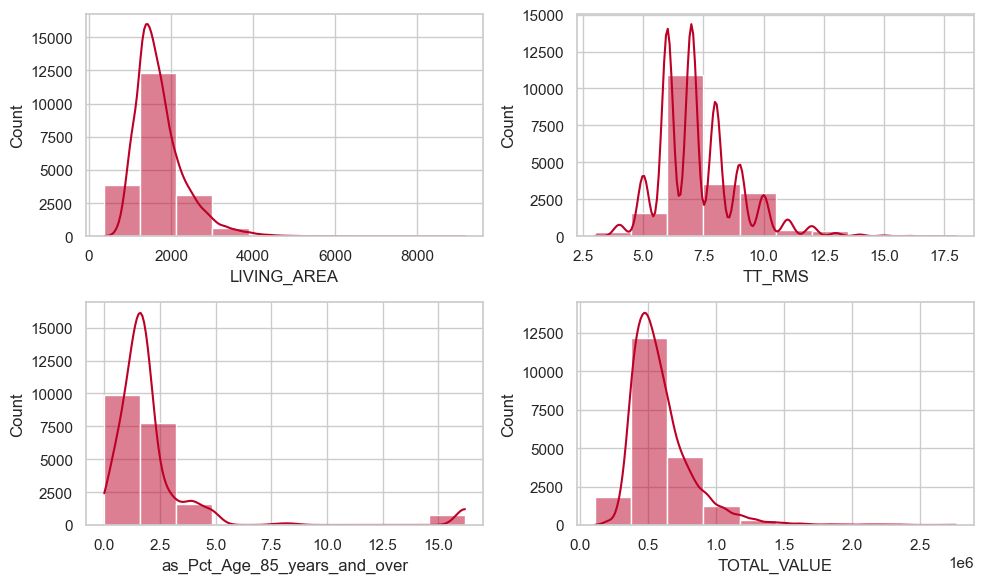

In [61]:
''' Generate histograms for select original features '''

sns.set(style="whitegrid")  
fig,axs = plt.subplots(2,2, figsize = (10,6))

sns.histplot(data=df, x=kmeans_master_df["LIVING_AREA"], kde=True, color="#bd0026", bins=10, ax=axs[0, 0])
sns.histplot(data=df, x=kmeans_master_df["TT_RMS"], kde=True, color="#bd0026", bins=10, ax=axs[0, 1])
sns.histplot(data=df, x=kmeans_master_df["as_Pct_Age_85_years_and_over"], kde=True, color="#bd0026", bins=10, ax=axs[1, 0])
sns.histplot(data=df, x=kmeans_master_df["TOTAL_VALUE"], kde=True, color="#bd0026", bins=10, ax=axs[1, 1])
fig.tight_layout()

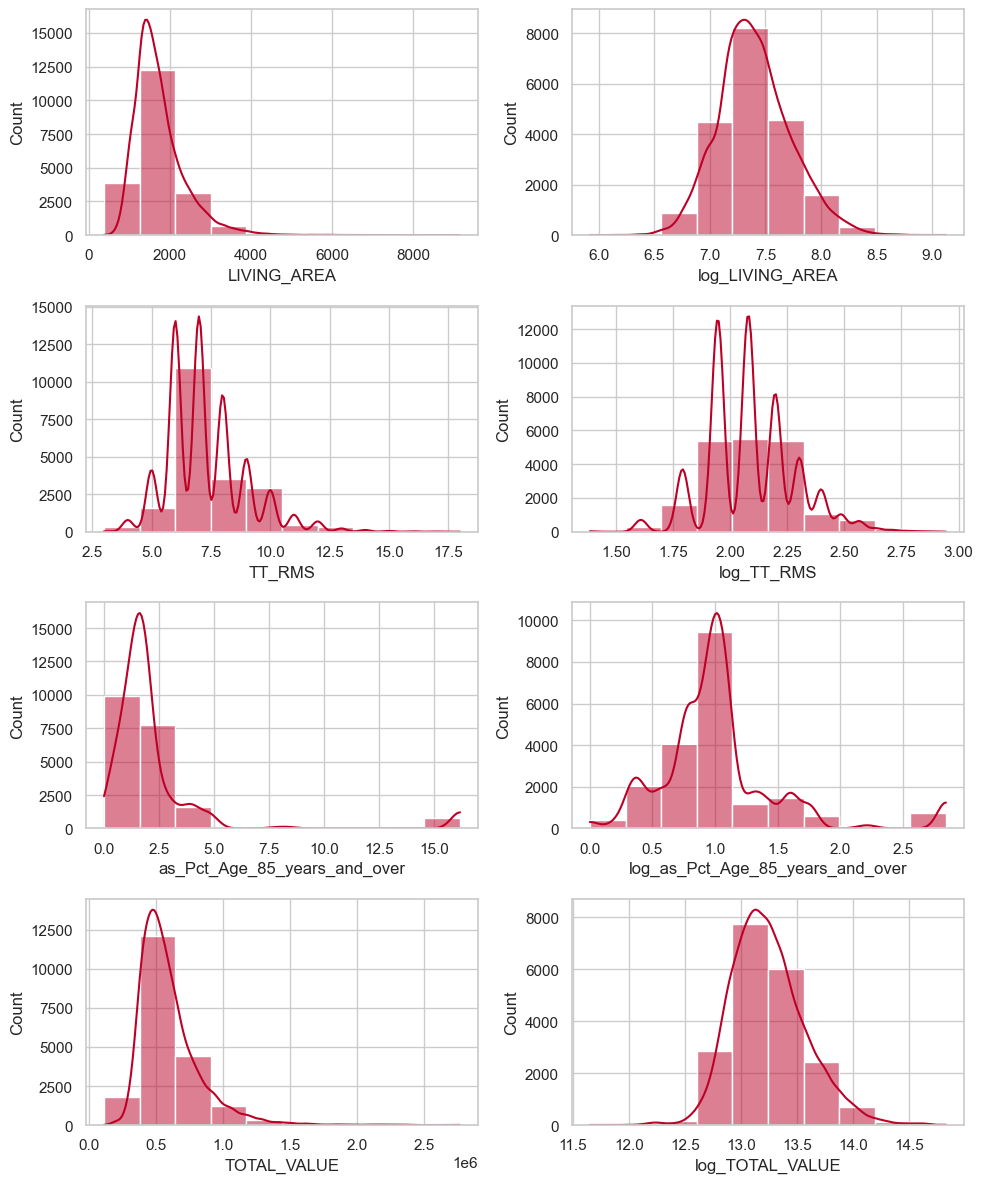

In [62]:
''' Generate histograms for select original and log-transformed features'''

sns.set(style="whitegrid")  
fig,axs = plt.subplots(4,2, figsize = (10,12))

sns.histplot(data=df, x=kmeans_master_df["LIVING_AREA"], kde=True, color="#bd0026", bins=10, ax=axs[0, 0])
sns.histplot(data=df, x=kmeans_master_df["log_LIVING_AREA"], kde=True, color="#bd0026", bins=10, ax=axs[0, 1])
sns.histplot(data=df, x=kmeans_master_df["TT_RMS"], kde=True, color="#bd0026", bins=10, ax=axs[1, 0])
sns.histplot(data=df, x=kmeans_master_df["log_TT_RMS"], kde=True, color="#bd0026", bins=10, ax=axs[1, 1])
sns.histplot(data=df, x=kmeans_master_df["as_Pct_Age_85_years_and_over"], kde=True, color="#bd0026", bins=10, ax=axs[2, 0])
sns.histplot(data=df, x=kmeans_master_df["log_as_Pct_Age_85_years_and_over"], kde=True, color="#bd0026", bins=10, ax=axs[2, 1])
sns.histplot(data=df, x=kmeans_master_df["TOTAL_VALUE"], kde=True, color="#bd0026", bins=10, ax=axs[3, 0])
sns.histplot(data=df, x=kmeans_master_df["log_TOTAL_VALUE"], kde=True, color="#bd0026", bins=10, ax=axs[3, 1])
fig.tight_layout()

## *STANDARDIZATION TRANSFORMATION*

In [63]:
kmeans_master_df.head()

,PID,RES_FLOOR,LAND_SF,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,YR_BUILT,BED_RMS,FULL_BTH,HLF_BTH,KITCHEN,TT_RMS,FIRE_PLACE,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_lt_10000,inc_pct_fam_married_couple_inc_10000_14999,inc_pct_fam_married_couple_inc_15000_24999,inc_pct_fam_married_couple_inc_25000_34999,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,inc_pct_fam_married_couple_inc_100000_149999,inc_pct_fam_married_couple_inc_150000_199999,inc_pct_fam_married_couple_inc_gt_200000,inc_cnt_hh_non_fam_total,inc_pct_hh_non_fam_inc_lt_10000,inc_pct_hh_non_fam_inc_10000_14999,inc_pct_hh_non_fam_inc_15000_24999,inc_pct_hh_non_fam_inc_25000_34999,inc_pct_hh_non_fam_inc_35000_49999,inc_pct_hh_non_fam_inc_50000_74999,inc_pct_hh_non_fam_inc_75000_99999,inc_pct_hh_non_fam_inc_100000_149999,inc_pct_hh_non_fam_inc_150000_199999,inc_pct_hh_non_fam_inc_gt_200000,as_Cnt_Total_Population,as_Othr_Median_age_(years),as_Ratio_Sex_ratio_(males_per_100_females),as_Ratio_Age_dependency_ratio,as_Ratio_Old-age_dependency_ratio,as_Ratio_Child_dependency_ratio,as_Pct_Age_Under_5_years,as_Pct_Age_5_to_9_years,as_Pct_Age_10_to_14_years,as_Pct_Age_15_to_19_years,as_Pct_Age_20_to_24_years,as_Pct_Age_25_to_29_years,as_Pct_Age_30_to_34_years,as_Pct_Age_35_to_39_years,as_Pct_Age_40_to_44_years,as_Pct_Age_45_to_49_years,as_Pct_Age_50_to_54_years,as_Pct_Age_55_to_59_years,as_Pct_Age_60_to_64_years,as_Pct_Age_65_to_69_years,as_Pct_Age_70_to_74_years,as_Pct_Age_75_to_79_years,as_Pct_Age_80_to_84_years,as_Pct_Age_85_years_and_over,as_Pct_Age_5_to_14_years,as_Pct_Age_15_to_17_years,as_Pct_Age_Under_18_years,as_Pct_Age_18_to_24_years,as_Pct_Age_15_to_44_years,as_Pct_Age_16_years_and_over,as_Pct_Age_18_years_and_over,as_Pct_Age_21_years_and_over,as_Pct_Age_60_years_and_over,as_Pct_Age_62_years_and_over,as_Pct_Age_65_years_and_over,as_Pct_Age_75_years_and_over,as_Cnt_Male_Total_Population,as_Othr_Male_Age_Median_age_(years),as_Cnt_Female_Total_Population,as_Othr_Female_Age_Median_age_(years),as_Pct_Female_Age_21_years_and_over,edu_Pct_Age_18to24_lt_high_school,edu_Pct_Age_18to24_high_school,edu_Pct_Age_18to24_some_college,edu_Pct_Age_18to24_bachelors,edu_Pct_Age_25_plus_lt_9th,edu_Pct_Age_25_plus_some_high_school,edu_Pct_Age_25_plus_high_school,edu_Pct_Age_25_plus_some_college,edu_Pct_Age_25_plus_associates,edu_Pct_Age_25_plus_bachelors,edu_Pct_Age_25_plus_grad_professional,edu_Pct_Age_25_plus_high_school_plus,edu_Pct_Age_25_plus_bachelors_plus,edu_Pct_Age_25to34_high_school_plus,edu_Pct_Age_25to34_bachelors_plus,edu_Pct_Age_35to44_high_school_plus,edu_Pct_Age_35to44_bachelors_plus,edu_Pct_Age_45to64_high_school_plus,edu_Pct_Age_45to64_bachelors_plus,edu_Pct_Age_65_plus_high_school_plus,edu_Pct_Age_65_plus_bachelors_plus,sale_price,TARGET_SPEND,log_RES_FLOOR,log_LAND_SF,log_GROSS_AREA,log_LIVING_AREA,log_LAND_VALUE,log_BLDG_VALUE,log_TOTAL_VALUE,log_BED_RMS,log_FULL_BTH,log_KITCHEN,log_TT_RMS,log_FIRE_PLACE,log_inc_pct_fam_married_couple_inc_lt_10000,log_inc_pct_fam_married_couple_inc_10000_14999,log_inc_pct_fam_married_couple_inc_15000_24999,log_inc_pct_fam_married_couple_inc_25000_34999,log_inc_pct_fam_married_couple_inc_35000_49999,log_inc_pct_fam_married_couple_inc_75000_99999,log_inc_cnt_hh_non_fam_total,log_inc_pct_hh_non_fam_inc_50000_74999,log_inc_pct_hh_non_fam_inc_75000_99999,log_inc_pct_hh_non_fam_inc_150000_199999,log_inc_pct_hh_non_fam_inc_gt_200000,log_as_Othr_Median_age_(years),log_as_Ratio_Age_dependency_ratio,log_as_Ratio_Old-age_dependency_ratio,log_as_Pct_Age_20_to_24_years,log_as_Pct_Age_25_to_29_years,log_as_Pct_Age_30_to_34_years,log_as_Pct_Age_80_to_84_years,log_as_Pct_Age_85_years_and_over,log_as_Pct_Age_18_to_24_years,log_as_Pct_Age_60_years_and_over,log_as_Pct_Age_62_years_and_over,log_as_Pct_Age_65_years_and_over,log_as_Pct_Age_75_years_and_over,log_as_Othr_Female_Age_Median_age_(years),log_edu_Pct_Age_18to24_lt_high_school,log_

In [64]:
kmeans_master_df.shape

(20099, 144)

In [65]:
df_x = kmeans_master_df.loc[:, ~kmeans_master_df.columns.isin(["PID", "TARGET_SPEND"])]

In [66]:
kmeans_master_df.loc[:, ~kmeans_master_df.columns.isin(["PID", "TARGET_SPEND"])] = (df_x-df_x.mean())/df_x.std()

In [67]:
kmeans_master_df.head()

,PID,RES_FLOOR,LAND_SF,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,YR_BUILT,BED_RMS,FULL_BTH,HLF_BTH,KITCHEN,TT_RMS,FIRE_PLACE,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_lt_10000,inc_pct_fam_married_couple_inc_10000_14999,inc_pct_fam_married_couple_inc_15000_24999,inc_pct_fam_married_couple_inc_25000_34999,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,inc_pct_fam_married_couple_inc_100000_149999,inc_pct_fam_married_couple_inc_150000_199999,inc_pct_fam_married_couple_inc_gt_200000,inc_cnt_hh_non_fam_total,inc_pct_hh_non_fam_inc_lt_10000,inc_pct_hh_non_fam_inc_10000_14999,inc_pct_hh_non_fam_inc_15000_24999,inc_pct_hh_non_fam_inc_25000_34999,inc_pct_hh_non_fam_inc_35000_49999,inc_pct_hh_non_fam_inc_50000_74999,inc_pct_hh_non_fam_inc_75000_99999,inc_pct_hh_non_fam_inc_100000_149999,inc_pct_hh_non_fam_inc_150000_199999,inc_pct_hh_non_fam_inc_gt_200000,as_Cnt_Total_Population,as_Othr_Median_age_(years),as_Ratio_Sex_ratio_(males_per_100_females),as_Ratio_Age_dependency_ratio,as_Ratio_Old-age_dependency_ratio,as_Ratio_Child_dependency_ratio,as_Pct_Age_Under_5_years,as_Pct_Age_5_to_9_years,as_Pct_Age_10_to_14_years,as_Pct_Age_15_to_19_years,as_Pct_Age_20_to_24_years,as_Pct_Age_25_to_29_years,as_Pct_Age_30_to_34_years,as_Pct_Age_35_to_39_years,as_Pct_Age_40_to_44_years,as_Pct_Age_45_to_49_years,as_Pct_Age_50_to_54_years,as_Pct_Age_55_to_59_years,as_Pct_Age_60_to_64_years,as_Pct_Age_65_to_69_years,as_Pct_Age_70_to_74_years,as_Pct_Age_75_to_79_years,as_Pct_Age_80_to_84_years,as_Pct_Age_85_years_and_over,as_Pct_Age_5_to_14_years,as_Pct_Age_15_to_17_years,as_Pct_Age_Under_18_years,as_Pct_Age_18_to_24_years,as_Pct_Age_15_to_44_years,as_Pct_Age_16_years_and_over,as_Pct_Age_18_years_and_over,as_Pct_Age_21_years_and_over,as_Pct_Age_60_years_and_over,as_Pct_Age_62_years_and_over,as_Pct_Age_65_years_and_over,as_Pct_Age_75_years_and_over,as_Cnt_Male_Total_Population,as_Othr_Male_Age_Median_age_(years),as_Cnt_Female_Total_Population,as_Othr_Female_Age_Median_age_(years),as_Pct_Female_Age_21_years_and_over,edu_Pct_Age_18to24_lt_high_school,edu_Pct_Age_18to24_high_school,edu_Pct_Age_18to24_some_college,edu_Pct_Age_18to24_bachelors,edu_Pct_Age_25_plus_lt_9th,edu_Pct_Age_25_plus_some_high_school,edu_Pct_Age_25_plus_high_school,edu_Pct_Age_25_plus_some_college,edu_Pct_Age_25_plus_associates,edu_Pct_Age_25_plus_bachelors,edu_Pct_Age_25_plus_grad_professional,edu_Pct_Age_25_plus_high_school_plus,edu_Pct_Age_25_plus_bachelors_plus,edu_Pct_Age_25to34_high_school_plus,edu_Pct_Age_25to34_bachelors_plus,edu_Pct_Age_35to44_high_school_plus,edu_Pct_Age_35to44_bachelors_plus,edu_Pct_Age_45to64_high_school_plus,edu_Pct_Age_45to64_bachelors_plus,edu_Pct_Age_65_plus_high_school_plus,edu_Pct_Age_65_plus_bachelors_plus,sale_price,TARGET_SPEND,log_RES_FLOOR,log_LAND_SF,log_GROSS_AREA,log_LIVING_AREA,log_LAND_VALUE,log_BLDG_VALUE,log_TOTAL_VALUE,log_BED_RMS,log_FULL_BTH,log_KITCHEN,log_TT_RMS,log_FIRE_PLACE,log_inc_pct_fam_married_couple_inc_lt_10000,log_inc_pct_fam_married_couple_inc_10000_14999,log_inc_pct_fam_married_couple_inc_15000_24999,log_inc_pct_fam_married_couple_inc_25000_34999,log_inc_pct_fam_married_couple_inc_35000_49999,log_inc_pct_fam_married_couple_inc_75000_99999,log_inc_cnt_hh_non_fam_total,log_inc_pct_hh_non_fam_inc_50000_74999,log_inc_pct_hh_non_fam_inc_75000_99999,log_inc_pct_hh_non_fam_inc_150000_199999,log_inc_pct_hh_non_fam_inc_gt_200000,log_as_Othr_Median_age_(years),log_as_Ratio_Age_dependency_ratio,log_as_Ratio_Old-age_dependency_ratio,log_as_Pct_Age_20_to_24_years,log_as_Pct_Age_25_to_29_years,log_as_Pct_Age_30_to_34_years,log_as_Pct_Age_80_to_84_years,log_as_Pct_Age_85_years_and_over,log_as_Pct_Age_18_to_24_years,log_as_Pct_Age_60_years_and_over,log_as_Pct_Age_62_years_and_over,log_as_Pct_Age_65_years_and_over,log_as_Pct_Age_75_years_and_over,log_as_Othr_Female_Age_Median_age_(years),log_edu_Pct_Age_18to24_lt_high_school,log_

In [68]:
kmeans_master_df.shape

(20099, 144)

In [69]:
kmeans_master_df.describe()

,PID,RES_FLOOR,LAND_SF,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,YR_BUILT,BED_RMS,FULL_BTH,HLF_BTH,KITCHEN,TT_RMS,FIRE_PLACE,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_lt_10000,inc_pct_fam_married_couple_inc_10000_14999,inc_pct_fam_married_couple_inc_15000_24999,inc_pct_fam_married_couple_inc_25000_34999,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,inc_pct_fam_married_couple_inc_100000_149999,inc_pct_fam_married_couple_inc_150000_199999,inc_pct_fam_married_couple_inc_gt_200000,inc_cnt_hh_non_fam_total,inc_pct_hh_non_fam_inc_lt_10000,inc_pct_hh_non_fam_inc_10000_14999,inc_pct_hh_non_fam_inc_15000_24999,inc_pct_hh_non_fam_inc_25000_34999,inc_pct_hh_non_fam_inc_35000_49999,inc_pct_hh_non_fam_inc_50000_74999,inc_pct_hh_non_fam_inc_75000_99999,inc_pct_hh_non_fam_inc_100000_149999,inc_pct_hh_non_fam_inc_150000_199999,inc_pct_hh_non_fam_inc_gt_200000,as_Cnt_Total_Population,as_Othr_Median_age_(years),as_Ratio_Sex_ratio_(males_per_100_females),as_Ratio_Age_dependency_ratio,as_Ratio_Old-age_dependency_ratio,as_Ratio_Child_dependency_ratio,as_Pct_Age_Under_5_years,as_Pct_Age_5_to_9_years,as_Pct_Age_10_to_14_years,as_Pct_Age_15_to_19_years,as_Pct_Age_20_to_24_years,as_Pct_Age_25_to_29_years,as_Pct_Age_30_to_34_years,as_Pct_Age_35_to_39_years,as_Pct_Age_40_to_44_years,as_Pct_Age_45_to_49_years,as_Pct_Age_50_to_54_years,as_Pct_Age_55_to_59_years,as_Pct_Age_60_to_64_years,as_Pct_Age_65_to_69_years,as_Pct_Age_70_to_74_years,as_Pct_Age_75_to_79_years,as_Pct_Age_80_to_84_years,as_Pct_Age_85_years_and_over,as_Pct_Age_5_to_14_years,as_Pct_Age_15_to_17_years,as_Pct_Age_Under_18_years,as_Pct_Age_18_to_24_years,as_Pct_Age_15_to_44_years,as_Pct_Age_16_years_and_over,as_Pct_Age_18_years_and_over,as_Pct_Age_21_years_and_over,as_Pct_Age_60_years_and_over,as_Pct_Age_62_years_and_over,as_Pct_Age_65_years_and_over,as_Pct_Age_75_years_and_over,as_Cnt_Male_Total_Population,as_Othr_Male_Age_Median_age_(years),as_Cnt_Female_Total_Population,as_Othr_Female_Age_Median_age_(years),as_Pct_Female_Age_21_years_and_over,edu_Pct_Age_18to24_lt_high_school,edu_Pct_Age_18to24_high_school,edu_Pct_Age_18to24_some_college,edu_Pct_Age_18to24_bachelors,edu_Pct_Age_25_plus_lt_9th,edu_Pct_Age_25_plus_some_high_school,edu_Pct_Age_25_plus_high_school,edu_Pct_Age_25_plus_some_college,edu_Pct_Age_25_plus_associates,edu_Pct_Age_25_plus_bachelors,edu_Pct_Age_25_plus_grad_professional,edu_Pct_Age_25_plus_high_school_plus,edu_Pct_Age_25_plus_bachelors_plus,edu_Pct_Age_25to34_high_school_plus,edu_Pct_Age_25to34_bachelors_plus,edu_Pct_Age_35to44_high_school_plus,edu_Pct_Age_35to44_bachelors_plus,edu_Pct_Age_45to64_high_school_plus,edu_Pct_Age_45to64_bachelors_plus,edu_Pct_Age_65_plus_high_school_plus,edu_Pct_Age_65_plus_bachelors_plus,sale_price,log_RES_FLOOR,log_LAND_SF,log_GROSS_AREA,log_LIVING_AREA,log_LAND_VALUE,log_BLDG_VALUE,log_TOTAL_VALUE,log_BED_RMS,log_FULL_BTH,log_KITCHEN,log_TT_RMS,log_FIRE_PLACE,log_inc_pct_fam_married_couple_inc_lt_10000,log_inc_pct_fam_married_couple_inc_10000_14999,log_inc_pct_fam_married_couple_inc_15000_24999,log_inc_pct_fam_married_couple_inc_25000_34999,log_inc_pct_fam_married_couple_inc_35000_49999,log_inc_pct_fam_married_couple_inc_75000_99999,log_inc_cnt_hh_non_fam_total,log_inc_pct_hh_non_fam_inc_50000_74999,log_inc_pct_hh_non_fam_inc_75000_99999,log_inc_pct_hh_non_fam_inc_150000_199999,log_inc_pct_hh_non_fam_inc_gt_200000,log_as_Othr_Median_age_(years),log_as_Ratio_Age_dependency_ratio,log_as_Ratio_Old-age_dependency_ratio,log_as_Pct_Age_20_to_24_years,log_as_Pct_Age_25_to_29_years,log_as_Pct_Age_30_to_34_years,log_as_Pct_Age_80_to_84_years,log_as_Pct_Age_85_years_and_over,log_as_Pct_Age_18_to_24_years,log_as_Pct_Age_60_years_and_over,log_as_Pct_Age_62_years_and_over,log_as_Pct_Age_65_years_and_over,log_as_Pct_Age_75_years_and_over,log_as_Othr_Female_Age_Median_age_(years),log_edu_Pct_Age_18to24_lt_high_school,log_edu_Pct_Age_1

In [70]:
varNames = kmeans_master_df.columns

In [71]:
trn_varNames = []
for i in varNames:
    if i == 'PID' or i == 'TARGET_SPEND': newName = i
    else: newName = "trn_" + i
    trn_varNames.append(newName)

In [72]:
kmeans_master_df.columns = trn_varNames

In [73]:
kmeans_master_df.head()

,PID,trn_RES_FLOOR,trn_LAND_SF,trn_GROSS_AREA,trn_LIVING_AREA,trn_LAND_VALUE,trn_BLDG_VALUE,trn_TOTAL_VALUE,trn_YR_BUILT,trn_BED_RMS,trn_FULL_BTH,trn_HLF_BTH,trn_KITCHEN,trn_TT_RMS,trn_FIRE_PLACE,trn_inc_cnt_fam_married_couple_total,trn_inc_pct_fam_married_couple_inc_lt_10000,trn_inc_pct_fam_married_couple_inc_10000_14999,trn_inc_pct_fam_married_couple_inc_15000_24999,trn_inc_pct_fam_married_couple_inc_25000_34999,trn_inc_pct_fam_married_couple_inc_35000_49999,trn_inc_pct_fam_married_couple_inc_50000_74999,trn_inc_pct_fam_married_couple_inc_75000_99999,trn_inc_pct_fam_married_couple_inc_100000_149999,trn_inc_pct_fam_married_couple_inc_150000_199999,trn_inc_pct_fam_married_couple_inc_gt_200000,trn_inc_cnt_hh_non_fam_total,trn_inc_pct_hh_non_fam_inc_lt_10000,trn_inc_pct_hh_non_fam_inc_10000_14999,trn_inc_pct_hh_non_fam_inc_15000_24999,trn_inc_pct_hh_non_fam_inc_25000_34999,trn_inc_pct_hh_non_fam_inc_35000_49999,trn_inc_pct_hh_non_fam_inc_50000_74999,trn_inc_pct_hh_non_fam_inc_75000_99999,trn_inc_pct_hh_non_fam_inc_100000_149999,trn_inc_pct_hh_non_fam_inc_150000_199999,trn_inc_pct_hh_non_fam_inc_gt_200000,trn_as_Cnt_Total_Population,trn_as_Othr_Median_age_(years),trn_as_Ratio_Sex_ratio_(males_per_100_females),trn_as_Ratio_Age_dependency_ratio,trn_as_Ratio_Old-age_dependency_ratio,trn_as_Ratio_Child_dependency_ratio,trn_as_Pct_Age_Under_5_years,trn_as_Pct_Age_5_to_9_years,trn_as_Pct_Age_10_to_14_years,trn_as_Pct_Age_15_to_19_years,trn_as_Pct_Age_20_to_24_years,trn_as_Pct_Age_25_to_29_years,trn_as_Pct_Age_30_to_34_years,trn_as_Pct_Age_35_to_39_years,trn_as_Pct_Age_40_to_44_years,trn_as_Pct_Age_45_to_49_years,trn_as_Pct_Age_50_to_54_years,trn_as_Pct_Age_55_to_59_years,trn_as_Pct_Age_60_to_64_years,trn_as_Pct_Age_65_to_69_years,trn_as_Pct_Age_70_to_74_years,trn_as_Pct_Age_75_to_79_years,trn_as_Pct_Age_80_to_84_years,trn_as_Pct_Age_85_years_and_over,trn_as_Pct_Age_5_to_14_years,trn_as_Pct_Age_15_to_17_years,trn_as_Pct_Age_Under_18_years,trn_as_Pct_Age_18_to_24_years,trn_as_Pct_Age_15_to_44_years,trn_as_Pct_Age_16_years_and_over,trn_as_Pct_Age_18_years_and_over,trn_as_Pct_Age_21_years_and_over,trn_as_Pct_Age_60_years_and_over,trn_as_Pct_Age_62_years_and_over,trn_as_Pct_Age_65_years_and_over,trn_as_Pct_Age_75_years_and_over,trn_as_Cnt_Male_Total_Population,trn_as_Othr_Male_Age_Median_age_(years),trn_as_Cnt_Female_Total_Population,trn_as_Othr_Female_Age_Median_age_(years),trn_as_Pct_Female_Age_21_years_and_over,trn_edu_Pct_Age_18to24_lt_high_school,trn_edu_Pct_Age_18to24_high_school,trn_edu_Pct_Age_18to24_some_college,trn_edu_Pct_Age_18to24_bachelors,trn_edu_Pct_Age_25_plus_lt_9th,trn_edu_Pct_Age_25_plus_some_high_school,trn_edu_Pct_Age_25_plus_high_school,trn_edu_Pct_Age_25_plus_some_college,trn_edu_Pct_Age_25_plus_associates,trn_edu_Pct_Age_25_plus_bachelors,trn_edu_Pct_Age_25_plus_grad_professional,trn_edu_Pct_Age_25_plus_high_school_plus,trn_edu_Pct_Age_25_plus_bachelors_plus,trn_edu_Pct_Age_25to34_high_school_plus,trn_edu_Pct_Age_25to34_bachelors_plus,trn_edu_Pct_Age_35to44_high_school_plus,trn_edu_Pct_Age_35to44_bachelors_plus,trn_edu_Pct_Age_45to64_high_school_plus,trn_edu_Pct_Age_45to64_bachelors_plus,trn_edu_Pct_Age_65_plus_high_school_plus,trn_edu_Pct_Age_65_plus_bachelors_plus,trn_sale_price,TARGET_SPEND,trn_log_RES_FLOOR,trn_log_LAND_SF,trn_log_GROSS_AREA,trn_log_LIVING_AREA,trn_log_LAND_VALUE,trn_log_BLDG_VALUE,trn_log_TOTAL_VALUE,trn_log_BED_RMS,trn_log_FULL_BTH,trn_log_KITCHEN,trn_log_TT_RMS,trn_log_FIRE_PLACE,trn_log_inc_pct_fam_married_couple_inc_lt_10000,trn_log_inc_pct_fam_married_couple_inc_10000_14999,trn_log_inc_pct_fam_married_couple_inc_15000_24999,trn_log_inc_pct_fam_married_couple_inc_25000_34999,trn_log_inc_pct_fam_married_couple_inc_35000_49999,trn_log_inc_pct_fam_married_couple_inc_75000_99999,trn_log_inc_cnt_hh_non_fam_total,trn_log_inc_pct_hh_non_fam_inc_50000_74999,trn_log_inc_pct_hh_non_fam_inc_75000_99999,trn_log_inc_pct_hh_non_fam_inc_150000_199999,trn_log_inc_pct_hh_non_fam_inc_gt_200000,trn_log_as_Oth

In [74]:
kmeans_master_df.shape

(20099, 144)

In [75]:
kmeans_master_df.describe()

,PID,trn_RES_FLOOR,trn_LAND_SF,trn_GROSS_AREA,trn_LIVING_AREA,trn_LAND_VALUE,trn_BLDG_VALUE,trn_TOTAL_VALUE,trn_YR_BUILT,trn_BED_RMS,trn_FULL_BTH,trn_HLF_BTH,trn_KITCHEN,trn_TT_RMS,trn_FIRE_PLACE,trn_inc_cnt_fam_married_couple_total,trn_inc_pct_fam_married_couple_inc_lt_10000,trn_inc_pct_fam_married_couple_inc_10000_14999,trn_inc_pct_fam_married_couple_inc_15000_24999,trn_inc_pct_fam_married_couple_inc_25000_34999,trn_inc_pct_fam_married_couple_inc_35000_49999,trn_inc_pct_fam_married_couple_inc_50000_74999,trn_inc_pct_fam_married_couple_inc_75000_99999,trn_inc_pct_fam_married_couple_inc_100000_149999,trn_inc_pct_fam_married_couple_inc_150000_199999,trn_inc_pct_fam_married_couple_inc_gt_200000,trn_inc_cnt_hh_non_fam_total,trn_inc_pct_hh_non_fam_inc_lt_10000,trn_inc_pct_hh_non_fam_inc_10000_14999,trn_inc_pct_hh_non_fam_inc_15000_24999,trn_inc_pct_hh_non_fam_inc_25000_34999,trn_inc_pct_hh_non_fam_inc_35000_49999,trn_inc_pct_hh_non_fam_inc_50000_74999,trn_inc_pct_hh_non_fam_inc_75000_99999,trn_inc_pct_hh_non_fam_inc_100000_149999,trn_inc_pct_hh_non_fam_inc_150000_199999,trn_inc_pct_hh_non_fam_inc_gt_200000,trn_as_Cnt_Total_Population,trn_as_Othr_Median_age_(years),trn_as_Ratio_Sex_ratio_(males_per_100_females),trn_as_Ratio_Age_dependency_ratio,trn_as_Ratio_Old-age_dependency_ratio,trn_as_Ratio_Child_dependency_ratio,trn_as_Pct_Age_Under_5_years,trn_as_Pct_Age_5_to_9_years,trn_as_Pct_Age_10_to_14_years,trn_as_Pct_Age_15_to_19_years,trn_as_Pct_Age_20_to_24_years,trn_as_Pct_Age_25_to_29_years,trn_as_Pct_Age_30_to_34_years,trn_as_Pct_Age_35_to_39_years,trn_as_Pct_Age_40_to_44_years,trn_as_Pct_Age_45_to_49_years,trn_as_Pct_Age_50_to_54_years,trn_as_Pct_Age_55_to_59_years,trn_as_Pct_Age_60_to_64_years,trn_as_Pct_Age_65_to_69_years,trn_as_Pct_Age_70_to_74_years,trn_as_Pct_Age_75_to_79_years,trn_as_Pct_Age_80_to_84_years,trn_as_Pct_Age_85_years_and_over,trn_as_Pct_Age_5_to_14_years,trn_as_Pct_Age_15_to_17_years,trn_as_Pct_Age_Under_18_years,trn_as_Pct_Age_18_to_24_years,trn_as_Pct_Age_15_to_44_years,trn_as_Pct_Age_16_years_and_over,trn_as_Pct_Age_18_years_and_over,trn_as_Pct_Age_21_years_and_over,trn_as_Pct_Age_60_years_and_over,trn_as_Pct_Age_62_years_and_over,trn_as_Pct_Age_65_years_and_over,trn_as_Pct_Age_75_years_and_over,trn_as_Cnt_Male_Total_Population,trn_as_Othr_Male_Age_Median_age_(years),trn_as_Cnt_Female_Total_Population,trn_as_Othr_Female_Age_Median_age_(years),trn_as_Pct_Female_Age_21_years_and_over,trn_edu_Pct_Age_18to24_lt_high_school,trn_edu_Pct_Age_18to24_high_school,trn_edu_Pct_Age_18to24_some_college,trn_edu_Pct_Age_18to24_bachelors,trn_edu_Pct_Age_25_plus_lt_9th,trn_edu_Pct_Age_25_plus_some_high_school,trn_edu_Pct_Age_25_plus_high_school,trn_edu_Pct_Age_25_plus_some_college,trn_edu_Pct_Age_25_plus_associates,trn_edu_Pct_Age_25_plus_bachelors,trn_edu_Pct_Age_25_plus_grad_professional,trn_edu_Pct_Age_25_plus_high_school_plus,trn_edu_Pct_Age_25_plus_bachelors_plus,trn_edu_Pct_Age_25to34_high_school_plus,trn_edu_Pct_Age_25to34_bachelors_plus,trn_edu_Pct_Age_35to44_high_school_plus,trn_edu_Pct_Age_35to44_bachelors_plus,trn_edu_Pct_Age_45to64_high_school_plus,trn_edu_Pct_Age_45to64_bachelors_plus,trn_edu_Pct_Age_65_plus_high_school_plus,trn_edu_Pct_Age_65_plus_bachelors_plus,trn_sale_price,trn_log_RES_FLOOR,trn_log_LAND_SF,trn_log_GROSS_AREA,trn_log_LIVING_AREA,trn_log_LAND_VALUE,trn_log_BLDG_VALUE,trn_log_TOTAL_VALUE,trn_log_BED_RMS,trn_log_FULL_BTH,trn_log_KITCHEN,trn_log_TT_RMS,trn_log_FIRE_PLACE,trn_log_inc_pct_fam_married_couple_inc_lt_10000,trn_log_inc_pct_fam_married_couple_inc_10000_14999,trn_log_inc_pct_fam_married_couple_inc_15000_24999,trn_log_inc_pct_fam_married_couple_inc_25000_34999,trn_log_inc_pct_fam_married_couple_inc_35000_49999,trn_log_inc_pct_fam_married_couple_inc_75000_99999,trn_log_inc_cnt_hh_non_fam_total,trn_log_inc_pct_hh_non_fam_inc_50000_74999,trn_log_inc_pct_hh_non_fam_inc_75000_99999,trn_log_inc_pct_hh_non_fam_inc_150000_199999,trn_log_inc_pct_hh_non_fam_inc_gt_200000,trn_log_as_Othr_Median_age_

In [76]:
print("Missing Observations:\n---------------------")
for i in kmeans_master_df.columns :
    print(i, "=", kmeans_master_df[i].isna().sum())

Missing Observations:
---------------------
PID = 0
trn_RES_FLOOR = 0
trn_LAND_SF = 0
trn_GROSS_AREA = 0
trn_LIVING_AREA = 0
trn_LAND_VALUE = 0
trn_BLDG_VALUE = 0
trn_TOTAL_VALUE = 0
trn_YR_BUILT = 0
trn_BED_RMS = 0
trn_FULL_BTH = 0
trn_HLF_BTH = 0
trn_KITCHEN = 0
trn_TT_RMS = 0
trn_FIRE_PLACE = 0
trn_inc_cnt_fam_married_couple_total = 0
trn_inc_pct_fam_married_couple_inc_lt_10000 = 0
trn_inc_pct_fam_married_couple_inc_10000_14999 = 0
trn_inc_pct_fam_married_couple_inc_15000_24999 = 0
trn_inc_pct_fam_married_couple_inc_25000_34999 = 0
trn_inc_pct_fam_married_couple_inc_35000_49999 = 0
trn_inc_pct_fam_married_couple_inc_50000_74999 = 0
trn_inc_pct_fam_married_couple_inc_75000_99999 = 0
trn_inc_pct_fam_married_couple_inc_100000_149999 = 0
trn_inc_pct_fam_married_couple_inc_150000_199999 = 0
trn_inc_pct_fam_married_couple_inc_gt_200000 = 0
trn_inc_cnt_hh_non_fam_total = 0
trn_inc_pct_hh_non_fam_inc_lt_10000 = 0
trn_inc_pct_hh_non_fam_inc_10000_14999 = 0
trn_inc_pct_hh_non_fam_inc_15000_24

In [77]:
trn_select_df = kmeans_master_df[['trn_LIVING_AREA', 'trn_TT_RMS', 'trn_as_Pct_Age_85_years_and_over', 'trn_sale_price']]
trn_select_df.describe()

,trn_LIVING_AREA,trn_TT_RMS,trn_as_Pct_Age_85_years_and_over,trn_sale_price
count,20099.000,20099.000,20099.000,20099.000
mean,-0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000
min,-2.189,-2.558,-0.788,-0.855
25%,-0.662,-0.756,-0.380,-0.855
50%,-0.217,-0.155,-0.210,-0.297
75%,0.425,0.446,-0.109,0.603
max,12.016,6.455,4.719,8.925


In [78]:
kmeans_master_df["TARGET_SPEND"].unique()

array(['None', 'Low', 'Medium', 'High'], dtype=object)

In [79]:
df = kmeans_master_df.copy()

In [80]:
df.shape

(20099, 144)

In [81]:
df.head()

,PID,trn_RES_FLOOR,trn_LAND_SF,trn_GROSS_AREA,trn_LIVING_AREA,trn_LAND_VALUE,trn_BLDG_VALUE,trn_TOTAL_VALUE,trn_YR_BUILT,trn_BED_RMS,trn_FULL_BTH,trn_HLF_BTH,trn_KITCHEN,trn_TT_RMS,trn_FIRE_PLACE,trn_inc_cnt_fam_married_couple_total,trn_inc_pct_fam_married_couple_inc_lt_10000,trn_inc_pct_fam_married_couple_inc_10000_14999,trn_inc_pct_fam_married_couple_inc_15000_24999,trn_inc_pct_fam_married_couple_inc_25000_34999,trn_inc_pct_fam_married_couple_inc_35000_49999,trn_inc_pct_fam_married_couple_inc_50000_74999,trn_inc_pct_fam_married_couple_inc_75000_99999,trn_inc_pct_fam_married_couple_inc_100000_149999,trn_inc_pct_fam_married_couple_inc_150000_199999,trn_inc_pct_fam_married_couple_inc_gt_200000,trn_inc_cnt_hh_non_fam_total,trn_inc_pct_hh_non_fam_inc_lt_10000,trn_inc_pct_hh_non_fam_inc_10000_14999,trn_inc_pct_hh_non_fam_inc_15000_24999,trn_inc_pct_hh_non_fam_inc_25000_34999,trn_inc_pct_hh_non_fam_inc_35000_49999,trn_inc_pct_hh_non_fam_inc_50000_74999,trn_inc_pct_hh_non_fam_inc_75000_99999,trn_inc_pct_hh_non_fam_inc_100000_149999,trn_inc_pct_hh_non_fam_inc_150000_199999,trn_inc_pct_hh_non_fam_inc_gt_200000,trn_as_Cnt_Total_Population,trn_as_Othr_Median_age_(years),trn_as_Ratio_Sex_ratio_(males_per_100_females),trn_as_Ratio_Age_dependency_ratio,trn_as_Ratio_Old-age_dependency_ratio,trn_as_Ratio_Child_dependency_ratio,trn_as_Pct_Age_Under_5_years,trn_as_Pct_Age_5_to_9_years,trn_as_Pct_Age_10_to_14_years,trn_as_Pct_Age_15_to_19_years,trn_as_Pct_Age_20_to_24_years,trn_as_Pct_Age_25_to_29_years,trn_as_Pct_Age_30_to_34_years,trn_as_Pct_Age_35_to_39_years,trn_as_Pct_Age_40_to_44_years,trn_as_Pct_Age_45_to_49_years,trn_as_Pct_Age_50_to_54_years,trn_as_Pct_Age_55_to_59_years,trn_as_Pct_Age_60_to_64_years,trn_as_Pct_Age_65_to_69_years,trn_as_Pct_Age_70_to_74_years,trn_as_Pct_Age_75_to_79_years,trn_as_Pct_Age_80_to_84_years,trn_as_Pct_Age_85_years_and_over,trn_as_Pct_Age_5_to_14_years,trn_as_Pct_Age_15_to_17_years,trn_as_Pct_Age_Under_18_years,trn_as_Pct_Age_18_to_24_years,trn_as_Pct_Age_15_to_44_years,trn_as_Pct_Age_16_years_and_over,trn_as_Pct_Age_18_years_and_over,trn_as_Pct_Age_21_years_and_over,trn_as_Pct_Age_60_years_and_over,trn_as_Pct_Age_62_years_and_over,trn_as_Pct_Age_65_years_and_over,trn_as_Pct_Age_75_years_and_over,trn_as_Cnt_Male_Total_Population,trn_as_Othr_Male_Age_Median_age_(years),trn_as_Cnt_Female_Total_Population,trn_as_Othr_Female_Age_Median_age_(years),trn_as_Pct_Female_Age_21_years_and_over,trn_edu_Pct_Age_18to24_lt_high_school,trn_edu_Pct_Age_18to24_high_school,trn_edu_Pct_Age_18to24_some_college,trn_edu_Pct_Age_18to24_bachelors,trn_edu_Pct_Age_25_plus_lt_9th,trn_edu_Pct_Age_25_plus_some_high_school,trn_edu_Pct_Age_25_plus_high_school,trn_edu_Pct_Age_25_plus_some_college,trn_edu_Pct_Age_25_plus_associates,trn_edu_Pct_Age_25_plus_bachelors,trn_edu_Pct_Age_25_plus_grad_professional,trn_edu_Pct_Age_25_plus_high_school_plus,trn_edu_Pct_Age_25_plus_bachelors_plus,trn_edu_Pct_Age_25to34_high_school_plus,trn_edu_Pct_Age_25to34_bachelors_plus,trn_edu_Pct_Age_35to44_high_school_plus,trn_edu_Pct_Age_35to44_bachelors_plus,trn_edu_Pct_Age_45to64_high_school_plus,trn_edu_Pct_Age_45to64_bachelors_plus,trn_edu_Pct_Age_65_plus_high_school_plus,trn_edu_Pct_Age_65_plus_bachelors_plus,trn_sale_price,TARGET_SPEND,trn_log_RES_FLOOR,trn_log_LAND_SF,trn_log_GROSS_AREA,trn_log_LIVING_AREA,trn_log_LAND_VALUE,trn_log_BLDG_VALUE,trn_log_TOTAL_VALUE,trn_log_BED_RMS,trn_log_FULL_BTH,trn_log_KITCHEN,trn_log_TT_RMS,trn_log_FIRE_PLACE,trn_log_inc_pct_fam_married_couple_inc_lt_10000,trn_log_inc_pct_fam_married_couple_inc_10000_14999,trn_log_inc_pct_fam_married_couple_inc_15000_24999,trn_log_inc_pct_fam_married_couple_inc_25000_34999,trn_log_inc_pct_fam_married_couple_inc_35000_49999,trn_log_inc_pct_fam_married_couple_inc_75000_99999,trn_log_inc_cnt_hh_non_fam_total,trn_log_inc_pct_hh_non_fam_inc_50000_74999,trn_log_inc_pct_hh_non_fam_inc_75000_99999,trn_log_inc_pct_hh_non_fam_inc_150000_199999,trn_log_inc_pct_hh_non_fam_inc_gt_200000,trn_log_as_Oth

In [82]:
df.describe()

,PID,trn_RES_FLOOR,trn_LAND_SF,trn_GROSS_AREA,trn_LIVING_AREA,trn_LAND_VALUE,trn_BLDG_VALUE,trn_TOTAL_VALUE,trn_YR_BUILT,trn_BED_RMS,trn_FULL_BTH,trn_HLF_BTH,trn_KITCHEN,trn_TT_RMS,trn_FIRE_PLACE,trn_inc_cnt_fam_married_couple_total,trn_inc_pct_fam_married_couple_inc_lt_10000,trn_inc_pct_fam_married_couple_inc_10000_14999,trn_inc_pct_fam_married_couple_inc_15000_24999,trn_inc_pct_fam_married_couple_inc_25000_34999,trn_inc_pct_fam_married_couple_inc_35000_49999,trn_inc_pct_fam_married_couple_inc_50000_74999,trn_inc_pct_fam_married_couple_inc_75000_99999,trn_inc_pct_fam_married_couple_inc_100000_149999,trn_inc_pct_fam_married_couple_inc_150000_199999,trn_inc_pct_fam_married_couple_inc_gt_200000,trn_inc_cnt_hh_non_fam_total,trn_inc_pct_hh_non_fam_inc_lt_10000,trn_inc_pct_hh_non_fam_inc_10000_14999,trn_inc_pct_hh_non_fam_inc_15000_24999,trn_inc_pct_hh_non_fam_inc_25000_34999,trn_inc_pct_hh_non_fam_inc_35000_49999,trn_inc_pct_hh_non_fam_inc_50000_74999,trn_inc_pct_hh_non_fam_inc_75000_99999,trn_inc_pct_hh_non_fam_inc_100000_149999,trn_inc_pct_hh_non_fam_inc_150000_199999,trn_inc_pct_hh_non_fam_inc_gt_200000,trn_as_Cnt_Total_Population,trn_as_Othr_Median_age_(years),trn_as_Ratio_Sex_ratio_(males_per_100_females),trn_as_Ratio_Age_dependency_ratio,trn_as_Ratio_Old-age_dependency_ratio,trn_as_Ratio_Child_dependency_ratio,trn_as_Pct_Age_Under_5_years,trn_as_Pct_Age_5_to_9_years,trn_as_Pct_Age_10_to_14_years,trn_as_Pct_Age_15_to_19_years,trn_as_Pct_Age_20_to_24_years,trn_as_Pct_Age_25_to_29_years,trn_as_Pct_Age_30_to_34_years,trn_as_Pct_Age_35_to_39_years,trn_as_Pct_Age_40_to_44_years,trn_as_Pct_Age_45_to_49_years,trn_as_Pct_Age_50_to_54_years,trn_as_Pct_Age_55_to_59_years,trn_as_Pct_Age_60_to_64_years,trn_as_Pct_Age_65_to_69_years,trn_as_Pct_Age_70_to_74_years,trn_as_Pct_Age_75_to_79_years,trn_as_Pct_Age_80_to_84_years,trn_as_Pct_Age_85_years_and_over,trn_as_Pct_Age_5_to_14_years,trn_as_Pct_Age_15_to_17_years,trn_as_Pct_Age_Under_18_years,trn_as_Pct_Age_18_to_24_years,trn_as_Pct_Age_15_to_44_years,trn_as_Pct_Age_16_years_and_over,trn_as_Pct_Age_18_years_and_over,trn_as_Pct_Age_21_years_and_over,trn_as_Pct_Age_60_years_and_over,trn_as_Pct_Age_62_years_and_over,trn_as_Pct_Age_65_years_and_over,trn_as_Pct_Age_75_years_and_over,trn_as_Cnt_Male_Total_Population,trn_as_Othr_Male_Age_Median_age_(years),trn_as_Cnt_Female_Total_Population,trn_as_Othr_Female_Age_Median_age_(years),trn_as_Pct_Female_Age_21_years_and_over,trn_edu_Pct_Age_18to24_lt_high_school,trn_edu_Pct_Age_18to24_high_school,trn_edu_Pct_Age_18to24_some_college,trn_edu_Pct_Age_18to24_bachelors,trn_edu_Pct_Age_25_plus_lt_9th,trn_edu_Pct_Age_25_plus_some_high_school,trn_edu_Pct_Age_25_plus_high_school,trn_edu_Pct_Age_25_plus_some_college,trn_edu_Pct_Age_25_plus_associates,trn_edu_Pct_Age_25_plus_bachelors,trn_edu_Pct_Age_25_plus_grad_professional,trn_edu_Pct_Age_25_plus_high_school_plus,trn_edu_Pct_Age_25_plus_bachelors_plus,trn_edu_Pct_Age_25to34_high_school_plus,trn_edu_Pct_Age_25to34_bachelors_plus,trn_edu_Pct_Age_35to44_high_school_plus,trn_edu_Pct_Age_35to44_bachelors_plus,trn_edu_Pct_Age_45to64_high_school_plus,trn_edu_Pct_Age_45to64_bachelors_plus,trn_edu_Pct_Age_65_plus_high_school_plus,trn_edu_Pct_Age_65_plus_bachelors_plus,trn_sale_price,trn_log_RES_FLOOR,trn_log_LAND_SF,trn_log_GROSS_AREA,trn_log_LIVING_AREA,trn_log_LAND_VALUE,trn_log_BLDG_VALUE,trn_log_TOTAL_VALUE,trn_log_BED_RMS,trn_log_FULL_BTH,trn_log_KITCHEN,trn_log_TT_RMS,trn_log_FIRE_PLACE,trn_log_inc_pct_fam_married_couple_inc_lt_10000,trn_log_inc_pct_fam_married_couple_inc_10000_14999,trn_log_inc_pct_fam_married_couple_inc_15000_24999,trn_log_inc_pct_fam_married_couple_inc_25000_34999,trn_log_inc_pct_fam_married_couple_inc_35000_49999,trn_log_inc_pct_fam_married_couple_inc_75000_99999,trn_log_inc_cnt_hh_non_fam_total,trn_log_inc_pct_hh_non_fam_inc_50000_74999,trn_log_inc_pct_hh_non_fam_inc_75000_99999,trn_log_inc_pct_hh_non_fam_inc_150000_199999,trn_log_inc_pct_hh_non_fam_inc_gt_200000,trn_log_as_Othr_Median_age_

In [83]:
''' Drop Properties Property_Type columns and undesignated columns to create Demographic Property_Type data frame '''

demographics_df = df.drop(["trn_LAND_VALUE", "trn_log_LAND_VALUE","trn_BLDG_VALUE", \
                          "trn_log_BLDG_VALUE","trn_TOTAL_VALUE", "trn_log_TOTAL_VALUE", \
                          "trn_YR_BUILT", "trn_HLF_BTH", "trn_log_RES_FLOOR", \
                          "trn_log_LAND_SF", "trn_log_GROSS_AREA", "trn_log_LIVING_AREA", "trn_log_BED_RMS", \
                          "trn_log_FULL_BTH", "trn_log_KITCHEN", "trn_log_TT_RMS", "trn_log_FIRE_PLACE", \
                          "trn_log_sale_price", "trn_RES_FLOOR", "trn_LAND_SF", "trn_GROSS_AREA", \
                          "trn_LIVING_AREA", "trn_BED_RMS", "trn_FULL_BTH", "trn_KITCHEN", \
                          "trn_TT_RMS", "trn_FIRE_PLACE", "trn_inc_pct_fam_married_couple_inc_lt_10000", \
                          "trn_inc_pct_fam_married_couple_inc_10000_14999", \
                          "trn_inc_pct_fam_married_couple_inc_15000_24999", \
                          "trn_inc_pct_fam_married_couple_inc_25000_34999", \
                          "trn_inc_pct_fam_married_couple_inc_35000_49999", \
                          "trn_inc_pct_fam_married_couple_inc_75000_99999", "trn_inc_cnt_hh_non_fam_total", \
                          "trn_inc_pct_hh_non_fam_inc_50000_74999", "trn_inc_pct_hh_non_fam_inc_75000_99999", \
                          "trn_inc_pct_hh_non_fam_inc_150000_199999", "trn_inc_pct_hh_non_fam_inc_gt_200000", \
                          "trn_as_Othr_Median_age_(years)", "trn_as_Ratio_Age_dependency_ratio", \
                          "trn_as_Ratio_Old-age_dependency_ratio", "trn_as_Pct_Age_20_to_24_years", \
                          "trn_as_Pct_Age_25_to_29_years", "trn_as_Pct_Age_30_to_34_years", \
                          "trn_as_Pct_Age_80_to_84_years", "trn_as_Pct_Age_85_years_and_over", \
                          "trn_as_Pct_Age_18_to_24_years", "trn_as_Pct_Age_60_years_and_over", \
                          "trn_as_Pct_Age_62_years_and_over", "trn_as_Pct_Age_65_years_and_over", \
                          "trn_as_Pct_Age_75_years_and_over", "trn_as_Othr_Female_Age_Median_age_(years)", \
                          "trn_edu_Pct_Age_18to24_lt_high_school", "trn_edu_Pct_Age_18to24_bachelors", \
                          "trn_edu_Pct_Age_25to34_high_school_plus", "trn_edu_Pct_Age_35to44_high_school_plus", \
                          "trn_edu_Pct_Age_45to64_high_school_plus", "trn_sale_price"], axis=1)

In [84]:
demographics_df.head()

,PID,trn_inc_cnt_fam_married_couple_total,trn_inc_pct_fam_married_couple_inc_50000_74999,trn_inc_pct_fam_married_couple_inc_100000_149999,trn_inc_pct_fam_married_couple_inc_150000_199999,trn_inc_pct_fam_married_couple_inc_gt_200000,trn_inc_pct_hh_non_fam_inc_lt_10000,trn_inc_pct_hh_non_fam_inc_10000_14999,trn_inc_pct_hh_non_fam_inc_15000_24999,trn_inc_pct_hh_non_fam_inc_25000_34999,trn_inc_pct_hh_non_fam_inc_35000_49999,trn_inc_pct_hh_non_fam_inc_100000_149999,trn_as_Cnt_Total_Population,trn_as_Ratio_Sex_ratio_(males_per_100_females),trn_as_Ratio_Child_dependency_ratio,trn_as_Pct_Age_Under_5_years,trn_as_Pct_Age_5_to_9_years,trn_as_Pct_Age_10_to_14_years,trn_as_Pct_Age_15_to_19_years,trn_as_Pct_Age_35_to_39_years,trn_as_Pct_Age_40_to_44_years,trn_as_Pct_Age_45_to_49_years,trn_as_Pct_Age_50_to_54_years,trn_as_Pct_Age_55_to_59_years,trn_as_Pct_Age_60_to_64_years,trn_as_Pct_Age_65_to_69_years,trn_as_Pct_Age_70_to_74_years,trn_as_Pct_Age_75_to_79_years,trn_as_Pct_Age_5_to_14_years,trn_as_Pct_Age_15_to_17_years,trn_as_Pct_Age_Under_18_years,trn_as_Pct_Age_15_to_44_years,trn_as_Pct_Age_16_years_and_over,trn_as_Pct_Age_18_years_and_over,trn_as_Pct_Age_21_years_and_over,trn_as_Cnt_Male_Total_Population,trn_as_Othr_Male_Age_Median_age_(years),trn_as_Cnt_Female_Total_Population,trn_as_Pct_Female_Age_21_years_and_over,trn_edu_Pct_Age_18to24_high_school,trn_edu_Pct_Age_18to24_some_college,trn_edu_Pct_Age_25_plus_lt_9th,trn_edu_Pct_Age_25_plus_some_high_school,trn_edu_Pct_Age_25_plus_high_school,trn_edu_Pct_Age_25_plus_some_college,trn_edu_Pct_Age_25_plus_associates,trn_edu_Pct_Age_25_plus_bachelors,trn_edu_Pct_Age_25_plus_grad_professional,trn_edu_Pct_Age_25_plus_high_school_plus,trn_edu_Pct_Age_25_plus_bachelors_plus,trn_edu_Pct_Age_25to34_bachelors_plus,trn_edu_Pct_Age_35to44_bachelors_plus,trn_edu_Pct_Age_45to64_bachelors_plus,trn_edu_Pct_Age_65_plus_high_school_plus,trn_edu_Pct_Age_65_plus_bachelors_plus,TARGET_SPEND,trn_log_inc_pct_fam_married_couple_inc_lt_10000,trn_log_inc_pct_fam_married_couple_inc_10000_14999,trn_log_inc_pct_fam_married_couple_inc_15000_24999,trn_log_inc_pct_fam_married_couple_inc_25000_34999,trn_log_inc_pct_fam_married_couple_inc_35000_49999,trn_log_inc_pct_fam_married_couple_inc_75000_99999,trn_log_inc_cnt_hh_non_fam_total,trn_log_inc_pct_hh_non_fam_inc_50000_74999,trn_log_inc_pct_hh_non_fam_inc_75000_99999,trn_log_inc_pct_hh_non_fam_inc_150000_199999,trn_log_inc_pct_hh_non_fam_inc_gt_200000,trn_log_as_Othr_Median_age_(years),trn_log_as_Ratio_Age_dependency_ratio,trn_log_as_Ratio_Old-age_dependency_ratio,trn_log_as_Pct_Age_20_to_24_years,trn_log_as_Pct_Age_25_to_29_years,trn_log_as_Pct_Age_30_to_34_years,trn_log_as_Pct_Age_80_to_84_years,trn_log_as_Pct_Age_85_years_and_over,trn_log_as_Pct_Age_18_to_24_years,trn_log_as_Pct_Age_60_years_and_over,trn_log_as_Pct_Age_62_years_and_over,trn_log_as_Pct_Age_65_years_and_over,trn_log_as_Pct_Age_75_years_and_over,trn_log_as_Othr_Female_Age_Median_age_(years),trn_log_edu_Pct_Age_18to24_lt_high_school,trn_log_edu_Pct_Age_18to24_bachelors,trn_log_edu_Pct_Age_25to34_high_school_plus,trn_log_edu_Pct_Age_35to44_high_school_plus,trn_log_edu_Pct_Age_45to64_high_school_plus
0,1000019000,-2.264,-1.417,-2.225,2.555,-0.923,-0.282,-0.653,-0.607,-0.622,0.489,0.280,-0.905,2.669,-3.340,-2.972,-2.576,-2.126,-1.712,-1.605,-1.659,-2.631,-0.859,-2.310,-2.382,-0.957,-1.350,-0.809,-2.860,-1.523,-3.823,4.406,3.988,3.823,2.612,-0.533,-2.183,-1.199,2.328,-0.883,1.403,-0.586,-1.326,-1.971,-1.276,0.565,1.907,0.999,1.073,1.500,1.573,-1.275,0.740,0.986,1.797,None,-0.552,-0.540,1.699,-1.280,1.505,1.406,1.943,0.642,0.425,1.018,0.017,-2.694,-4.273,-1.530,4.355,2.278,-0.244,0.809,0.142,3.924,-1.952,-1.529,-1.012,-0.060,-2.435,-1.676,0.720,0.949,0.743,-0.109
1,1000024000,-2.264,-1.417,-2.225,2.555,-0.923,-0.282,-0.653,-0.607,-0.622,0.489,0.280,-0.905,2.669,-3.340,-2.972,-2.576,-2.126,-1.712,-1.605,-1.659,-2.631,-0.859,-2.310,-2.382,-0.957,-1.350,-0.809,-2.860,-1.523,-3.823,4.406,3.988,3.823,2.612,-0.533,-

In [85]:
demographics_df.shape

(20099, 86)

In [86]:
demographics_df["TARGET_SPEND"].unique()

array(['None', 'Low', 'Medium', 'High'], dtype=object)

In [87]:
demographics_df.describe()

,PID,trn_inc_cnt_fam_married_couple_total,trn_inc_pct_fam_married_couple_inc_50000_74999,trn_inc_pct_fam_married_couple_inc_100000_149999,trn_inc_pct_fam_married_couple_inc_150000_199999,trn_inc_pct_fam_married_couple_inc_gt_200000,trn_inc_pct_hh_non_fam_inc_lt_10000,trn_inc_pct_hh_non_fam_inc_10000_14999,trn_inc_pct_hh_non_fam_inc_15000_24999,trn_inc_pct_hh_non_fam_inc_25000_34999,trn_inc_pct_hh_non_fam_inc_35000_49999,trn_inc_pct_hh_non_fam_inc_100000_149999,trn_as_Cnt_Total_Population,trn_as_Ratio_Sex_ratio_(males_per_100_females),trn_as_Ratio_Child_dependency_ratio,trn_as_Pct_Age_Under_5_years,trn_as_Pct_Age_5_to_9_years,trn_as_Pct_Age_10_to_14_years,trn_as_Pct_Age_15_to_19_years,trn_as_Pct_Age_35_to_39_years,trn_as_Pct_Age_40_to_44_years,trn_as_Pct_Age_45_to_49_years,trn_as_Pct_Age_50_to_54_years,trn_as_Pct_Age_55_to_59_years,trn_as_Pct_Age_60_to_64_years,trn_as_Pct_Age_65_to_69_years,trn_as_Pct_Age_70_to_74_years,trn_as_Pct_Age_75_to_79_years,trn_as_Pct_Age_5_to_14_years,trn_as_Pct_Age_15_to_17_years,trn_as_Pct_Age_Under_18_years,trn_as_Pct_Age_15_to_44_years,trn_as_Pct_Age_16_years_and_over,trn_as_Pct_Age_18_years_and_over,trn_as_Pct_Age_21_years_and_over,trn_as_Cnt_Male_Total_Population,trn_as_Othr_Male_Age_Median_age_(years),trn_as_Cnt_Female_Total_Population,trn_as_Pct_Female_Age_21_years_and_over,trn_edu_Pct_Age_18to24_high_school,trn_edu_Pct_Age_18to24_some_college,trn_edu_Pct_Age_25_plus_lt_9th,trn_edu_Pct_Age_25_plus_some_high_school,trn_edu_Pct_Age_25_plus_high_school,trn_edu_Pct_Age_25_plus_some_college,trn_edu_Pct_Age_25_plus_associates,trn_edu_Pct_Age_25_plus_bachelors,trn_edu_Pct_Age_25_plus_grad_professional,trn_edu_Pct_Age_25_plus_high_school_plus,trn_edu_Pct_Age_25_plus_bachelors_plus,trn_edu_Pct_Age_25to34_bachelors_plus,trn_edu_Pct_Age_35to44_bachelors_plus,trn_edu_Pct_Age_45to64_bachelors_plus,trn_edu_Pct_Age_65_plus_high_school_plus,trn_edu_Pct_Age_65_plus_bachelors_plus,trn_log_inc_pct_fam_married_couple_inc_lt_10000,trn_log_inc_pct_fam_married_couple_inc_10000_14999,trn_log_inc_pct_fam_married_couple_inc_15000_24999,trn_log_inc_pct_fam_married_couple_inc_25000_34999,trn_log_inc_pct_fam_married_couple_inc_35000_49999,trn_log_inc_pct_fam_married_couple_inc_75000_99999,trn_log_inc_cnt_hh_non_fam_total,trn_log_inc_pct_hh_non_fam_inc_50000_74999,trn_log_inc_pct_hh_non_fam_inc_75000_99999,trn_log_inc_pct_hh_non_fam_inc_150000_199999,trn_log_inc_pct_hh_non_fam_inc_gt_200000,trn_log_as_Othr_Median_age_(years),trn_log_as_Ratio_Age_dependency_ratio,trn_log_as_Ratio_Old-age_dependency_ratio,trn_log_as_Pct_Age_20_to_24_years,trn_log_as_Pct_Age_25_to_29_years,trn_log_as_Pct_Age_30_to_34_years,trn_log_as_Pct_Age_80_to_84_years,trn_log_as_Pct_Age_85_years_and_over,trn_log_as_Pct_Age_18_to_24_years,trn_log_as_Pct_Age_60_years_and_over,trn_log_as_Pct_Age_62_years_and_over,trn_log_as_Pct_Age_65_years_and_over,trn_log_as_Pct_Age_75_years_and_over,trn_log_as_Othr_Female_Age_Median_age_(years),trn_log_edu_Pct_Age_18to24_lt_high_school,trn_log_edu_Pct_Age_18to24_bachelors,trn_log_edu_Pct_Age_25to34_high_school_plus,trn_log_edu_Pct_Age_35to44_high_school_plus,trn_log_edu_Pct_Age_45to64_high_school_plus
count,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000

In [88]:
''' Create Property Property_Type data frame '''

properties_df = df[["PID", "trn_log_TOTAL_VALUE", "trn_YR_BUILT", "trn_HLF_BTH", \
              "trn_log_RES_FLOOR", "trn_log_LAND_SF", "trn_log_GROSS_AREA", "trn_log_LIVING_AREA", \
              "trn_log_BED_RMS", "trn_log_FULL_BTH", "trn_log_KITCHEN", "trn_log_TT_RMS", "trn_log_FIRE_PLACE", \
              "trn_log_sale_price", "TARGET_SPEND"]]

In [89]:
properties_df.head()

,PID,trn_log_TOTAL_VALUE,trn_YR_BUILT,trn_HLF_BTH,trn_log_RES_FLOOR,trn_log_LAND_SF,trn_log_GROSS_AREA,trn_log_LIVING_AREA,trn_log_BED_RMS,trn_log_FULL_BTH,trn_log_KITCHEN,trn_log_TT_RMS,trn_log_FIRE_PLACE,trn_log_sale_price,TARGET_SPEND
0,1000019000,1.449,-1.043,-1.075,2.155,-3.092,-0.003,0.645,1.565,-0.704,-0.149,0.546,-0.958,-1.020,None
1,1000024000,1.778,-1.043,0.787,2.155,-3.092,0.029,0.660,0.691,1.076,-0.149,-0.760,0.811,0.997,None
2,1000027000,2.275,-1.828,-1.075,2.155,-3.092,0.548,1.403,0.691,2.340,-0.149,0.546,0.811,0.996,None
3,1000029000,1.557,-1.043,-1.075,2.155,-3.092,-0.003,0.645,0.691,1.076,-0.149,0.546,-0.958,-1.431,None
4,1000093000,2.168,-1.043,0.787,2.155,-2.841,0.115,0.890,-1.756,1.076,-0.149,0.546,-0.958,-1.431,None


In [90]:
properties_df.shape

(20099, 15)

In [91]:
properties_df["TARGET_SPEND"].unique()

array(['None', 'Low', 'Medium', 'High'], dtype=object)

In [92]:
properties_df.describe()

,PID,trn_log_TOTAL_VALUE,trn_YR_BUILT,trn_HLF_BTH,trn_log_RES_FLOOR,trn_log_LAND_SF,trn_log_GROSS_AREA,trn_log_LIVING_AREA,trn_log_BED_RMS,trn_log_FULL_BTH,trn_log_KITCHEN,trn_log_TT_RMS,trn_log_FIRE_PLACE,trn_log_sale_price
count,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000
mean,1809785136.511,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000
std,233718696.674,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,1000019000.000,-4.801,-7.013,-1.075,-1.759,-5.151,-5.478,-4.531,-7.019,-0.704,-0.149,-3.666,-0.958,-1.431
25%,1704347000.000,-0.695,-0.728,-1.075,-0.499,-0.599,-0.687,-0.660,-0.378,-0.704,-0.149,-0.760,-0.958,-1.020
50%,1810445000.000,-0.101,-0.100,0.787,0.530,-0.046,-0.125,-0.079,-0.378,-0.704,-0.149,-0.066,0.811,0.682
75%,2003173500.000,0.580,0.686,0.787,0.530,0.537,0.588,0.604,0.691,1.076,-0.149,0.546,0.811,0.854
max,2205663001.000,4.782,2.728,6.370,11.242,6.240,5.718,5.286,4.012,4.797,11.496,4.426,4.920,1.193


# PCA

## *PCA DEMOGRAPHICS*

In [93]:
demographics_df.shape

(20099, 86)

In [94]:
demographics_df["Row_Number"] = np.arange(len(demographics_df))

In [95]:
''' Exclude Target_Spend '''

XD_STD = demographics_df.copy()
XD_STD = XD_STD.loc[:, ~demographics_df.columns.isin(["PID","TARGET_SPEND", "Row_Number"])]

#pca_demographics_df = demographics_df.loc[:, ~demographics_df.columns.isin(["TARGET_SPEND"])].copy()

In [96]:
xd_pca_varNames = XD_STD.columns

In [97]:
XD_STD.head()

,trn_inc_cnt_fam_married_couple_total,trn_inc_pct_fam_married_couple_inc_50000_74999,trn_inc_pct_fam_married_couple_inc_100000_149999,trn_inc_pct_fam_married_couple_inc_150000_199999,trn_inc_pct_fam_married_couple_inc_gt_200000,trn_inc_pct_hh_non_fam_inc_lt_10000,trn_inc_pct_hh_non_fam_inc_10000_14999,trn_inc_pct_hh_non_fam_inc_15000_24999,trn_inc_pct_hh_non_fam_inc_25000_34999,trn_inc_pct_hh_non_fam_inc_35000_49999,trn_inc_pct_hh_non_fam_inc_100000_149999,trn_as_Cnt_Total_Population,trn_as_Ratio_Sex_ratio_(males_per_100_females),trn_as_Ratio_Child_dependency_ratio,trn_as_Pct_Age_Under_5_years,trn_as_Pct_Age_5_to_9_years,trn_as_Pct_Age_10_to_14_years,trn_as_Pct_Age_15_to_19_years,trn_as_Pct_Age_35_to_39_years,trn_as_Pct_Age_40_to_44_years,trn_as_Pct_Age_45_to_49_years,trn_as_Pct_Age_50_to_54_years,trn_as_Pct_Age_55_to_59_years,trn_as_Pct_Age_60_to_64_years,trn_as_Pct_Age_65_to_69_years,trn_as_Pct_Age_70_to_74_years,trn_as_Pct_Age_75_to_79_years,trn_as_Pct_Age_5_to_14_years,trn_as_Pct_Age_15_to_17_years,trn_as_Pct_Age_Under_18_years,trn_as_Pct_Age_15_to_44_years,trn_as_Pct_Age_16_years_and_over,trn_as_Pct_Age_18_years_and_over,trn_as_Pct_Age_21_years_and_over,trn_as_Cnt_Male_Total_Population,trn_as_Othr_Male_Age_Median_age_(years),trn_as_Cnt_Female_Total_Population,trn_as_Pct_Female_Age_21_years_and_over,trn_edu_Pct_Age_18to24_high_school,trn_edu_Pct_Age_18to24_some_college,trn_edu_Pct_Age_25_plus_lt_9th,trn_edu_Pct_Age_25_plus_some_high_school,trn_edu_Pct_Age_25_plus_high_school,trn_edu_Pct_Age_25_plus_some_college,trn_edu_Pct_Age_25_plus_associates,trn_edu_Pct_Age_25_plus_bachelors,trn_edu_Pct_Age_25_plus_grad_professional,trn_edu_Pct_Age_25_plus_high_school_plus,trn_edu_Pct_Age_25_plus_bachelors_plus,trn_edu_Pct_Age_25to34_bachelors_plus,trn_edu_Pct_Age_35to44_bachelors_plus,trn_edu_Pct_Age_45to64_bachelors_plus,trn_edu_Pct_Age_65_plus_high_school_plus,trn_edu_Pct_Age_65_plus_bachelors_plus,trn_log_inc_pct_fam_married_couple_inc_lt_10000,trn_log_inc_pct_fam_married_couple_inc_10000_14999,trn_log_inc_pct_fam_married_couple_inc_15000_24999,trn_log_inc_pct_fam_married_couple_inc_25000_34999,trn_log_inc_pct_fam_married_couple_inc_35000_49999,trn_log_inc_pct_fam_married_couple_inc_75000_99999,trn_log_inc_cnt_hh_non_fam_total,trn_log_inc_pct_hh_non_fam_inc_50000_74999,trn_log_inc_pct_hh_non_fam_inc_75000_99999,trn_log_inc_pct_hh_non_fam_inc_150000_199999,trn_log_inc_pct_hh_non_fam_inc_gt_200000,trn_log_as_Othr_Median_age_(years),trn_log_as_Ratio_Age_dependency_ratio,trn_log_as_Ratio_Old-age_dependency_ratio,trn_log_as_Pct_Age_20_to_24_years,trn_log_as_Pct_Age_25_to_29_years,trn_log_as_Pct_Age_30_to_34_years,trn_log_as_Pct_Age_80_to_84_years,trn_log_as_Pct_Age_85_years_and_over,trn_log_as_Pct_Age_18_to_24_years,trn_log_as_Pct_Age_60_years_and_over,trn_log_as_Pct_Age_62_years_and_over,trn_log_as_Pct_Age_65_years_and_over,trn_log_as_Pct_Age_75_years_and_over,trn_log_as_Othr_Female_Age_Median_age_(years),trn_log_edu_Pct_Age_18to24_lt_high_school,trn_log_edu_Pct_Age_18to24_bachelors,trn_log_edu_Pct_Age_25to34_high_school_plus,trn_log_edu_Pct_Age_35to44_high_school_plus,trn_log_edu_Pct_Age_45to64_high_school_plus
0,-2.264,-1.417,-2.225,2.555,-0.923,-0.282,-0.653,-0.607,-0.622,0.489,0.280,-0.905,2.669,-3.340,-2.972,-2.576,-2.126,-1.712,-1.605,-1.659,-2.631,-0.859,-2.310,-2.382,-0.957,-1.350,-0.809,-2.860,-1.523,-3.823,4.406,3.988,3.823,2.612,-0.533,-2.183,-1.199,2.328,-0.883,1.403,-0.586,-1.326,-1.971,-1.276,0.565,1.907,0.999,1.073,1.500,1.573,-1.275,0.740,0.986,1.797,-0.552,-0.540,1.699,-1.280,1.505,1.406,1.943,0.642,0.425,1.018,0.017,-2.694,-4.273,-1.530,4.355,2.278,-0.244,0.809,0.142,3.924,-1.952,-1.529,-1.012,-0.060,-2.435,-1.676,0.720,0.949,0.743,-0.109
1,-2.264,-1.417,-2.225,2.555,-0.923,-0.282,-0.653,-0.607,-0.622,0.489,0.280,-0.905,2.669,-3.340,-2.972,-2.576,-2.126,-1.712,-1.605,-1.659,-2.631,-0.859,-2.310,-2.382,-0.957,-1.350,-0.809,-2.860,-1.523,-3.823,4.406,3.988,3.823,2.612,-0.533,-2.183,-1.199,2.328,-0.883,1.403,-0.586,-1.32

In [98]:
XD_STD.shape

(20099, 84)

In [99]:
XD_STD.describe()

,trn_inc_cnt_fam_married_couple_total,trn_inc_pct_fam_married_couple_inc_50000_74999,trn_inc_pct_fam_married_couple_inc_100000_149999,trn_inc_pct_fam_married_couple_inc_150000_199999,trn_inc_pct_fam_married_couple_inc_gt_200000,trn_inc_pct_hh_non_fam_inc_lt_10000,trn_inc_pct_hh_non_fam_inc_10000_14999,trn_inc_pct_hh_non_fam_inc_15000_24999,trn_inc_pct_hh_non_fam_inc_25000_34999,trn_inc_pct_hh_non_fam_inc_35000_49999,trn_inc_pct_hh_non_fam_inc_100000_149999,trn_as_Cnt_Total_Population,trn_as_Ratio_Sex_ratio_(males_per_100_females),trn_as_Ratio_Child_dependency_ratio,trn_as_Pct_Age_Under_5_years,trn_as_Pct_Age_5_to_9_years,trn_as_Pct_Age_10_to_14_years,trn_as_Pct_Age_15_to_19_years,trn_as_Pct_Age_35_to_39_years,trn_as_Pct_Age_40_to_44_years,trn_as_Pct_Age_45_to_49_years,trn_as_Pct_Age_50_to_54_years,trn_as_Pct_Age_55_to_59_years,trn_as_Pct_Age_60_to_64_years,trn_as_Pct_Age_65_to_69_years,trn_as_Pct_Age_70_to_74_years,trn_as_Pct_Age_75_to_79_years,trn_as_Pct_Age_5_to_14_years,trn_as_Pct_Age_15_to_17_years,trn_as_Pct_Age_Under_18_years,trn_as_Pct_Age_15_to_44_years,trn_as_Pct_Age_16_years_and_over,trn_as_Pct_Age_18_years_and_over,trn_as_Pct_Age_21_years_and_over,trn_as_Cnt_Male_Total_Population,trn_as_Othr_Male_Age_Median_age_(years),trn_as_Cnt_Female_Total_Population,trn_as_Pct_Female_Age_21_years_and_over,trn_edu_Pct_Age_18to24_high_school,trn_edu_Pct_Age_18to24_some_college,trn_edu_Pct_Age_25_plus_lt_9th,trn_edu_Pct_Age_25_plus_some_high_school,trn_edu_Pct_Age_25_plus_high_school,trn_edu_Pct_Age_25_plus_some_college,trn_edu_Pct_Age_25_plus_associates,trn_edu_Pct_Age_25_plus_bachelors,trn_edu_Pct_Age_25_plus_grad_professional,trn_edu_Pct_Age_25_plus_high_school_plus,trn_edu_Pct_Age_25_plus_bachelors_plus,trn_edu_Pct_Age_25to34_bachelors_plus,trn_edu_Pct_Age_35to44_bachelors_plus,trn_edu_Pct_Age_45to64_bachelors_plus,trn_edu_Pct_Age_65_plus_high_school_plus,trn_edu_Pct_Age_65_plus_bachelors_plus,trn_log_inc_pct_fam_married_couple_inc_lt_10000,trn_log_inc_pct_fam_married_couple_inc_10000_14999,trn_log_inc_pct_fam_married_couple_inc_15000_24999,trn_log_inc_pct_fam_married_couple_inc_25000_34999,trn_log_inc_pct_fam_married_couple_inc_35000_49999,trn_log_inc_pct_fam_married_couple_inc_75000_99999,trn_log_inc_cnt_hh_non_fam_total,trn_log_inc_pct_hh_non_fam_inc_50000_74999,trn_log_inc_pct_hh_non_fam_inc_75000_99999,trn_log_inc_pct_hh_non_fam_inc_150000_199999,trn_log_inc_pct_hh_non_fam_inc_gt_200000,trn_log_as_Othr_Median_age_(years),trn_log_as_Ratio_Age_dependency_ratio,trn_log_as_Ratio_Old-age_dependency_ratio,trn_log_as_Pct_Age_20_to_24_years,trn_log_as_Pct_Age_25_to_29_years,trn_log_as_Pct_Age_30_to_34_years,trn_log_as_Pct_Age_80_to_84_years,trn_log_as_Pct_Age_85_years_and_over,trn_log_as_Pct_Age_18_to_24_years,trn_log_as_Pct_Age_60_years_and_over,trn_log_as_Pct_Age_62_years_and_over,trn_log_as_Pct_Age_65_years_and_over,trn_log_as_Pct_Age_75_years_and_over,trn_log_as_Othr_Female_Age_Median_age_(years),trn_log_edu_Pct_Age_18to24_lt_high_school,trn_log_edu_Pct_Age_18to24_bachelors,trn_log_edu_Pct_Age_25to34_high_school_plus,trn_log_edu_Pct_Age_35to44_high_school_plus,trn_log_edu_Pct_Age_45to64_high_school_plus
count,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,200

In [100]:
MAX_N_XD_STD = XD_STD.shape[1]

In [101]:
MAX_N_XD_STD

84

In [102]:
pca = PCA(n_components=MAX_N_XD_STD)
pca.fit(XD_STD)

PCA(n_components=84)

In [103]:
xd_ev = pca.explained_variance_
print("Eigen Values")
print(xd_ev)

Eigen Values
[2.21851611e+01 1.20286067e+01 6.68336865e+00 4.60883814e+00
 3.74820881e+00 3.28645387e+00 2.87582980e+00 2.58811384e+00
 2.30493381e+00 2.13585642e+00 1.67460055e+00 1.53900936e+00
 1.40710590e+00 1.35816423e+00 1.26403810e+00 1.21378600e+00
 1.18889369e+00 1.04669905e+00 9.45457920e-01 9.07837007e-01
 8.10512653e-01 7.37132676e-01 6.54520541e-01 6.17614443e-01
 5.35122024e-01 5.03325113e-01 4.58068458e-01 4.01280912e-01
 3.94289898e-01 3.70993007e-01 3.45258522e-01 3.22863384e-01
 2.73003246e-01 2.51410888e-01 2.38601245e-01 2.22169221e-01
 1.93014527e-01 1.82248616e-01 1.55739835e-01 1.42727131e-01
 1.35689821e-01 1.18821888e-01 1.14197059e-01 1.01193666e-01
 9.86276613e-02 8.52666212e-02 7.33809992e-02 6.84635732e-02
 6.54832884e-02 4.57223186e-02 4.43255296e-02 3.80812661e-02
 3.54321734e-02 3.09860605e-02 2.64440537e-02 2.21507067e-02
 1.97559999e-02 1.94954867e-02 1.24002456e-02 8.61671051e-03
 6.46892142e-03 5.75062311e-03 4.87834930e-03 3.45059076e-03
 3.00836687

In [104]:
varPCT = []
totPCT = []
total = 0
for i in xd_ev:
    total = total + i
    VAR = int(i / len(xd_ev) * 100)
    PCT = int(total / len(xd_ev) * 100)
    varPCT.append(VAR)
    totPCT.append(PCT)
    print(round(i,2), "variation=", VAR,"%"," total=", PCT,"%")

22.19 variation= 26 %  total= 26 %
12.03 variation= 14 %  total= 40 %
6.68 variation= 7 %  total= 48 %
4.61 variation= 5 %  total= 54 %
3.75 variation= 4 %  total= 58 %
3.29 variation= 3 %  total= 62 %
2.88 variation= 3 %  total= 65 %
2.59 variation= 3 %  total= 69 %
2.3 variation= 2 %  total= 71 %
2.14 variation= 2 %  total= 74 %
1.67 variation= 1 %  total= 76 %
1.54 variation= 1 %  total= 78 %
1.41 variation= 1 %  total= 79 %
1.36 variation= 1 %  total= 81 %
1.26 variation= 1 %  total= 82 %
1.21 variation= 1 %  total= 84 %
1.19 variation= 1 %  total= 85 %
1.05 variation= 1 %  total= 87 %
0.95 variation= 1 %  total= 88 %
0.91 variation= 1 %  total= 89 %
0.81 variation= 0 %  total= 90 %
0.74 variation= 0 %  total= 91 %
0.65 variation= 0 %  total= 91 %
0.62 variation= 0 %  total= 92 %
0.54 variation= 0 %  total= 93 %
0.5 variation= 0 %  total= 93 %
0.46 variation= 0 %  total= 94 %
0.4 variation= 0 %  total= 94 %
0.39 variation= 0 %  total= 95 %
0.37 variation= 0 %  total= 95 %
0.35 vari

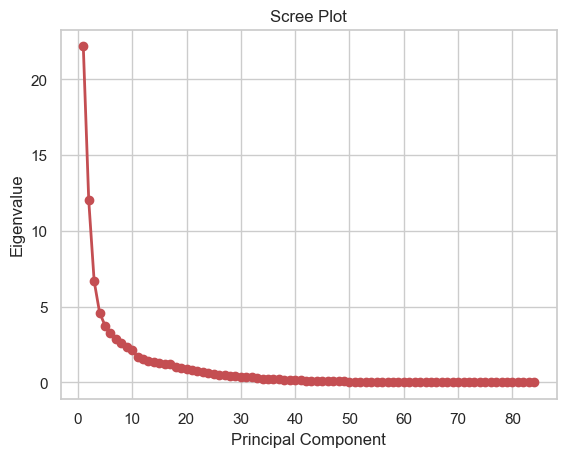

In [105]:
PC_NUM = np.arange(MAX_N_XD_STD) + 1
plt.plot(PC_NUM, xd_ev, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.xticks(np.arange(0, MAX_N_XD_STD+1, 10.0))
plt.show()

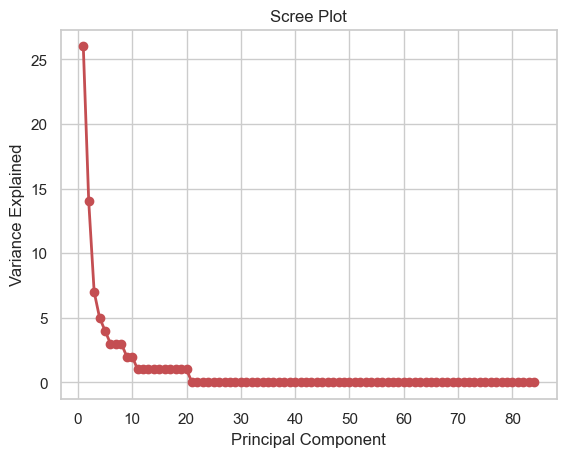

In [106]:
PC_NUM = np.arange(MAX_N_XD_STD) + 1
plt.plot(PC_NUM , varPCT, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(np.arange(0, MAX_N_XD_STD+1, 10.0))
plt.show()

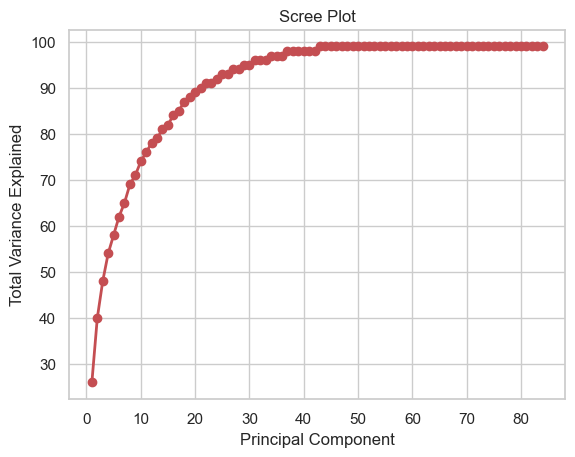

In [107]:
PC_NUM = np.arange(MAX_N_XD_STD) + 1
plt.plot(PC_NUM , totPCT, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Total Variance Explained')
plt.xticks(np.arange(0, MAX_N_XD_STD+1, 10.0))
plt.show()

In [108]:
dfc = pd.DataFrame(pca.components_)
dfc.columns = xd_pca_varNames #list(pca_demographics_df.columns)
dfc

,trn_inc_cnt_fam_married_couple_total,trn_inc_pct_fam_married_couple_inc_50000_74999,trn_inc_pct_fam_married_couple_inc_100000_149999,trn_inc_pct_fam_married_couple_inc_150000_199999,trn_inc_pct_fam_married_couple_inc_gt_200000,trn_inc_pct_hh_non_fam_inc_lt_10000,trn_inc_pct_hh_non_fam_inc_10000_14999,trn_inc_pct_hh_non_fam_inc_15000_24999,trn_inc_pct_hh_non_fam_inc_25000_34999,trn_inc_pct_hh_non_fam_inc_35000_49999,trn_inc_pct_hh_non_fam_inc_100000_149999,trn_as_Cnt_Total_Population,trn_as_Ratio_Sex_ratio_(males_per_100_females),trn_as_Ratio_Child_dependency_ratio,trn_as_Pct_Age_Under_5_years,trn_as_Pct_Age_5_to_9_years,trn_as_Pct_Age_10_to_14_years,trn_as_Pct_Age_15_to_19_years,trn_as_Pct_Age_35_to_39_years,trn_as_Pct_Age_40_to_44_years,trn_as_Pct_Age_45_to_49_years,trn_as_Pct_Age_50_to_54_years,trn_as_Pct_Age_55_to_59_years,trn_as_Pct_Age_60_to_64_years,trn_as_Pct_Age_65_to_69_years,trn_as_Pct_Age_70_to_74_years,trn_as_Pct_Age_75_to_79_years,trn_as_Pct_Age_5_to_14_years,trn_as_Pct_Age_15_to_17_years,trn_as_Pct_Age_Under_18_years,trn_as_Pct_Age_15_to_44_years,trn_as_Pct_Age_16_years_and_over,trn_as_Pct_Age_18_years_and_over,trn_as_Pct_Age_21_years_and_over,trn_as_Cnt_Male_Total_Population,trn_as_Othr_Male_Age_Median_age_(years),trn_as_Cnt_Female_Total_Population,trn_as_Pct_Female_Age_21_years_and_over,trn_edu_Pct_Age_18to24_high_school,trn_edu_Pct_Age_18to24_some_college,trn_edu_Pct_Age_25_plus_lt_9th,trn_edu_Pct_Age_25_plus_some_high_school,trn_edu_Pct_Age_25_plus_high_school,trn_edu_Pct_Age_25_plus_some_college,trn_edu_Pct_Age_25_plus_associates,trn_edu_Pct_Age_25_plus_bachelors,trn_edu_Pct_Age_25_plus_grad_professional,trn_edu_Pct_Age_25_plus_high_school_plus,trn_edu_Pct_Age_25_plus_bachelors_plus,trn_edu_Pct_Age_25to34_bachelors_plus,trn_edu_Pct_Age_35to44_bachelors_plus,trn_edu_Pct_Age_45to64_bachelors_plus,trn_edu_Pct_Age_65_plus_high_school_plus,trn_edu_Pct_Age_65_plus_bachelors_plus,trn_log_inc_pct_fam_married_couple_inc_lt_10000,trn_log_inc_pct_fam_married_couple_inc_10000_14999,trn_log_inc_pct_fam_married_couple_inc_15000_24999,trn_log_inc_pct_fam_married_couple_inc_25000_34999,trn_log_inc_pct_fam_married_couple_inc_35000_49999,trn_log_inc_pct_fam_married_couple_inc_75000_99999,trn_log_inc_cnt_hh_non_fam_total,trn_log_inc_pct_hh_non_fam_inc_50000_74999,trn_log_inc_pct_hh_non_fam_inc_75000_99999,trn_log_inc_pct_hh_non_fam_inc_150000_199999,trn_log_inc_pct_hh_non_fam_inc_gt_200000,trn_log_as_Othr_Median_age_(years),trn_log_as_Ratio_Age_dependency_ratio,trn_log_as_Ratio_Old-age_dependency_ratio,trn_log_as_Pct_Age_20_to_24_years,trn_log_as_Pct_Age_25_to_29_years,trn_log_as_Pct_Age_30_to_34_years,trn_log_as_Pct_Age_80_to_84_years,trn_log_as_Pct_Age_85_years_and_over,trn_log_as_Pct_Age_18_to_24_years,trn_log_as_Pct_Age_60_years_and_over,trn_log_as_Pct_Age_62_years_and_over,trn_log_as_Pct_Age_65_years_and_over,trn_log_as_Pct_Age_75_years_and_over,trn_log_as_Othr_Female_Age_Median_age_(years),trn_log_edu_Pct_Age_18to24_lt_high_school,trn_log_edu_Pct_Age_18to24_bachelors,trn_log_edu_Pct_Age_25to34_high_school_plus,trn_log_edu_Pct_Age_35to44_high_school_plus,trn_log_edu_Pct_Age_45to64_high_school_plus
0,-0.077,0.102,0.026,-0.060,-0.178,0.106,0.088,0.084,-0.004,-0.012,-0.093,0.086,0.014,0.098,0.053,0.087,0.091,0.079,0.051,0.006,0.052,-0.060,-0.004,-0.092,-0.073,-0.099,-0.093,0.110,0.088,0.134,0.072,-0.127,-0.134,-0.141,0.086,-0.154,0.083,-0.093,-0.006,-0.011,0.152,0.181,0.166,0.146,0.081,-0.146,-0.185,-0.184,-0.189,-0.178,-0.178,-0.193,-0.153,-0.169,0.072,0.093,0.087,0.098,0.065,0.113,-0.023,-0.051,-0.011,-0.127,-0.096,-0.144,-0.026,-0.118,0.080,0.077,-0.023,-0.067,-0.110,0.084,-0.132,-0.132,-0.134,-0.123,-0.116,0.094,-0.029,-0.126,-0.135,-0.151
1,-0.037,-0.026,0.052,0.037,-0.073,-0.063,-0.067,-0.059,-0.069,-0.052,0.149,-0.016,0.068,-0.196,0.013,-0.109,-0.158,-0.059,0.132,0.001,-0.033,-0.067,-0.026,-0.136,-0.129,-0.108,-0.099,-0.169,-0.063,-0.145,0.259,0.144,0.145,0.137,-0.006,-0.138,-0.024,0.107,-0.095,-0.028,-0.029,-0.030,-

In [109]:
# pca = PCA(n_components=MAX_N_XD_STD)
# pca.fit(XD_STD)

In [110]:
XD_PCA = pca.transform(XD_STD)
XD_PCA = pd.DataFrame(XD_PCA)
XD_PCA = XD_PCA.iloc[:,0:13]

In [111]:
XD_PCA.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-3.447,12.761,2.591,3.564,2.717,-0.724,-3.647,0.675,4.116,-2.839,-1.815,0.156,-1.565
1,-3.447,12.761,2.591,3.564,2.717,-0.724,-3.647,0.675,4.116,-2.839,-1.815,0.156,-1.565
2,-3.447,12.761,2.591,3.564,2.717,-0.724,-3.647,0.675,4.116,-2.839,-1.815,0.156,-1.565
3,-3.447,12.761,2.591,3.564,2.717,-0.724,-3.647,0.675,4.116,-2.839,-1.815,0.156,-1.565
4,-3.447,12.761,2.591,3.564,2.717,-0.724,-3.647,0.675,4.116,-2.839,-1.815,0.156,-1.565


In [112]:
xd_pca_colNames = XD_PCA.columns
xd_pca_names = []
for i in xd_pca_colNames :
    index = int(i) + 1
    theName = "PC_" + str(index)
    xd_pca_names.append(theName)

In [113]:
XD_PCA.columns = xd_pca_names

In [114]:
XD_PCA.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13
0,-3.447,12.761,2.591,3.564,2.717,-0.724,-3.647,0.675,4.116,-2.839,-1.815,0.156,-1.565
1,-3.447,12.761,2.591,3.564,2.717,-0.724,-3.647,0.675,4.116,-2.839,-1.815,0.156,-1.565
2,-3.447,12.761,2.591,3.564,2.717,-0.724,-3.647,0.675,4.116,-2.839,-1.815,0.156,-1.565
3,-3.447,12.761,2.591,3.564,2.717,-0.724,-3.647,0.675,4.116,-2.839,-1.815,0.156,-1.565
4,-3.447,12.761,2.591,3.564,2.717,-0.724,-3.647,0.675,4.116,-2.839,-1.815,0.156,-1.565


In [115]:
XD_PCA["Row_Number"] = np.arange(len(XD_PCA))
XD_PCA = pd.merge(XD_PCA, demographics_df[["PID", "TARGET_SPEND", "Row_Number"]], on = "Row_Number")
XD_PCA.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,Row_Number,PID,TARGET_SPEND
0,-3.447,12.761,2.591,3.564,2.717,-0.724,-3.647,0.675,4.116,-2.839,-1.815,0.156,-1.565,0,1000019000,None
1,-3.447,12.761,2.591,3.564,2.717,-0.724,-3.647,0.675,4.116,-2.839,-1.815,0.156,-1.565,1,1000024000,None
2,-3.447,12.761,2.591,3.564,2.717,-0.724,-3.647,0.675,4.116,-2.839,-1.815,0.156,-1.565,2,1000027000,None
3,-3.447,12.761,2.591,3.564,2.717,-0.724,-3.647,0.675,4.116,-2.839,-1.815,0.156,-1.565,3,1000029000,None
4,-3.447,12.761,2.591,3.564,2.717,-0.724,-3.647,0.675,4.116,-2.839,-1.815,0.156,-1.565,4,1000093000,None


In [116]:
for i in XD_PCA[["PID", "TARGET_SPEND"]].columns :
    print(i, "=", XD_PCA[["PID", "TARGET_SPEND"]][i].isna().sum())

PID = 0
TARGET_SPEND = 0


In [117]:
for Name, Group in XD_PCA.groupby("TARGET_SPEND"):
    print(Group.head())

       PC_1   PC_2   PC_3   PC_4   PC_5   PC_6  PC_7   PC_8   PC_9  PC_10  \
402  -1.921  6.525 -0.700 -1.327 -0.660  0.003 1.496 -1.353  0.055  0.365   
444  -1.921  6.525 -0.700 -1.327 -0.660  0.003 1.496 -1.353  0.055  0.365   
2924  1.234 -0.090 -1.548  3.173  0.272 -2.128 1.953 -2.036 -0.007  2.462   
3369  2.654  6.304  0.625 -1.482 -0.878  1.780 0.630 -0.775 -1.767 -0.570   
3468  2.654  6.304  0.625 -1.482 -0.878  1.780 0.630 -0.775 -1.767 -0.570   

      PC_11  PC_12  PC_13  Row_Number         PID TARGET_SPEND  
402   0.536 -0.118 -0.280         402  1102130001         High  
444   0.536 -0.118 -0.280         444  1102452000         High  
2924 -0.246  0.218  0.971        2924  1700777000         High  
3369 -0.015 -0.749 -1.643        3369  1601945007         High  
3468 -0.015 -0.749 -1.643        3468  1602149000         High  
      PC_1  PC_2   PC_3   PC_4  PC_5  PC_6   PC_7  PC_8  PC_9  PC_10  PC_11  \
87  -4.376 3.824 -3.421 -0.018 1.542 4.513  1.131 0.379 1.006 -1.489

In [118]:
''' Can only show for 2 PCs '''

# plt.figure(figsize=(10, 10))
# for Name, Group in XD_PCA.groupby("TARGET"):
#     plt.scatter(Group.PC_1, Group.PC_2, label=Name, s=3)
# plt.xlabel("PC_1")
# plt.ylabel("PC_2")
# plt.legend()
# plt.show()

' Can only show for 2 PCs '

## *PCA PROPERTIES*

In [119]:
properties_df.shape

(20099, 15)

In [120]:
properties_df["Row_Number"] = np.arange(len(properties_df))

In [121]:
''' Exclude Target_Spend '''

XP_STD = properties_df.copy()
XP_STD = XP_STD.loc[:, ~properties_df.columns.isin(["PID","TARGET_SPEND", "Row_Number"])]

In [122]:
xp_pca_varNames = XP_STD.columns

In [123]:
XP_STD.head()

,trn_log_TOTAL_VALUE,trn_YR_BUILT,trn_HLF_BTH,trn_log_RES_FLOOR,trn_log_LAND_SF,trn_log_GROSS_AREA,trn_log_LIVING_AREA,trn_log_BED_RMS,trn_log_FULL_BTH,trn_log_KITCHEN,trn_log_TT_RMS,trn_log_FIRE_PLACE,trn_log_sale_price
0,1.449,-1.043,-1.075,2.155,-3.092,-0.003,0.645,1.565,-0.704,-0.149,0.546,-0.958,-1.020
1,1.778,-1.043,0.787,2.155,-3.092,0.029,0.660,0.691,1.076,-0.149,-0.760,0.811,0.997
2,2.275,-1.828,-1.075,2.155,-3.092,0.548,1.403,0.691,2.340,-0.149,0.546,0.811,0.996
3,1.557,-1.043,-1.075,2.155,-3.092,-0.003,0.645,0.691,1.076,-0.149,0.546,-0.958,-1.431
4,2.168,-1.043,0.787,2.155,-2.841,0.115,0.890,-1.756,1.076,-0.149,0.546,-0.958,-1.431


In [124]:
XP_STD.shape

(20099, 13)

In [125]:
XP_STD.describe()

,trn_log_TOTAL_VALUE,trn_YR_BUILT,trn_HLF_BTH,trn_log_RES_FLOOR,trn_log_LAND_SF,trn_log_GROSS_AREA,trn_log_LIVING_AREA,trn_log_BED_RMS,trn_log_FULL_BTH,trn_log_KITCHEN,trn_log_TT_RMS,trn_log_FIRE_PLACE,trn_log_sale_price
count,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000,20099.000
mean,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-4.801,-7.013,-1.075,-1.759,-5.151,-5.478,-4.531,-7.019,-0.704,-0.149,-3.666,-0.958,-1.431
25%,-0.695,-0.728,-1.075,-0.499,-0.599,-0.687,-0.660,-0.378,-0.704,-0.149,-0.760,-0.958,-1.020
50%,-0.101,-0.100,0.787,0.530,-0.046,-0.125,-0.079,-0.378,-0.704,-0.149,-0.066,0.811,0.682
75%,0.580,0.686,0.787,0.530,0.537,0.588,0.604,0.691,1.076,-0.149,0.546,0.811,0.854
max,4.782,2.728,6.370,11.242,6.240,5.718,5.286,4.012,4.797,11.496,4.426,4.920,1.193


In [126]:
MAX_N_XP_STD = XP_STD.shape[1]

In [127]:
MAX_N_XP_STD

13

In [128]:
pca = PCA(n_components=MAX_N_XP_STD)
pca.fit(XP_STD)

PCA(n_components=13)

In [129]:
xp_ev = pca.explained_variance_
print("Eigen Values")
print(xp_ev)

Eigen Values
[4.47430097 1.62144068 1.24088524 1.07450101 0.95784004 0.81148066
 0.72953757 0.62790844 0.4471709  0.36843504 0.32265488 0.2556168
 0.06822778]


In [130]:
varPCT = []
totPCT = []
total = 0
for i in xp_ev:
    total = total + i
    VAR = int(i / len(xp_ev) * 100)
    PCT = int(total / len(xp_ev) * 100)
    varPCT.append(VAR)
    totPCT.append(PCT)
    print(round(i,2), "variation=", VAR,"%"," total=", PCT,"%")

4.47 variation= 34 %  total= 34 %
1.62 variation= 12 %  total= 46 %
1.24 variation= 9 %  total= 56 %
1.07 variation= 8 %  total= 64 %
0.96 variation= 7 %  total= 72 %
0.81 variation= 6 %  total= 78 %
0.73 variation= 5 %  total= 83 %
0.63 variation= 4 %  total= 88 %
0.45 variation= 3 %  total= 92 %
0.37 variation= 2 %  total= 95 %
0.32 variation= 2 %  total= 97 %
0.26 variation= 1 %  total= 99 %
0.07 variation= 0 %  total= 100 %


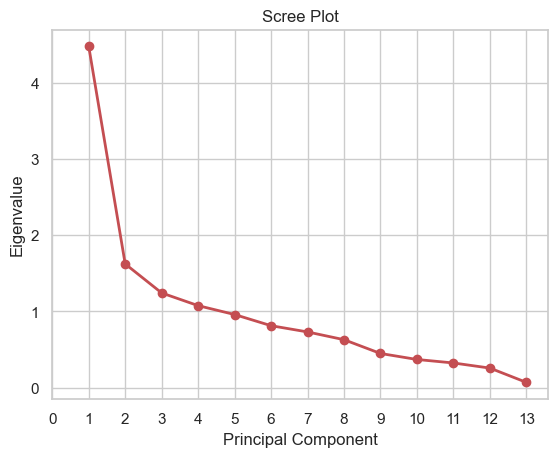

In [131]:
PC_NUM = np.arange(MAX_N_XP_STD) + 1
plt.plot(PC_NUM, xp_ev, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.xticks(np.arange(0, MAX_N_XP_STD+1, 1.0))
plt.show()

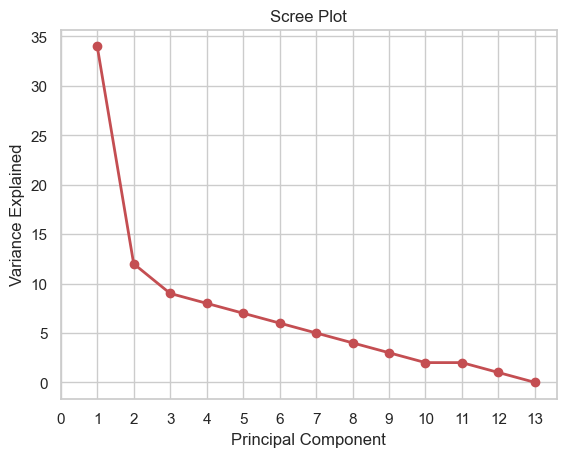

In [132]:
PC_NUM = np.arange(MAX_N_XP_STD) + 1
plt.plot(PC_NUM , varPCT, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(np.arange(0, MAX_N_XP_STD+1, 1.0))
plt.show()

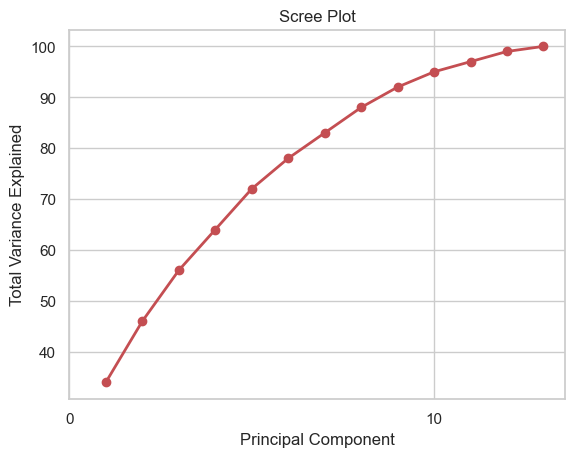

In [133]:
PC_NUM = np.arange(MAX_N_XP_STD) + 1
plt.plot(PC_NUM , totPCT, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Total Variance Explained')
plt.xticks(np.arange(0, MAX_N_XP_STD+1, 10.0))
plt.show()

In [134]:
dfc = pd.DataFrame(pca.components_)
dfc.columns = xp_pca_varNames #list(pca_demographics_df.columns)
dfc

,trn_log_TOTAL_VALUE,trn_YR_BUILT,trn_HLF_BTH,trn_log_RES_FLOOR,trn_log_LAND_SF,trn_log_GROSS_AREA,trn_log_LIVING_AREA,trn_log_BED_RMS,trn_log_FULL_BTH,trn_log_KITCHEN,trn_log_TT_RMS,trn_log_FIRE_PLACE,trn_log_sale_price
0,0.353,-0.138,0.134,0.269,0.164,0.427,0.437,0.346,0.248,0.076,0.392,0.155,0.030
1,-0.226,-0.472,-0.103,0.379,-0.483,-0.044,0.055,0.204,-0.174,-0.073,0.142,-0.472,-0.120
2,-0.075,-0.110,-0.693,-0.248,0.032,0.004,-0.025,0.050,0.473,0.432,0.072,-0.140,0.018
3,-0.049,-0.206,-0.072,-0.179,0.348,0.112,0.036,-0.025,-0.268,0.036,0.040,0.047,-0.840
4,-0.139,0.270,0.406,0.039,-0.196,-0.089,-0.015,0.109,-0.096,0.805,0.083,-0.038,-0.131
5,0.095,-0.625,0.061,-0.149,0.279,0.015,-0.066,-0.150,-0.410,0.318,-0.014,0.072,0.441
6,0.153,-0.199,-0.187,0.254,-0.456,-0.068,-0.054,-0.203,0.030,0.108,-0.130,0.724,-0.163
7,-0.399,0.055,-0.110,-0.284,-0.048,-0.098,-0.113,0.580,-0.230,-0.144,0.354,0.409,0.131
8,-0.299,0.297,-0.388,0.607,0.368,0.054,0.145,-0.060,-0.315,0.116,-0.090,0.069,0.121
9,0.031,-0.213,0.177,0.365,0.387,-0.521,-0.411,0.247,0.358,-0.003,-0.008,0.051,-0.088


In [135]:
# pca = PCA(n_components=MAX_N_XP_STD)
# pca.fit(XP_STD)

In [136]:
XP_PCA = pca.transform(XP_STD)
XP_PCA = pd.DataFrame(XP_PCA)
XP_PCA = XP_PCA.iloc[:,0:4]

In [137]:
# for i in XP_PCA.columns :
#     print(i, "=", XP_PCA[i].isna().sum())

In [138]:
XP_PCA.head()

,0,1,2,3
0,1.256,3.723,-0.063,-0.239
1,1.604,1.708,-0.885,-2.503
2,3.011,2.142,1.130,-2.432
3,1.422,3.261,0.721,-0.355
4,1.239,2.319,-0.735,-0.349


In [139]:
xp_pca_colNames = XP_PCA.columns
xp_pca_names = []
for i in xp_pca_colNames :
    index = int(i) + 1
    theName = "PC_" + str(index)
    xp_pca_names.append(theName)

In [140]:
XP_PCA.columns = xp_pca_names

In [141]:
XP_PCA.head()

,PC_1,PC_2,PC_3,PC_4
0,1.256,3.723,-0.063,-0.239
1,1.604,1.708,-0.885,-2.503
2,3.011,2.142,1.130,-2.432
3,1.422,3.261,0.721,-0.355
4,1.239,2.319,-0.735,-0.349


In [142]:
XP_PCA["Row_Number"] = np.arange(len(XP_PCA))
XP_PCA = pd.merge(XP_PCA, properties_df[["PID", "TARGET_SPEND", "Row_Number"]], on = "Row_Number")
XP_PCA.head()

,PC_1,PC_2,PC_3,PC_4,Row_Number,PID,TARGET_SPEND
0,1.256,3.723,-0.063,-0.239,0,1000019000,None
1,1.604,1.708,-0.885,-2.503,1,1000024000,None
2,3.011,2.142,1.130,-2.432,2,1000027000,None
3,1.422,3.261,0.721,-0.355,3,1000029000,None
4,1.239,2.319,-0.735,-0.349,4,1000093000,None


In [143]:
for i in XP_PCA[["PID", "TARGET_SPEND"]].columns :
    print(i, "=", XP_PCA[["PID", "TARGET_SPEND"]][i].isna().sum())

PID = 0
TARGET_SPEND = 0


In [144]:
for Name, Group in XP_PCA.groupby("TARGET_SPEND"):
    print(Group.head())

      PC_1   PC_2   PC_3   PC_4  Row_Number         PID TARGET_SPEND
402  1.761  1.358  0.590 -1.942         402  1102130001         High
444  6.557 -2.102  2.976 -0.495         444  1102452000         High
2924 2.809  1.220  1.195  0.629        2924  1700777000         High
3369 2.230 -0.771 -0.528  0.415        3369  1601945007         High
3468 4.852 -0.170 -0.451 -0.626        3468  1602149000         High
      PC_1  PC_2   PC_3   PC_4  Row_Number         PID TARGET_SPEND
87   2.347 1.443 -0.026 -1.629          87  1002133000          Low
95   1.327 1.459  1.788 -0.182          95  1001890000          Low
122 -1.055 2.188 -0.958 -1.742         122  1001929000          Low
126  0.501 1.481  1.699 -2.392         126  1001934000          Low
132  0.509 1.464 -0.884 -1.001         132  1001940000          Low
      PC_1  PC_2   PC_3   PC_4  Row_Number         PID TARGET_SPEND
98   2.427 1.646 -0.212 -1.726          98  1001894000       Medium
145  2.378 1.487  0.056 -1.436         145

In [145]:
''' Can only show for 2 PCs '''

# plt.figure(figsize=(10, 10))
# for Name, Group in XP_PCA.groupby("TARGET"):
#     plt.scatter(Group.PC_1, Group.PC_2, label=Name, s=3)
# plt.xlabel("PC_1")
# plt.ylabel("PC_2")
# plt.legend()
# plt.show()

' Can only show for 2 PCs '

# K-MEANS

## *K-MEANS DEMOGRAPHICS*

In [146]:
XD_KM = XD_PCA.copy()
XD_KM = XD_PCA.drop(columns=["PID", "TARGET_SPEND", "Row_Number"], axis = 1)

In [147]:
XD_KM.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13
0,-3.447,12.761,2.591,3.564,2.717,-0.724,-3.647,0.675,4.116,-2.839,-1.815,0.156,-1.565
1,-3.447,12.761,2.591,3.564,2.717,-0.724,-3.647,0.675,4.116,-2.839,-1.815,0.156,-1.565
2,-3.447,12.761,2.591,3.564,2.717,-0.724,-3.647,0.675,4.116,-2.839,-1.815,0.156,-1.565
3,-3.447,12.761,2.591,3.564,2.717,-0.724,-3.647,0.675,4.116,-2.839,-1.815,0.156,-1.565
4,-3.447,12.761,2.591,3.564,2.717,-0.724,-3.647,0.675,4.116,-2.839,-1.815,0.156,-1.565


In [148]:
xd_km_varNames = XD_KM.columns

In [149]:
xd_km_varNames

Index(['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7', 'PC_8', 'PC_9',
       'PC_10', 'PC_11', 'PC_12', 'PC_13'],
      dtype='object')

In [150]:
K_LIST = []
I_LIST = []
S_LIST = []
C_LIST = []
for K in range(3,10) :
    km = KMeans(n_clusters=K, random_state = 1)
    km.fit(XD_KM)
    #Y = km.predict(XD_KM)
    K_LIST.append(K)
    I_LIST.append(km.inertia_)
    S_LIST.append(silhouette_score(XD_KM,km.labels_))
    C_LIST.append(calinski_harabasz_score(XD_KM,km.labels_))

In [151]:
def drawElbow(K, SCORE, LABEL) :
    plt.plot(K , SCORE, 'ro-', linewidth=2)
    plt.title(LABEL)
    plt.xlabel('Clusters')
    plt.ylabel('Score')
    plt.show()

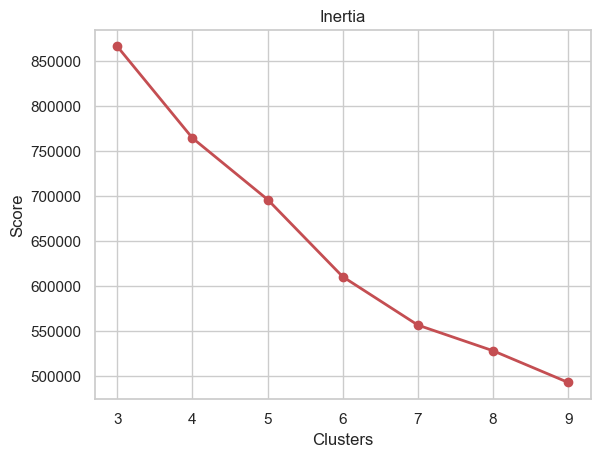

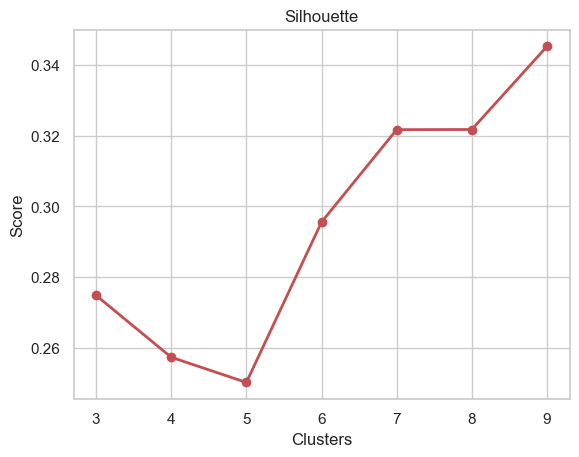

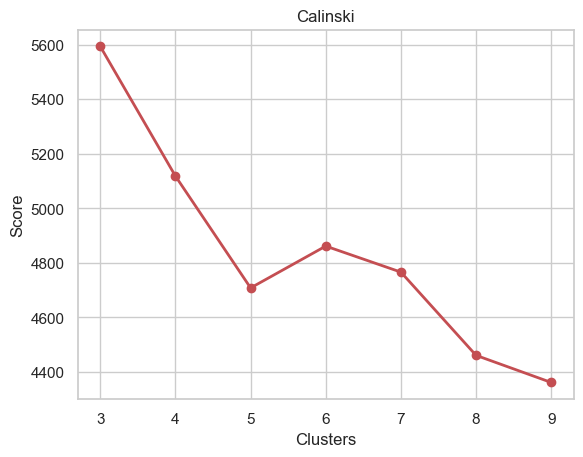

In [152]:
drawElbow(K_LIST, I_LIST, "Inertia")
drawElbow(K_LIST, S_LIST, "Silhouette")
drawElbow(K_LIST, C_LIST, "Calinski")

In [153]:
def clusterData(DATA, TRN_DATA, K, TARGET) :
    print("\n\n\n")
    print("K = ",K)
    print("=======")
    km = KMeans(n_clusters=K, random_state = 1)
    km.fit(TRN_DATA)
    Y = km.predict(TRN_DATA)
    DATA["CLUSTER"] = Y
    print( DATA.head() )
    G = DATA.groupby("CLUSTER")
    print(G.mean())
    print("\n\n\n")
    print(G[TARGET].value_counts())

In [154]:
TARGET = "TARGET_SPEND"

In [155]:
#clusterData(demographics_master_df, XD_KM, 3, TARGET)
clusterData(demographics_master_df, XD_KM, 4, TARGET)
#clusterData(demographics_master_df, XD_KM, 5, TARGET)
#clusterData(demographics_master_df, XD_KM, 6, TARGET)





K =  4
          PID  inc_cnt_fam_married_couple_total  \
0  1000019000                                91   
1  1000024000                                91   
2  1000027000                                91   
3  1000029000                                91   
4  1000093000                                91   

   inc_pct_fam_married_couple_inc_lt_10000  \
0                                    0.000   
1                                    0.000   
2                                    0.000   
3                                    0.000   
4                                    0.000   

   inc_pct_fam_married_couple_inc_10000_14999  \
0                                       0.000   
1                                       0.000   
2                                       0.000   
3                                       0.000   
4                                       0.000   

   inc_pct_fam_married_couple_inc_15000_24999  \
0                                       9.900   
1           

## *K-MEANS PROPERTIES*

In [156]:
XP_KM = XP_PCA.copy()
XP_KM = XP_PCA.drop(columns=["PID", "TARGET_SPEND", "Row_Number"], axis = 1)

In [157]:
XP_KM.head()

,PC_1,PC_2,PC_3,PC_4
0,1.256,3.723,-0.063,-0.239
1,1.604,1.708,-0.885,-2.503
2,3.011,2.142,1.130,-2.432
3,1.422,3.261,0.721,-0.355
4,1.239,2.319,-0.735,-0.349


In [158]:
xp_km_varNames = XP_KM.columns

In [159]:
xp_km_varNames

Index(['PC_1', 'PC_2', 'PC_3', 'PC_4'], dtype='object')

In [160]:
# for i in XP_KM.columns :
#     print(i, "=", XP_KM[i].isna().sum())

In [161]:
K_LIST = []
I_LIST = []
S_LIST = []
C_LIST = []
for K in range(3,10) :
    km = KMeans(n_clusters=K, random_state = 1)
    km.fit(XP_KM)
    #Y = km.predict(XP_KM)
    K_LIST.append(K)
    I_LIST.append(km.inertia_)
    S_LIST.append(silhouette_score(XP_KM,km.labels_))
    C_LIST.append(calinski_harabasz_score(XP_KM,km.labels_))

In [162]:
def drawElbow(K, SCORE, LABEL) :
    plt.plot(K , SCORE, 'ro-', linewidth=2)
    plt.title(LABEL)
    plt.xlabel('Clusters')
    plt.ylabel('Score')
    plt.show()

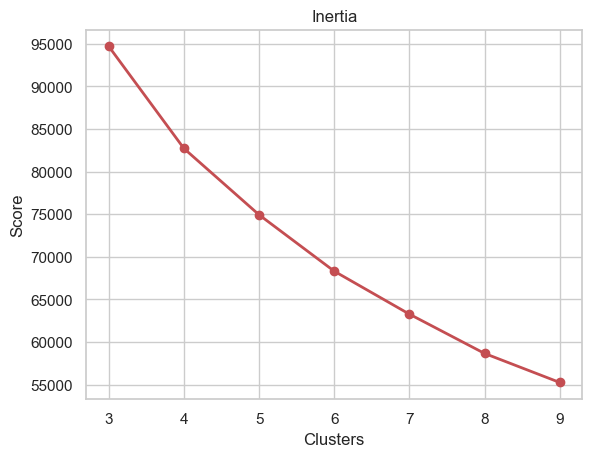

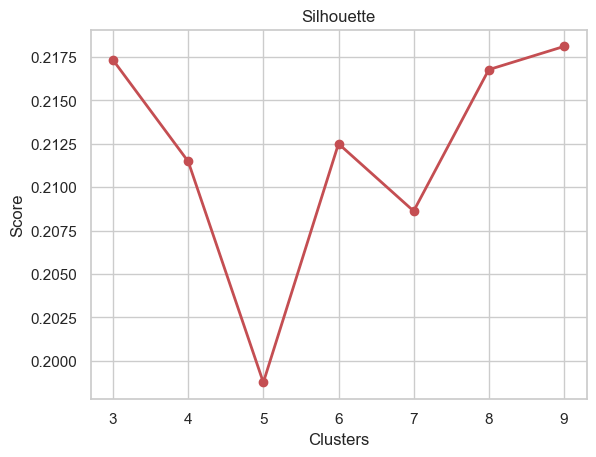

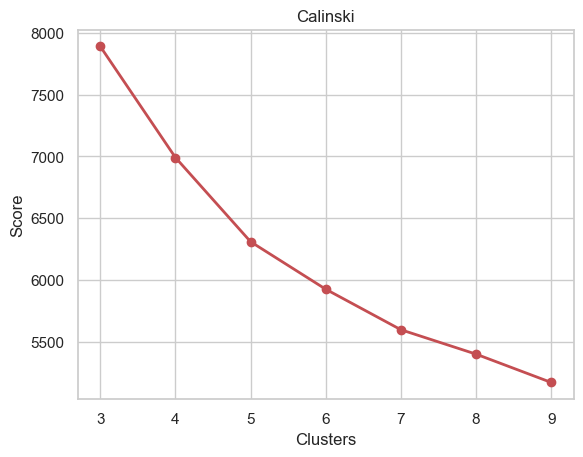

In [163]:
drawElbow(K_LIST, I_LIST, "Inertia")
drawElbow(K_LIST, S_LIST, "Silhouette")
drawElbow(K_LIST, C_LIST, "Calinski")

In [164]:
def clusterData(DATA, TRN_DATA, K, TARGET) :
    print("\n\n\n")
    print("K = ",K)
    print("=======")
    km = KMeans(n_clusters=K, random_state = 1)
    km.fit(TRN_DATA)
    Y = km.predict(TRN_DATA)
    DATA["CLUSTER"] = Y
    print( DATA.head() )
    G = DATA.groupby("CLUSTER")
    print(G.mean())
    print("\n\n\n")
    print(G[TARGET].value_counts())

In [165]:
TARGET = "TARGET_SPEND"

In [166]:
#clusterData(properties_master_df, XP_KM, 3, TARGET)
clusterData(properties_master_df, XP_KM, 4, TARGET)
#clusterData(properties_master_df, XP_KM, 5, TARGET)
#clusterData(properties_master_df, XP_KM, 6, TARGET)





K =  4
          PID  LAND_VALUE  BLDG_VALUE  TOTAL_VALUE  YR_BUILT  HLF_BTH  \
0  1000019000      380500      533700       914200  1900.000        0   
1  1000024000      363400      656500      1019900  1900.000        1   
2  1000027000      342800      859900      1202700  1875.000        0   
3  1000029000      370300      577400       947700  1900.000        0   
4  1000093000      401100      759700      1160800  1900.000        1   

   RES_FLOOR  LAND_SF  GROSS_AREA  LIVING_AREA  BED_RMS  FULL_BTH  KITCHEN  \
0      3.000 1440.000    2688.000     2016.000        5         1        1   
1      3.000 1440.000    2712.000     2026.000        4         2        1   
2      3.000 1440.000    3141.600     2581.600        4         3        1   
3      3.000 1440.000    2688.000     2016.000        4         2        1   
4      3.000 1600.000    2779.000     2184.000        2         2        1   

   TT_RMS  FIRE_PLACE  sale_price TARGET_SPEND  CLUSTER  
0       8           0  

In [167]:
XP_KM.shape

(20099, 4)

# OUTPUT

## *DEMOGRAPHICS*

In [168]:
def clusterData(DATA, TRN_DATA, K, TARGET) :
    km = KMeans(n_clusters=K, random_state = 1)
    km.fit(TRN_DATA)
    Y = km.predict(TRN_DATA)
    return Y
    DATA["CLUSTER"] = Y

In [169]:
pred_d = clusterData(demographics_master_df, XD_KM, 4, TARGET)
pred_d_df = pd.DataFrame(pred_d)
pred_d_df.head()

,0
0,0
1,0
2,0
3,0
4,0


In [170]:
# km_d = KMeans(n_clusters=4, random_state = 1)
# km_d.fit(XD_KM)
# pred_d = km.predict(XD_KM)

In [171]:
D = pd.DataFrame(pred_d)

In [172]:
D.shape

(20099, 1)

In [173]:
D["Row_Number"] = np.arange(len(D))

In [174]:
D.columns =["DEMO_CLUSTER", "Row_Number"]

In [175]:
D.head()

,DEMO_CLUSTER,Row_Number
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


In [176]:
XD_PCA = pd.merge(XD_PCA, D[["DEMO_CLUSTER", "Row_Number"]], on = "Row_Number")

In [177]:
XD_PCA.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,Row_Number,PID,TARGET_SPEND,DEMO_CLUSTER
0,-3.447,12.761,2.591,3.564,2.717,-0.724,-3.647,0.675,4.116,-2.839,-1.815,0.156,-1.565,0,1000019000,None,0
1,-3.447,12.761,2.591,3.564,2.717,-0.724,-3.647,0.675,4.116,-2.839,-1.815,0.156,-1.565,1,1000024000,None,0
2,-3.447,12.761,2.591,3.564,2.717,-0.724,-3.647,0.675,4.116,-2.839,-1.815,0.156,-1.565,2,1000027000,None,0
3,-3.447,12.761,2.591,3.564,2.717,-0.724,-3.647,0.675,4.116,-2.839,-1.815,0.156,-1.565,3,1000029000,None,0
4,-3.447,12.761,2.591,3.564,2.717,-0.724,-3.647,0.675,4.116,-2.839,-1.815,0.156,-1.565,4,1000093000,None,0


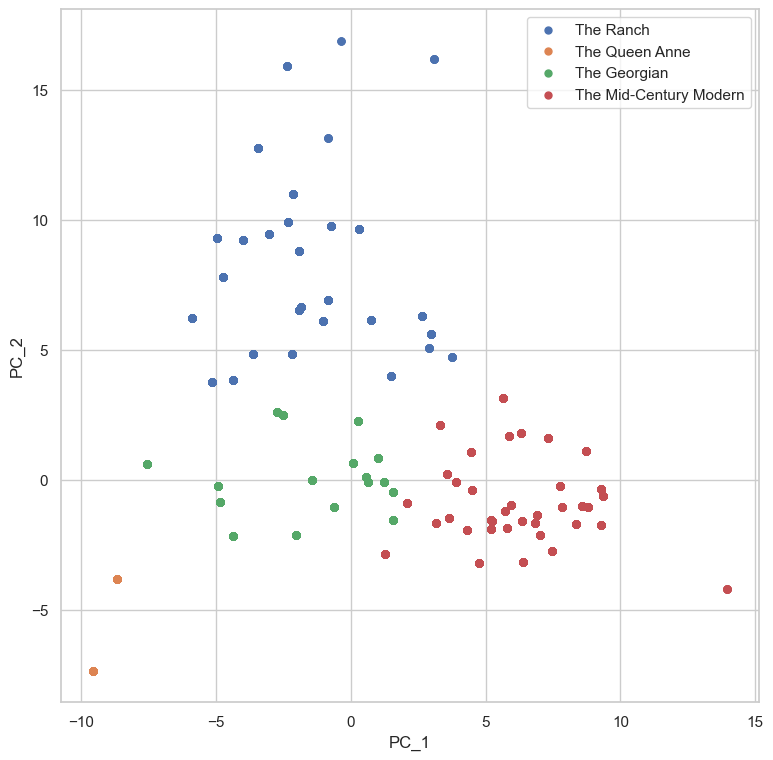

In [178]:
''' Can only show for 2 PCs '''

label = ["The Ranch", "The Queen Anne", "The Georgian", "The Mid-Century Modern"]
counter = 0
plt.figure(figsize=(9, 9))
for Name, Group in XD_PCA.groupby("DEMO_CLUSTER"):
    plt.scatter(Group.PC_1, Group.PC_2, label=label[counter], s=25)
    counter += 1
    #print(counter)
plt.xlabel("PC_1")
plt.ylabel("PC_2")
plt.legend()
plt.show()

In [179]:
Demographics = demographics_master_df.groupby("CLUSTER").mean()

In [180]:
Demographics.to_excel("C:\\Users\\mohrj\\Documents\\MSPA\\MSDS 498 Capstone\\Boston\\Cluster\\Demographics.xlsx")

## *PROPERTIES*

In [181]:
def clusterData(DATA, TRN_DATA, K, TARGET) :
    km = KMeans(n_clusters=K, random_state = 1)
    km.fit(TRN_DATA)
    Y = km.predict(TRN_DATA)
    return Y
    DATA["CLUSTER"] = Y

In [182]:
pred_p = clusterData(demographics_master_df, XP_KM, 4, TARGET)
pred_p_df = pd.DataFrame(pred_p)
pred_p_df.head()

,0
0,1
1,1
2,2
3,1
4,1


In [183]:
P = pd.DataFrame(pred_p)

In [184]:
P.shape

(20099, 1)

In [185]:
P["Row_Number"] = np.arange(len(P))

In [186]:
P.columns =["PROP_CLUSTER", "Row_Number"]

In [187]:
P.head()

,PROP_CLUSTER,Row_Number
0,1,0
1,1,1
2,2,2
3,1,3
4,1,4


In [188]:
XP_PCA = pd.merge(XP_PCA, P[["PROP_CLUSTER", "Row_Number"]], on = "Row_Number")

In [189]:
XP_PCA.head()

,PC_1,PC_2,PC_3,PC_4,Row_Number,PID,TARGET_SPEND,PROP_CLUSTER
0,1.256,3.723,-0.063,-0.239,0,1000019000,None,1
1,1.604,1.708,-0.885,-2.503,1,1000024000,None,1
2,3.011,2.142,1.130,-2.432,2,1000027000,None,2
3,1.422,3.261,0.721,-0.355,3,1000029000,None,1
4,1.239,2.319,-0.735,-0.349,4,1000093000,None,1


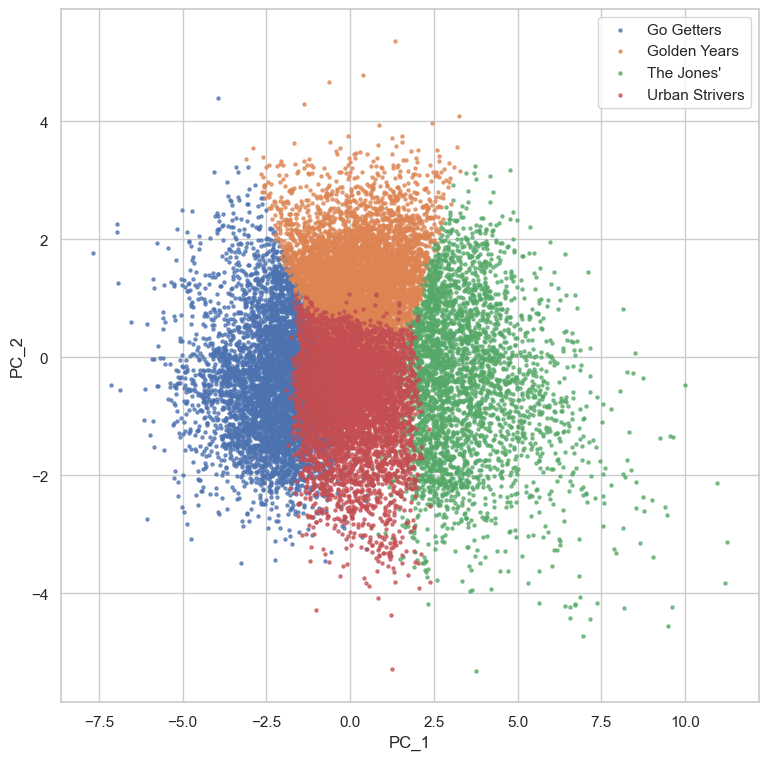

In [190]:
''' Can only show for 2 PCs '''

label = ["Go Getters", "Golden Years", "The Jones'", "Urban Strivers"]
counter = 0
plt.figure(figsize=(9, 9))
for Name, Group in XP_PCA.groupby("PROP_CLUSTER"):
    plt.scatter(Group.PC_1, Group.PC_2, label=label[counter], s=5, alpha = .7)
    counter += 1
    #print(counter)
plt.xlabel("PC_1")
plt.ylabel("PC_2")
plt.legend()
plt.show()

In [191]:
Properties = properties_master_df.groupby("CLUSTER").mean()

In [192]:
Properties.to_excel("C:\\Users\\mohrj\\Documents\\MSPA\\MSDS 498 Capstone\\Boston\\Cluster\\Properties.xlsx")

## *Condensed2022_Clusters.xlsx*

In [193]:
output = pd.merge(master_df, XD_PCA[["DEMO_CLUSTER", "PID"]], on = "PID")

In [194]:
output = pd.merge(output, XP_PCA[["PROP_CLUSTER", "PID"]], on = "PID")

In [195]:
output.to_excel("C:\\Users\\mohrj\\Documents\\MSPA\\MSDS 498 Capstone\\Boston\\Cluster\\Condensed2022_Clusters.xlsx")

## *JUNK*

In [196]:
# km = KMeans(n_clusters=4, random_state = 1)
# km.fit(XP_KM)
# Y = km.predict(XP_KM)

In [197]:
# C = pd.DataFrame(Y)

In [198]:
# C[0].value_counts()

In [199]:
# C.head()

In [200]:
# demographics_master_df.groupby("CLUSTER").mean()

In [201]:
# properties_master_df.head()

In [202]:
# demographics_master_df["CLUSTER"]

In [203]:
# df.shape

In [204]:
# XP_PCA.shape

In [205]:
# for i in XP_PCA.columns :
#     print(i, "=", XP_PCA[i].isna().sum())

In [206]:
# XP_PCA["PID"]

In [207]:
# for i in XP_STD.columns :
#     print(i, "=", XP_STD[i].isna().sum())